# Capstone 3 - Exploratory Data Analysis

### Table of contents
* [Introduction](#intro)
    * [Guiding questions & ideas](#guiding-questions)
    * [Import relevant packages](#import)
    * [Retrieve variables](#variables)
* [School demographic & achievement data](#demographic-data)
    * [Demographic summaries by academic year](#demographic-summaries)
    * [Lower grades achievement data by academic year](#lg-achievement)
    * [High school achievement data by academic year](#hs-achievement)
* [Noise data](#noise-data)

## Introduction <a name="intro"></a>

Despite ample evidence of causing mental and physical harm, the effects of environmental noise on educational outcomes is not well documented. This project aims to understand how environmental noise affects educational outcomes of elementary, middle, and high schoolers in New York City between the 2016-2017 and 2018-2019 school years.

This notebook for Exploratory Data Analysis picks up where we left off in section 1 - Cleaning & Wrangling.

### Guiding questions & ideas <a name="guiding-questions"></a>

Guiding questions as we complete our Exploratory Data Analysis include:
- Does increased noise exposure correlate with decreased academic performance?
- Can we predict a school's academic performance based on its noise exposure profile?
- How much variance in student achievement can be explained by environmental noise?
- Can we identify schools that are most vulnerable to noise impacts?
- Can we predict which schools will exceed/fall below performance targets based on noise exposure?
- Do certain types of noise (e.g., construction, traffic) have different impacts?
- Are there temporal patterns in noise impact (time of day, day of week, seasonal)?

### Import relevant packages <a name="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Retrieve variables <a name="variables"></a>
Let's retrieve the variables we saved in our data cleaning & wrangling phase.

In [2]:
# Retrieve original noise_data dataframe
%store -r noise_data

# Retrieve GeoPandas dataframes
%store -r districts_gdf 
%store -r schoolpoints_gdf

# Retrieve schools covered by sensor range
%store -r coverage_matrix

# Retrieve school demographic information
# %store -r coverage_combined_summary_df
# %store -r non_coverage_combined_summary_df
%store -r combined_summary_df

# Retrieve lower grades achievement information
# %store -r coverage_lg_achievement_df
# %store -r non_coverage_lg_achievement_df
%store -r combined_lg_achievement_df

# Retrieve high school achievement information
# %store -r coverage_hs_achievement_df
# %store -r non_coverage_hs_achievement_df
%store -r combined_hs_achievement_df

# Retrieve combined achievement data
%store -r coverage_combined_achievement_df
%store -r non_coverage_combined_achievement_df

# Retrieve merged dataset with all metrics
%store -r merged_coverage_df

# Retrieve school lists
%store -r elem_middle_schools
%store -r high_schools

---

## School demographic & achievement data <a name="demographic-data"></a>

Let's look at demographic data.

In [3]:
# Filter for covered schools
coverage_combined_summary_df = combined_summary_df[combined_summary_df['coverage']==True]

# Use a single indexing operation with combined conditions
covered_sum_16_17 = coverage_combined_summary_df[coverage_combined_summary_df['academic_year']=='2016-2017']
covered_sum_17_18 = coverage_combined_summary_df[coverage_combined_summary_df['academic_year']=='2017-2018']
covered_sum_18_19 = coverage_combined_summary_df[coverage_combined_summary_df['academic_year']=='2018-2019']

# Filter for non-covered schools
non_coverage_combined_summary_df = combined_summary_df[combined_summary_df['coverage']==False]

# Non-coverage area summaries, separated by academic year
non_covered_sum_16_17 = non_coverage_combined_summary_df[non_coverage_combined_summary_df['academic_year']=='2016-2017']
non_covered_sum_17_18 = non_coverage_combined_summary_df[non_coverage_combined_summary_df['academic_year']=='2017-2018']
non_covered_sum_18_19 = non_coverage_combined_summary_df[non_coverage_combined_summary_df['academic_year']=='2018-2019']

In [4]:
demographic_features = ['ell_pct', 'disability_pct', 'self_contained_pct',
                        'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct',
                        'student_attendance_rate', 'chronic_absence_pct',
                        'teacher_attendance_rate']

### Demographic summaries by academic year: Coverage vs. non-coverage schools <a name="demographic-summaries"></a>

#### 2016-17 academic year

In [5]:
# Coverage schools summary data
covered_sum_16_17[demographic_features].describe()

0        ell_pct  disability_pct  self_contained_pct  asian_pct  black_pct  \
count  59.000000       59.000000           59.000000  59.000000  59.000000   
mean    0.092508        0.187390            0.017644   0.158627   0.269610   
std     0.162590        0.069368            0.031973   0.199588   0.226346   
min     0.000000        0.033000            0.000000   0.007000   0.003000   
25%     0.015500        0.152000            0.000000   0.061500   0.089500   
50%     0.034000        0.178000            0.005000   0.088000   0.206000   
75%     0.080500        0.228500            0.020500   0.169000   0.359000   
max     0.837000        0.354000            0.187000   0.943000   0.780000   

0      hispanic_pct  white_pct  student_attendance_rate  chronic_absence_pct  \
count     59.000000  59.000000                58.000000            58.000000   
mean       0.321712   0.213034                 0.916259             0.233776   
std        0.200844   0.225768                 0.049205             0.156525   
min        0.021000   0.007000                 0.794000             0.017000   
25%        0.167000   0.031500                 0.884750             0.092750   
50%        0.236000   0.100000                 0.926500             0.209500   
75%        0.490500   0.382000                 0.955000             0.341000   
max        0.875000   0.751000                 0.982000             0.570000   

0      teacher_attendance_rate  
count                56.000000  
mean                  0.968571  
std                   0.009069  
min                   0.948000  
25%                   0.962000  
50%                   0.969000  
75%                   0.975000  
max                   0.990000

In [6]:
# Non-coverage schools summary data
non_covered_sum_16_17[demographic_features].describe()

0          ell_pct  disability_pct  self_contained_pct    asian_pct  \
count  1695.000000     1695.000000         1695.000000  1695.000000   
mean      0.135172        0.208124            0.049558     0.108074   
std       0.136781        0.075051            0.048482     0.163326   
min       0.000000        0.000000            0.000000     0.000000   
25%       0.044000        0.158000            0.007000     0.011000   
50%       0.096000        0.204000            0.037000     0.034000   
75%       0.182000        0.255000            0.079000     0.124000   
max       0.993000        0.632000            0.383000     0.920000   

0        black_pct  hispanic_pct    white_pct  student_attendance_rate  \
count  1695.000000   1695.000000  1695.000000              1668.000000   
mean      0.330301      0.424806     0.114041                 0.916586   
std       0.278611      0.258210     0.180621                 0.044176   
min       0.000000      0.013000     0.000000                 0.661000   
25%       0.088000      0.189000     0.012000                 0.901000   
50%       0.253000      0.394000     0.027000                 0.928000   
75%       0.553000      0.641500     0.128500                 0.947000   
max       0.965000      1.000000     0.930000                 1.000000   

0      chronic_absence_pct  teacher_attendance_rate  
count          1666.000000              1477.000000  
mean              0.258790                 0.964701  
std               0.145337                 0.009966  
min               0.000000                 0.916000  
25%               0.143000                 0.959000  
50%               0.237500                 0.965000  
75%               0.352000                 0.971000  
max               0.804000                 1.000000

#### 2017-18 academic year

In [7]:
# Coverage schools summary data
covered_sum_17_18[demographic_features].describe()

0        ell_pct  disability_pct  self_contained_pct  asian_pct  black_pct  \
count  59.000000       59.000000           59.000000  59.000000  59.000000   
mean    0.093034        0.193034            0.015390   0.159661   0.261119   
std     0.161937        0.068491            0.029883   0.197201   0.221753   
min     0.000000        0.036000            0.000000   0.005000   0.000000   
25%     0.014000        0.160000            0.002000   0.063500   0.077500   
50%     0.034000        0.181000            0.004000   0.085000   0.202000   
75%     0.084000        0.224500            0.011000   0.177500   0.358500   
max     0.864000        0.372000            0.177000   0.943000   0.769000   

0      hispanic_pct  white_pct  student_attendance_rate  chronic_absence_pct  \
count     59.000000  59.000000                57.000000            57.000000   
mean       0.324153   0.214186                 0.911930             0.251474   
std        0.200838   0.222740                 0.053976             0.165697   
min        0.022000   0.016000                 0.765000             0.010000   
25%        0.166000   0.032500                 0.879000             0.110000   
50%        0.247000   0.106000                 0.927000             0.242000   
75%        0.472000   0.368000                 0.953000             0.356000   
max        0.879000   0.752000                 0.984000             0.580000   

0      teacher_attendance_rate  
count                56.000000  
mean                  0.968179  
std                   0.009903  
min                   0.943000  
25%                   0.963750  
50%                   0.969000  
75%                   0.972750  
max                   0.989000

In [8]:
# Non-coverage schools summary data
non_covered_sum_17_18[demographic_features].describe()

0          ell_pct  disability_pct  self_contained_pct    asian_pct  \
count  1716.000000     1716.000000         1716.000000  1716.000000   
mean      0.137753        0.211775            0.049183     0.109624   
std       0.136361        0.075630            0.048254     0.164438   
min       0.000000        0.000000            0.000000     0.000000   
25%       0.045000        0.162000            0.007000     0.012000   
50%       0.101000        0.208000            0.037000     0.035000   
75%       0.183000        0.257000            0.079000     0.126250   
max       1.000000        0.650000            0.313000     0.922000   

0        black_pct  hispanic_pct    white_pct  student_attendance_rate  \
count  1716.000000   1716.000000  1716.000000              1683.000000   
mean      0.323242      0.428322     0.114664                 0.914456   
std       0.275525      0.258039     0.178656                 0.044121   
min       0.000000      0.015000     0.000000                 0.652000   
25%       0.081000      0.192750     0.012750                 0.897000   
50%       0.246500      0.397000     0.028000                 0.925000   
75%       0.538000      0.648000     0.128250                 0.944000   
max       0.963000      1.000000     0.924000                 1.000000   

0      chronic_absence_pct  teacher_attendance_rate  
count          1679.000000              1477.000000  
mean              0.273379                 0.963300  
std               0.149272                 0.010121  
min               0.000000                 0.913000  
25%               0.155000                 0.957000  
50%               0.254000                 0.963000  
75%               0.382500                 0.969000  
max               0.808000                 0.998000

#### 2018-19 academic year

In [9]:
# Coverage schools summary data
covered_sum_18_19[demographic_features].describe()

0        ell_pct  disability_pct  self_contained_pct  asian_pct  black_pct  \
count  59.000000       59.000000           59.000000  59.000000  59.000000   
mean    0.093034        0.193034            0.015390   0.159661   0.261119   
std     0.161937        0.068491            0.029883   0.197201   0.221753   
min     0.000000        0.036000            0.000000   0.005000   0.000000   
25%     0.014000        0.160000            0.002000   0.063500   0.077500   
50%     0.034000        0.181000            0.004000   0.085000   0.202000   
75%     0.084000        0.224500            0.011000   0.177500   0.358500   
max     0.864000        0.372000            0.177000   0.943000   0.769000   

0      hispanic_pct  white_pct  student_attendance_rate  chronic_absence_pct  \
count     59.000000  59.000000                57.000000            57.000000   
mean       0.324153   0.214186                 0.911930             0.251474   
std        0.200838   0.222740                 0.053976             0.165697   
min        0.022000   0.016000                 0.765000             0.010000   
25%        0.166000   0.032500                 0.879000             0.110000   
50%        0.247000   0.106000                 0.927000             0.242000   
75%        0.472000   0.368000                 0.953000             0.356000   
max        0.879000   0.752000                 0.984000             0.580000   

0      teacher_attendance_rate  
count                56.000000  
mean                  0.968179  
std                   0.009903  
min                   0.943000  
25%                   0.963750  
50%                   0.969000  
75%                   0.972750  
max                   0.989000

In [10]:
# Non-coverage schools summary data
non_covered_sum_18_19[demographic_features].describe()

0          ell_pct  disability_pct  self_contained_pct    asian_pct  \
count  1716.000000     1716.000000         1716.000000  1716.000000   
mean      0.137753        0.211775            0.049183     0.109624   
std       0.136361        0.075630            0.048254     0.164438   
min       0.000000        0.000000            0.000000     0.000000   
25%       0.045000        0.162000            0.007000     0.012000   
50%       0.101000        0.208000            0.037000     0.035000   
75%       0.183000        0.257000            0.079000     0.126250   
max       1.000000        0.650000            0.313000     0.922000   

0        black_pct  hispanic_pct    white_pct  student_attendance_rate  \
count  1716.000000   1716.000000  1716.000000              1683.000000   
mean      0.323242      0.428322     0.114664                 0.914456   
std       0.275525      0.258039     0.178656                 0.044121   
min       0.000000      0.015000     0.000000                 0.652000   
25%       0.081000      0.192750     0.012750                 0.897000   
50%       0.246500      0.397000     0.028000                 0.925000   
75%       0.538000      0.648000     0.128250                 0.944000   
max       0.963000      1.000000     0.924000                 1.000000   

0      chronic_absence_pct  teacher_attendance_rate  
count          1679.000000              1477.000000  
mean              0.273379                 0.963300  
std               0.149272                 0.010121  
min               0.000000                 0.913000  
25%               0.155000                 0.957000  
50%               0.254000                 0.963000  
75%               0.382500                 0.969000  
max               0.808000                 0.998000

#### Trends in demographics over time

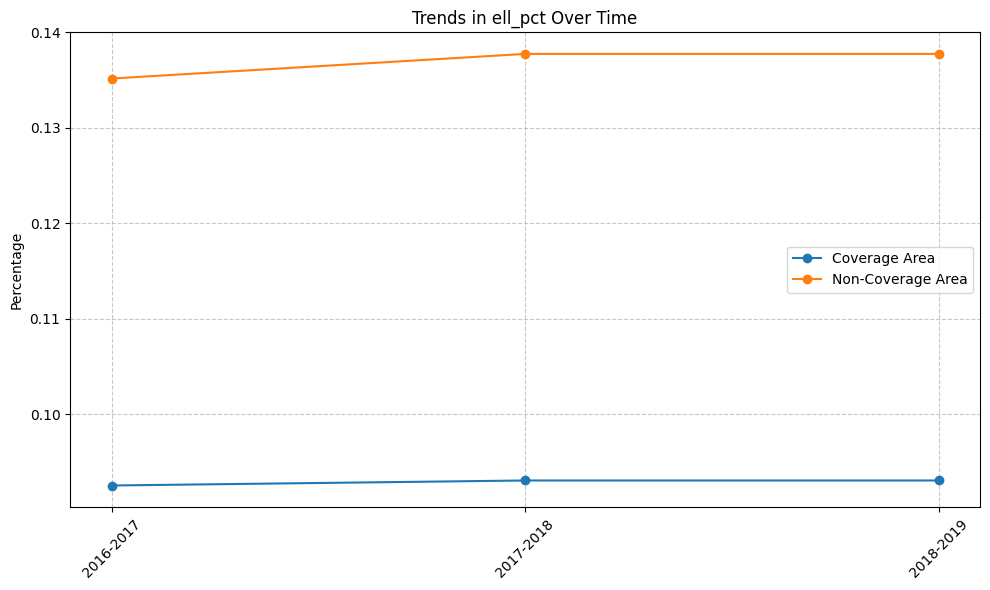


Changes in ell_pct:

Coverage Area:
2016-2017: 0.093
2018-2019: 0.093
Change: 0.001

Non-Coverage Area:
2016-2017: 0.135
2018-2019: 0.138
Change: 0.003



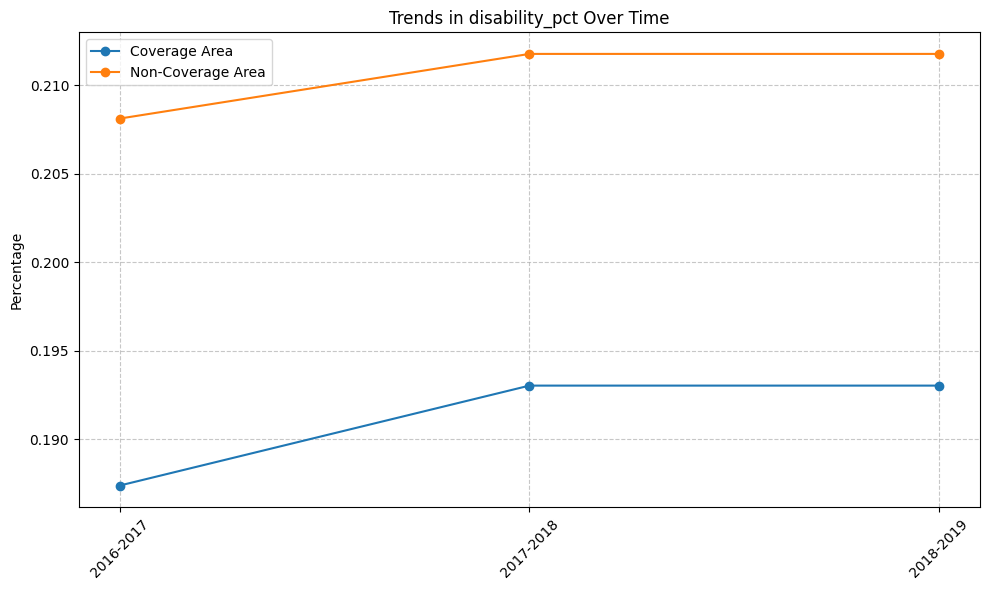


Changes in disability_pct:

Coverage Area:
2016-2017: 0.187
2018-2019: 0.193
Change: 0.006

Non-Coverage Area:
2016-2017: 0.208
2018-2019: 0.212
Change: 0.004



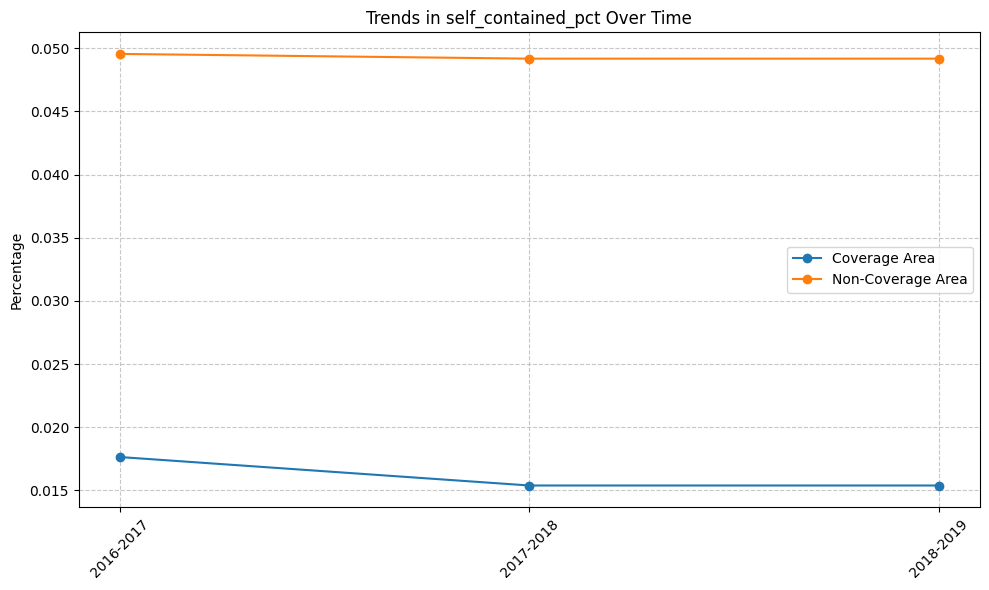


Changes in self_contained_pct:

Coverage Area:
2016-2017: 0.018
2018-2019: 0.015
Change: -0.002

Non-Coverage Area:
2016-2017: 0.050
2018-2019: 0.049
Change: -0.000



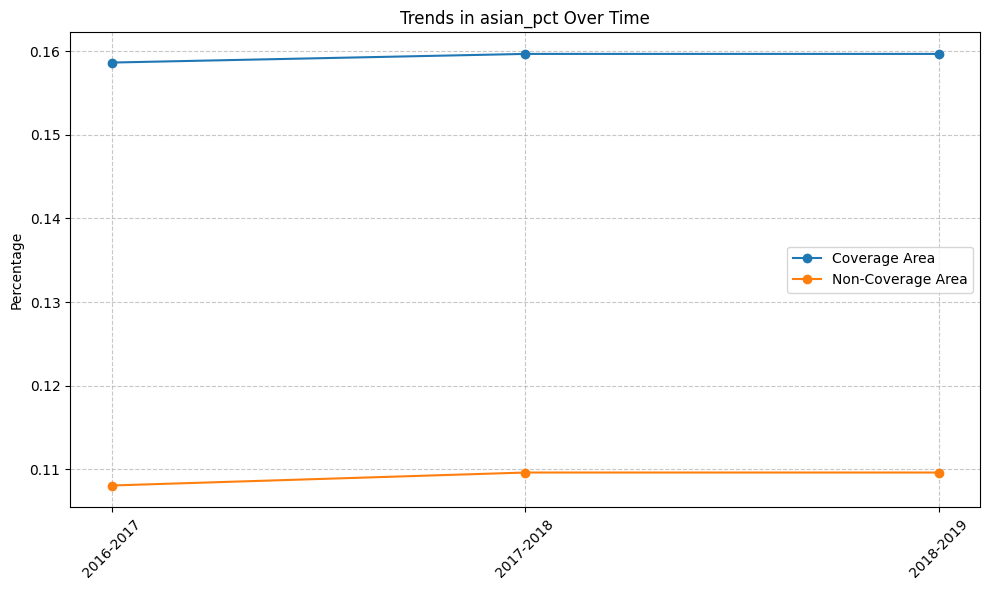


Changes in asian_pct:

Coverage Area:
2016-2017: 0.159
2018-2019: 0.160
Change: 0.001

Non-Coverage Area:
2016-2017: 0.108
2018-2019: 0.110
Change: 0.002



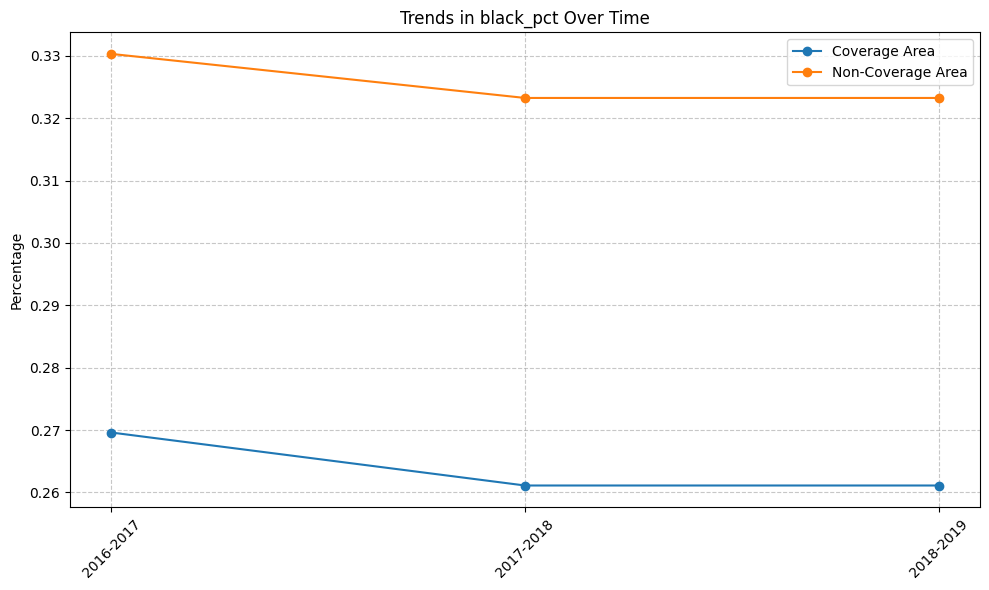


Changes in black_pct:

Coverage Area:
2016-2017: 0.270
2018-2019: 0.261
Change: -0.008

Non-Coverage Area:
2016-2017: 0.330
2018-2019: 0.323
Change: -0.007



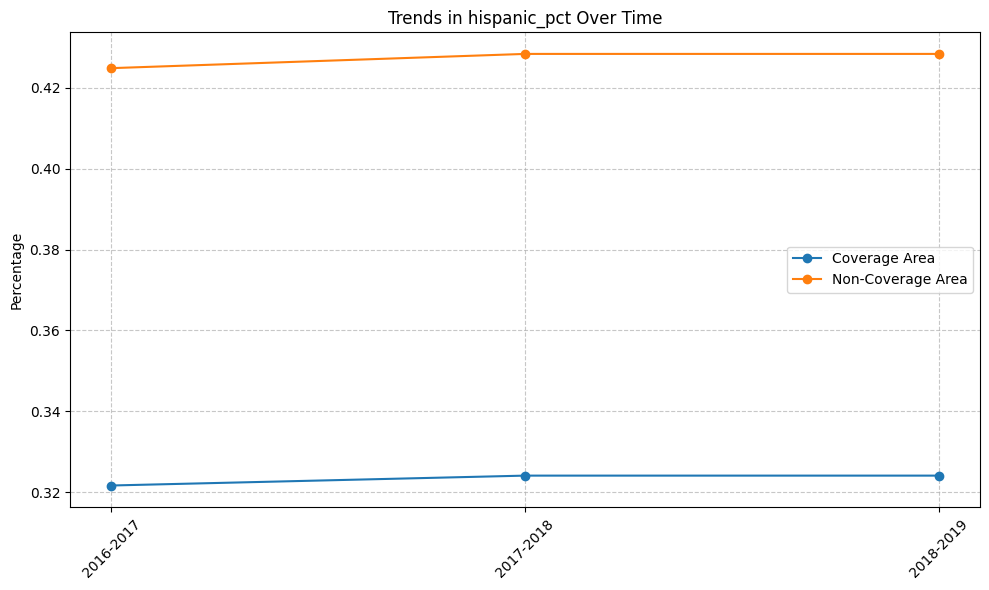


Changes in hispanic_pct:

Coverage Area:
2016-2017: 0.322
2018-2019: 0.324
Change: 0.002

Non-Coverage Area:
2016-2017: 0.425
2018-2019: 0.428
Change: 0.004



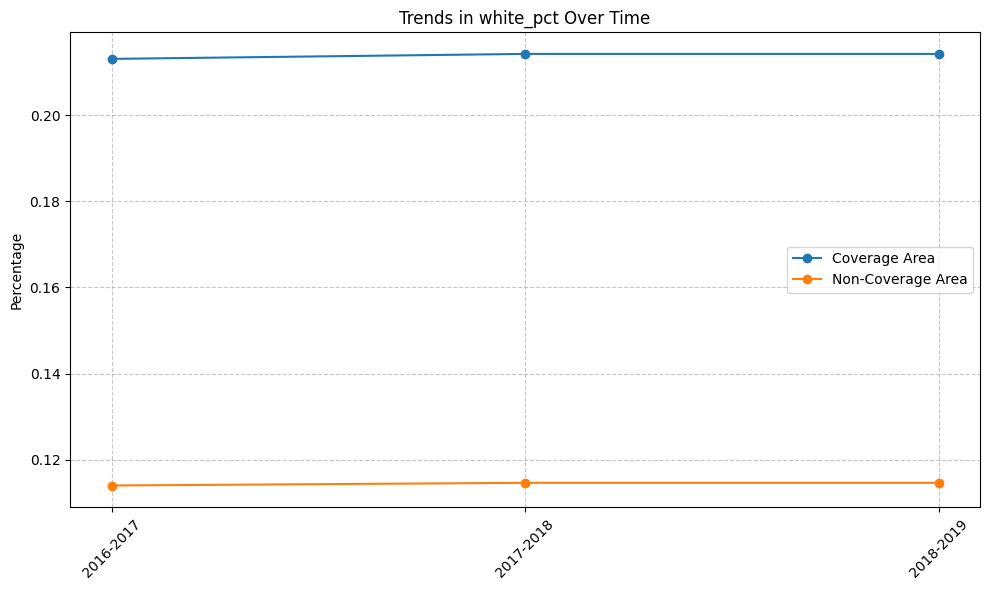


Changes in white_pct:

Coverage Area:
2016-2017: 0.213
2018-2019: 0.214
Change: 0.001

Non-Coverage Area:
2016-2017: 0.114
2018-2019: 0.115
Change: 0.001



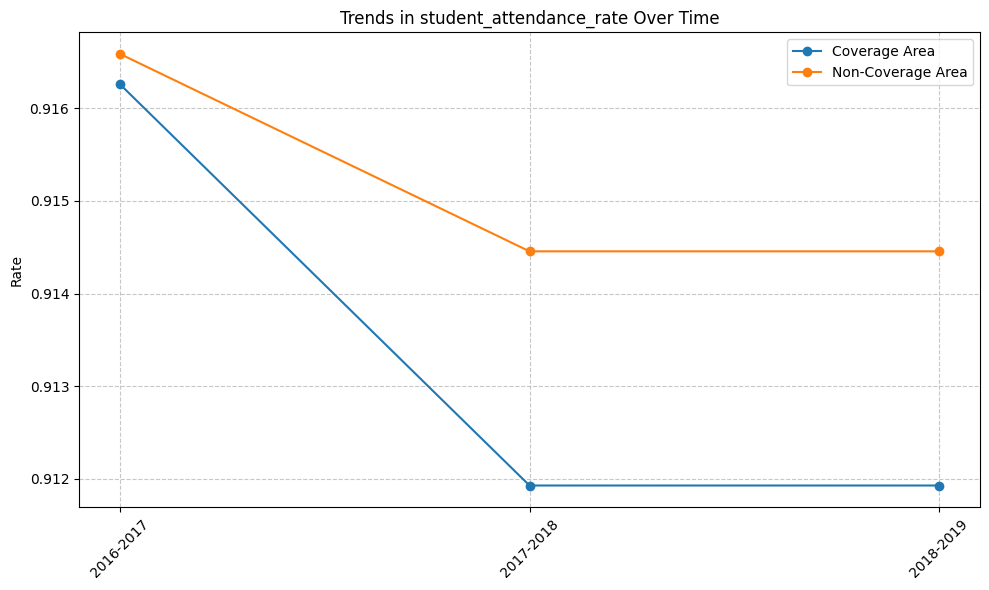


Changes in student_attendance_rate:

Coverage Area:
2016-2017: 0.916
2018-2019: 0.912
Change: -0.004

Non-Coverage Area:
2016-2017: 0.917
2018-2019: 0.914
Change: -0.002



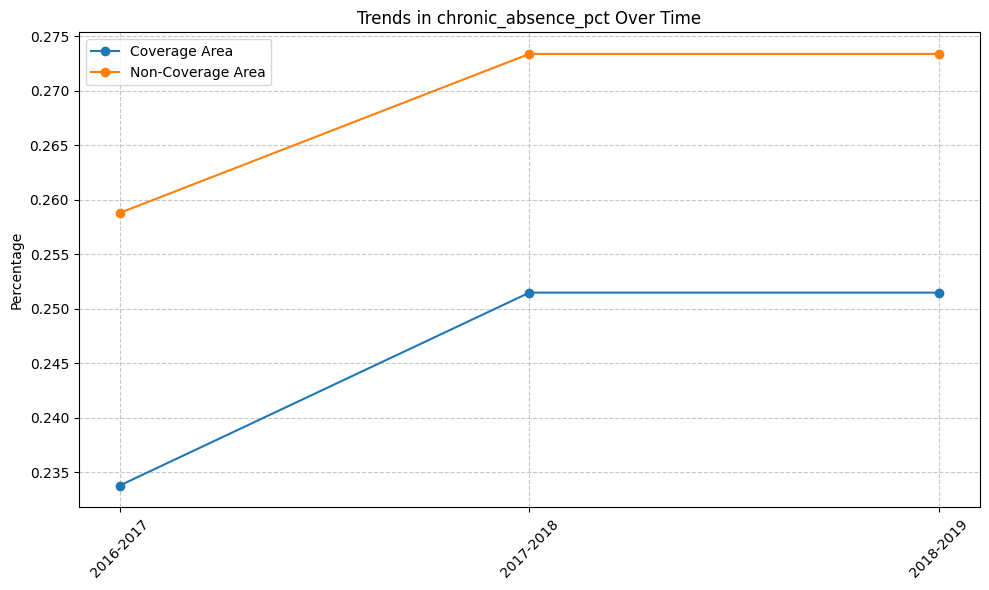


Changes in chronic_absence_pct:

Coverage Area:
2016-2017: 0.234
2018-2019: 0.251
Change: 0.018

Non-Coverage Area:
2016-2017: 0.259
2018-2019: 0.273
Change: 0.015



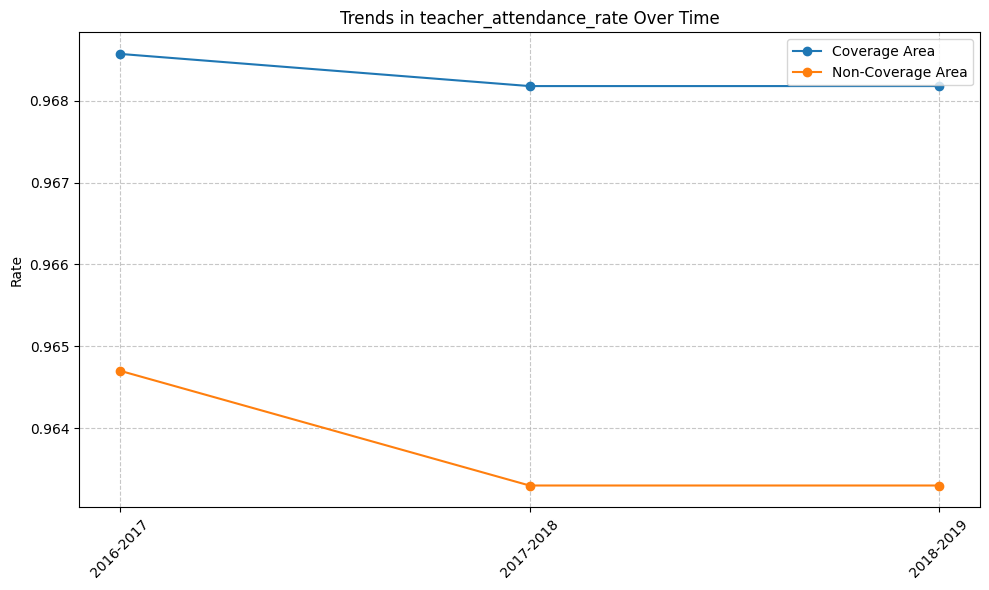


Changes in teacher_attendance_rate:

Coverage Area:
2016-2017: 0.969
2018-2019: 0.968
Change: -0.000

Non-Coverage Area:
2016-2017: 0.965
2018-2019: 0.963
Change: -0.001



In [11]:
# Calculate means for each year and area
coverage_sum_means = {
    '2016-2017': covered_sum_16_17[demographic_features].mean(),
    '2017-2018': covered_sum_17_18[demographic_features].mean(),
    '2018-2019': covered_sum_18_19[demographic_features].mean()
}

non_coverage_sum_means = {
    '2016-2017': non_covered_sum_16_17[demographic_features].mean(),
    '2017-2018': non_covered_sum_17_18[demographic_features].mean(),
    '2018-2019': non_covered_sum_18_19[demographic_features].mean()
}

# Create DataFrames for easier plotting
coverage_sum_trends = pd.DataFrame(coverage_sum_means)
non_coverage_sum_trends = pd.DataFrame(non_coverage_sum_means)

# Plot trends for each demographic feature
for feature in demographic_features:
    plt.figure(figsize=(10, 6))
    
    # Plot both coverage and non-coverage trends
    plt.plot(coverage_sum_trends.columns, coverage_sum_trends.loc[feature], 
             marker='o', label='Coverage Area')
    plt.plot(non_coverage_sum_trends.columns, non_coverage_sum_trends.loc[feature], 
             marker='o', label='Non-Coverage Area')
    
    plt.title(f'Trends in {feature} Over Time')
    plt.ylabel('Percentage' if 'pct' in feature else 'Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print numeric changes
    print(f"\nChanges in {feature}:")
    print("\nCoverage Area:")
    print(f"2016-2017: {coverage_sum_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {coverage_sum_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {coverage_sum_trends.loc[feature, '2018-2019'] - coverage_sum_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\nNon-Coverage Area:")
    print(f"2016-2017: {non_coverage_sum_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {non_coverage_sum_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {non_coverage_sum_trends.loc[feature, '2018-2019'] - non_coverage_sum_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\n" + "="*50)

Schools in both coverage and non-coverage areas seem to follow identical patterns.

### Lower grades achievement data by academic year: Coverage vs. non-coverage schools <a name="lg-achievement"></a>

In [12]:
# Filter for covered schools
coverage_lg_achievement_df = combined_lg_achievement_df[combined_lg_achievement_df['coverage']==True]

# Coverage area summaries, separated by academic year
covered_lg_ach_16_17 = coverage_lg_achievement_df[coverage_lg_achievement_df['academic_year']=='2016-2017']
covered_lg_ach_17_18 = coverage_lg_achievement_df[coverage_lg_achievement_df['academic_year']=='2017-2018']
covered_lg_ach_18_19 = coverage_lg_achievement_df[coverage_lg_achievement_df['academic_year']=='2018-2019']

# Filter for non-covered schools
non_coverage_lg_achievement_df = combined_lg_achievement_df[combined_lg_achievement_df['coverage']==False]

# Non-coverage area summaries, separated by academic year
non_covered_lg_ach_16_17 = non_coverage_lg_achievement_df[non_coverage_lg_achievement_df['academic_year']=='2016-2017']
non_covered_lg_ach_17_18 = non_coverage_lg_achievement_df[non_coverage_lg_achievement_df['academic_year']=='2017-2018']
non_covered_lg_ach_18_19 = non_coverage_lg_achievement_df[non_coverage_lg_achievement_df['academic_year']=='2018-2019']

In [13]:
lg_ach_features = ['achievement_score', 'ela_proficient_pct', 'ela_avg_proficiency', 'ela_lowest_third_proficiency', 
                   'math_proficient_pct', 'math_avg_proficiency', 'math_lowest_third_proficiency', 
                   'attendance_90_plus_pct']

#### 2016-17 academic year

In [14]:
# Coverage schools achievement data
covered_lg_ach_16_17[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count          24.000000           27.000000            27.000000   
mean            3.642083            0.573111             3.062593   
std             0.798880            0.205049             0.390568   
min             2.130000            0.138000             2.130000   
25%             3.060000            0.419000             2.765000   
50%             3.840000            0.573000             3.080000   
75%             4.255000            0.740500             3.360000   
max             4.820000            0.866000             3.680000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                     27.000000            27.000000   
mean                       2.557037             0.584926   
std                        0.469270             0.228540   
min                        1.880000             0.085000   
25%                        2.140000             0.438500   
50%                        2.620000             0.585000   
75%                        2.905000             0.761000   
max                        3.400000             0.927000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count             27.000000                      27.000000   
mean               3.156296                       2.485556   
std                0.487901                       0.508454   
min                2.060000                       1.770000   
25%                2.845000                       2.015000   
50%                3.140000                       2.420000   
75%                3.530000                       2.920000   
max                3.970000                       3.510000   

0      attendance_90_plus_pct  
count               28.000000  
mean                 0.863571  
std                  0.111887  
min                  0.473000  
25%                  0.821000  
50%                  0.883000  
75%                  0.946000  
max                  0.983000

In [15]:
# Non-coverage schools achievement data
non_covered_lg_ach_16_17[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count        1177.000000         1238.000000          1238.000000   
mean            3.304308            0.384540             2.715493   
std             0.761757            0.198951             0.381822   
min             1.410000            0.011000             1.770000   
25%             2.700000            0.225000             2.420000   
50%             3.320000            0.340000             2.640000   
75%             3.850000            0.514250             2.950000   
max             4.990000            0.995000             4.040000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                   1238.000000          1237.000000   
mean                       2.206115             0.371801   
std                        0.367045             0.232881   
min                        1.680000             0.000000   
25%                        1.960000             0.182000   
50%                        2.110000             0.322000   
75%                        2.340000             0.544000   
max                        3.960000             0.995000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count           1237.000000                    1237.000000   
mean               2.708278                       2.125085   
std                0.498771                       0.423399   
min                1.810000                       1.610000   
25%                2.310000                       1.830000   
50%                2.620000                       1.980000   
75%                3.070000                       2.280000   
max                4.170000                       4.010000   

0      attendance_90_plus_pct  
count             1213.000000  
mean                 0.777701  
std                  0.117745  
min                  0.324000  
25%                  0.688000  
50%                  0.792000  
75%                  0.874000  
max                  1.000000

#### 2017-18 academic year

In [16]:
# Coverage schools achievement data
covered_lg_ach_17_18[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count          26.000000           28.000000            28.000000   
mean            3.586538            0.613321             3.169643   
std             0.902428            0.215975             0.429129   
min             1.850000            0.121000             2.190000   
25%             2.992500            0.461250             2.905000   
50%             3.720000            0.643000             3.200000   
75%             4.290000            0.798500             3.532500   
max             4.910000            0.925000             3.790000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                     28.000000            27.000000   
mean                       2.632857             0.630593   
std                        0.502577             0.234376   
min                        1.880000             0.109000   
25%                        2.150000             0.503500   
50%                        2.665000             0.646000   
75%                        3.032500             0.832000   
max                        3.480000             0.977000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count             27.000000                      27.000000   
mean               3.243333                       2.560370   
std                0.515043                       0.573246   
min                2.090000                       1.740000   
25%                2.935000                       2.105000   
50%                3.270000                       2.400000   
75%                3.685000                       3.050000   
max                4.140000                       3.920000   

0      attendance_90_plus_pct  
count               27.000000  
mean                 0.856296  
std                  0.115888  
min                  0.474000  
25%                  0.808500  
50%                  0.867000  
75%                  0.937500  
max                  0.990000

In [17]:
# Non-coverage schools achievement data
non_covered_lg_ach_17_18[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count        1168.000000         1254.000000          1254.000000   
mean            3.358656            0.451924             2.841507   
std             0.736592            0.201404             0.394630   
min             1.330000            0.000000             1.840000   
25%             2.810000            0.291250             2.530000   
50%             3.365000            0.423000             2.780000   
75%             3.910000            0.595750             3.110000   
max             4.990000            1.000000             4.130000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                   1254.000000          1253.000000   
mean                       2.283900             0.428226   
std                        0.414721             0.234351   
min                        1.630000             0.000000   
25%                        1.990000             0.238000   
50%                        2.170000             0.382000   
75%                        2.477500             0.598000   
max                        4.040000             1.000000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count           1253.000000                    1253.000000   
mean               2.800854                       2.165395   
std                0.517910                       0.484217   
min                1.700000                       1.600000   
25%                2.390000                       1.830000   
50%                2.710000                       1.990000   
75%                3.170000                       2.360000   
max                4.230000                       4.160000   

0      attendance_90_plus_pct  
count             1226.000000  
mean                 0.759872  
std                  0.127964  
min                  0.221000  
25%                  0.659000  
50%                  0.775500  
75%                  0.864000  
max                  0.996000

#### 2018-19 academic year

In [18]:
# Coverage schools achievement data
covered_lg_ach_18_19[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count          26.000000           28.000000            28.000000   
mean            3.586538            0.613321             3.169643   
std             0.902428            0.215975             0.429129   
min             1.850000            0.121000             2.190000   
25%             2.992500            0.461250             2.905000   
50%             3.720000            0.643000             3.200000   
75%             4.290000            0.798500             3.532500   
max             4.910000            0.925000             3.790000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                     28.000000            27.000000   
mean                       2.632857             0.630593   
std                        0.502577             0.234376   
min                        1.880000             0.109000   
25%                        2.150000             0.503500   
50%                        2.665000             0.646000   
75%                        3.032500             0.832000   
max                        3.480000             0.977000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count             27.000000                      27.000000   
mean               3.243333                       2.560370   
std                0.515043                       0.573246   
min                2.090000                       1.740000   
25%                2.935000                       2.105000   
50%                3.270000                       2.400000   
75%                3.685000                       3.050000   
max                4.140000                       3.920000   

0      attendance_90_plus_pct  
count               27.000000  
mean                 0.856296  
std                  0.115888  
min                  0.474000  
25%                  0.808500  
50%                  0.867000  
75%                  0.937500  
max                  0.990000

In [19]:
# Non-coverage schools achievement data
non_covered_lg_ach_18_19[lg_ach_features].describe()

0      achievement_score  ela_proficient_pct  ela_avg_proficiency  \
count        1168.000000         1254.000000          1254.000000   
mean            3.358656            0.451924             2.841507   
std             0.736592            0.201404             0.394630   
min             1.330000            0.000000             1.840000   
25%             2.810000            0.291250             2.530000   
50%             3.365000            0.423000             2.780000   
75%             3.910000            0.595750             3.110000   
max             4.990000            1.000000             4.130000   

0      ela_lowest_third_proficiency  math_proficient_pct  \
count                   1254.000000          1253.000000   
mean                       2.283900             0.428226   
std                        0.414721             0.234351   
min                        1.630000             0.000000   
25%                        1.990000             0.238000   
50%                        2.170000             0.382000   
75%                        2.477500             0.598000   
max                        4.040000             1.000000   

0      math_avg_proficiency  math_lowest_third_proficiency  \
count           1253.000000                    1253.000000   
mean               2.800854                       2.165395   
std                0.517910                       0.484217   
min                1.700000                       1.600000   
25%                2.390000                       1.830000   
50%                2.710000                       1.990000   
75%                3.170000                       2.360000   
max                4.230000                       4.160000   

0      attendance_90_plus_pct  
count             1226.000000  
mean                 0.759872  
std                  0.127964  
min                  0.221000  
25%                  0.659000  
50%                  0.775500  
75%                  0.864000  
max                  0.996000

#### Trends in lower-grade achievement data over time

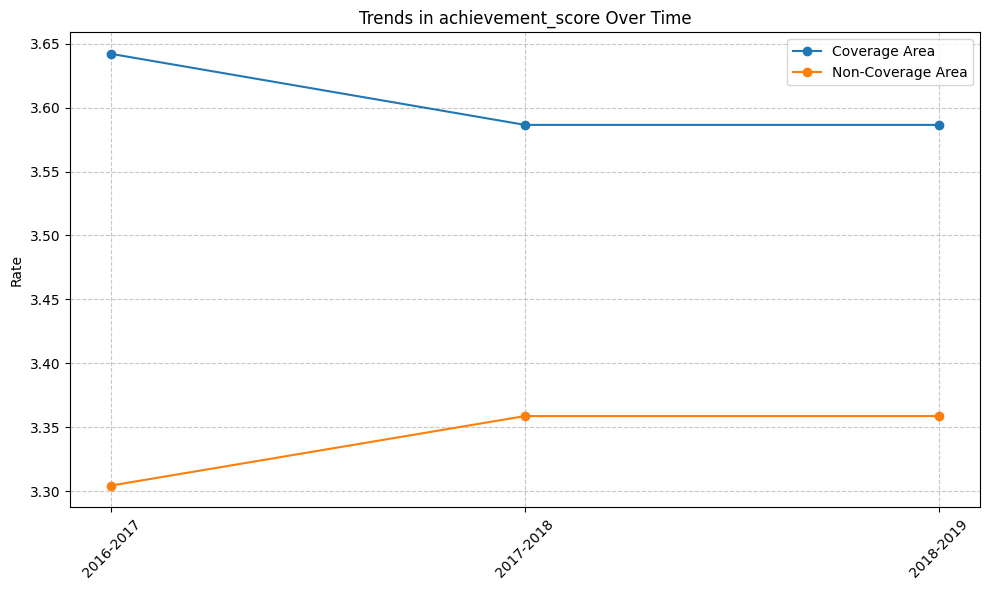


Changes in achievement_score:

Coverage Area:
2016-2017: 3.642
2018-2019: 3.587
Change: -0.056

Non-Coverage Area:
2016-2017: 3.304
2018-2019: 3.359
Change: 0.054



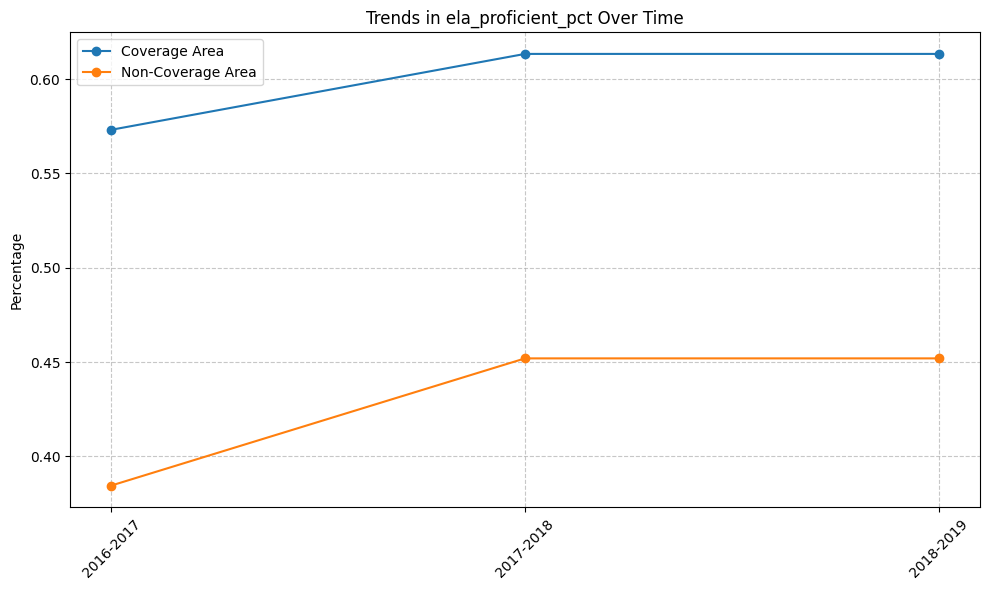


Changes in ela_proficient_pct:

Coverage Area:
2016-2017: 0.573
2018-2019: 0.613
Change: 0.040

Non-Coverage Area:
2016-2017: 0.385
2018-2019: 0.452
Change: 0.067



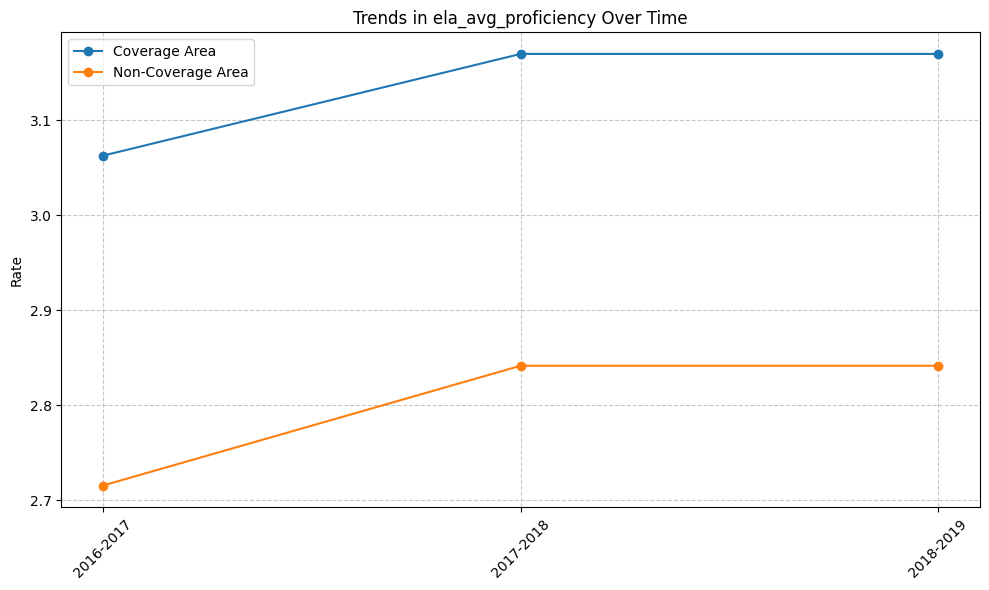


Changes in ela_avg_proficiency:

Coverage Area:
2016-2017: 3.063
2018-2019: 3.170
Change: 0.107

Non-Coverage Area:
2016-2017: 2.715
2018-2019: 2.842
Change: 0.126



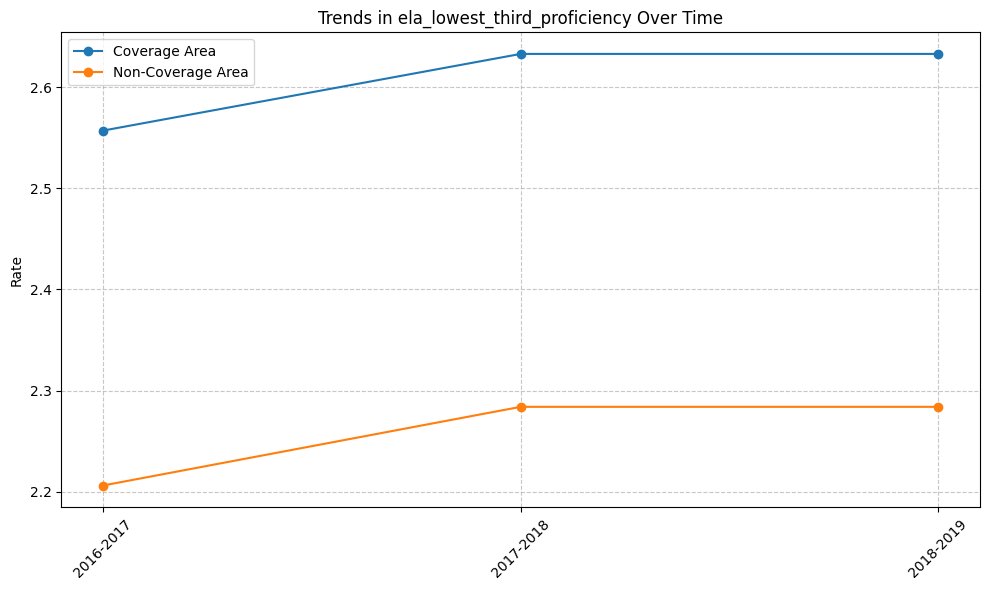


Changes in ela_lowest_third_proficiency:

Coverage Area:
2016-2017: 2.557
2018-2019: 2.633
Change: 0.076

Non-Coverage Area:
2016-2017: 2.206
2018-2019: 2.284
Change: 0.078



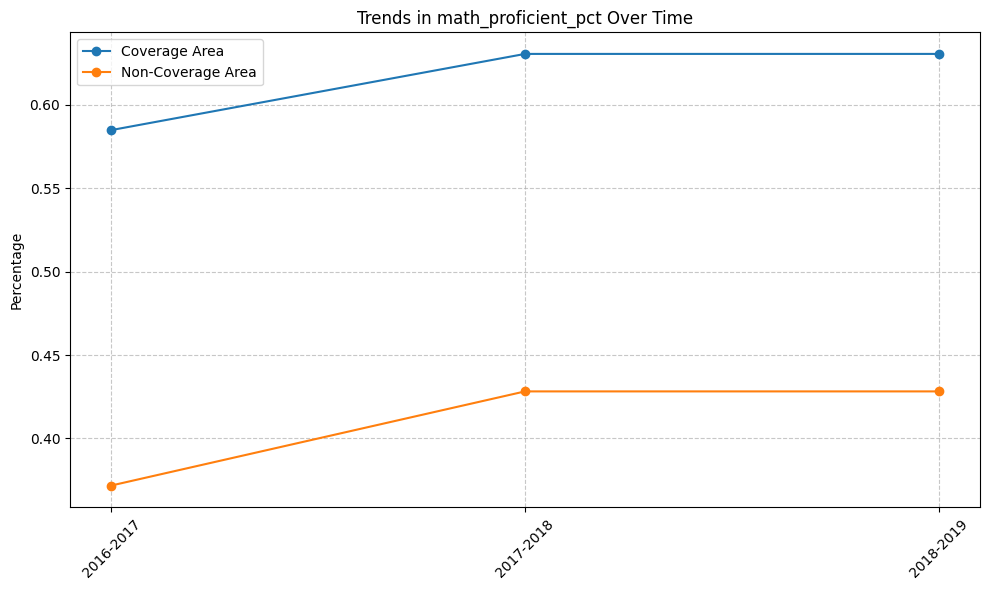


Changes in math_proficient_pct:

Coverage Area:
2016-2017: 0.585
2018-2019: 0.631
Change: 0.046

Non-Coverage Area:
2016-2017: 0.372
2018-2019: 0.428
Change: 0.056



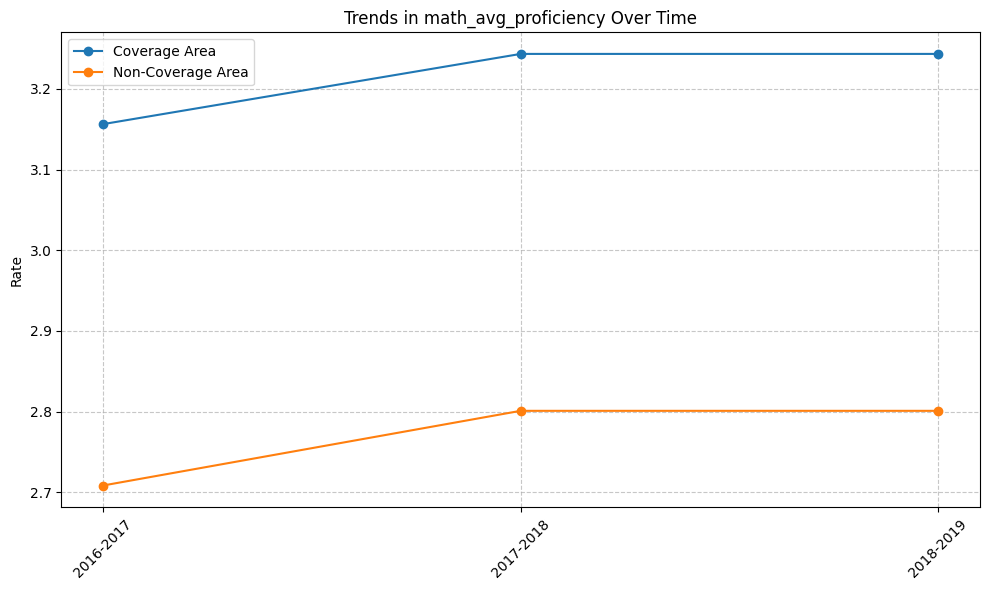


Changes in math_avg_proficiency:

Coverage Area:
2016-2017: 3.156
2018-2019: 3.243
Change: 0.087

Non-Coverage Area:
2016-2017: 2.708
2018-2019: 2.801
Change: 0.093



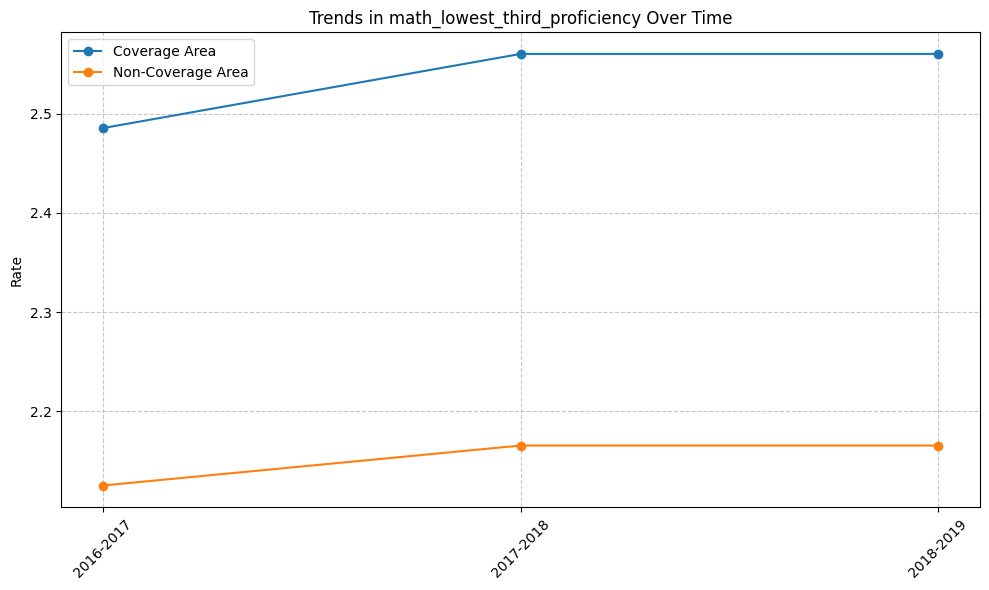


Changes in math_lowest_third_proficiency:

Coverage Area:
2016-2017: 2.486
2018-2019: 2.560
Change: 0.075

Non-Coverage Area:
2016-2017: 2.125
2018-2019: 2.165
Change: 0.040



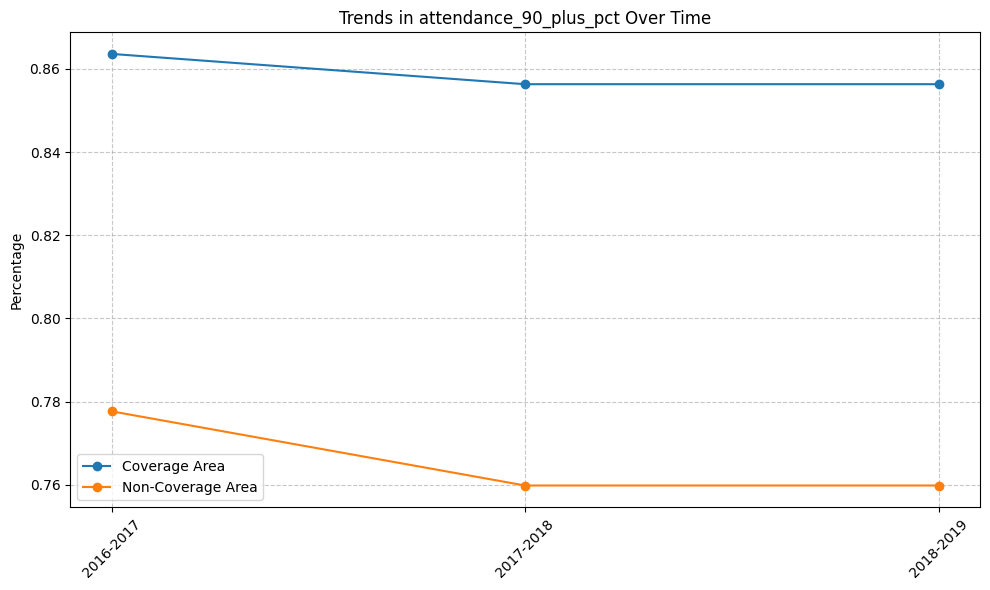


Changes in attendance_90_plus_pct:

Coverage Area:
2016-2017: 0.864
2018-2019: 0.856
Change: -0.007

Non-Coverage Area:
2016-2017: 0.778
2018-2019: 0.760
Change: -0.018



In [20]:
# Calculate means for each year and area
coverage_lg_ach_means = {
    '2016-2017': covered_lg_ach_16_17[lg_ach_features].mean(),
    '2017-2018': covered_lg_ach_17_18[lg_ach_features].mean(),
    '2018-2019': covered_lg_ach_18_19[lg_ach_features].mean()
}

non_coverage_lg_ach_means = {
    '2016-2017': non_covered_lg_ach_16_17[lg_ach_features].mean(),
    '2017-2018': non_covered_lg_ach_17_18[lg_ach_features].mean(),
    '2018-2019': non_covered_lg_ach_18_19[lg_ach_features].mean()
}

# Create DataFrames for easier plotting
coverage_lg_ach_trends = pd.DataFrame(coverage_lg_ach_means)
non_coverage_lg_ach_trends = pd.DataFrame(non_coverage_lg_ach_means)

# Plot trends for each demographic feature
for feature in lg_ach_features:
    plt.figure(figsize=(10, 6))
    
    # Plot both coverage and non-coverage trends
    plt.plot(coverage_lg_ach_trends.columns, coverage_lg_ach_trends.loc[feature], 
             marker='o', label='Coverage Area')
    plt.plot(non_coverage_lg_ach_trends.columns, non_coverage_lg_ach_trends.loc[feature], 
             marker='o', label='Non-Coverage Area')
    
    plt.title(f'Trends in {feature} Over Time')
    plt.ylabel('Percentage' if 'pct' in feature else 'Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print numeric changes
    print(f"\nChanges in {feature}:")
    print("\nCoverage Area:")
    print(f"2016-2017: {coverage_lg_ach_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {coverage_lg_ach_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {coverage_lg_ach_trends.loc[feature, '2018-2019'] - coverage_lg_ach_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\nNon-Coverage Area:")
    print(f"2016-2017: {non_coverage_lg_ach_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {non_coverage_lg_ach_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {non_coverage_lg_ach_trends.loc[feature, '2018-2019'] - non_coverage_lg_ach_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\n" + "="*50)

**Summary of lower grades achievement metrics:**<br>
Achievement trends for lower grades seem nearly identical for schools in both coverage and non-coverage areas, with the exception of `achievement_score`. Non-coverage schools very slightly increased over time, while coverage schools very slightly decreased. The overall difference between these scores is so small as to be negligible, however.

### High school achievement data by academic year: Coverage vs. non-coverage schools <a name="hs-achievement"></a>

In [21]:
# Filter for covered schools
coverage_hs_achievement_df = combined_hs_achievement_df[combined_hs_achievement_df['coverage']==True]

# Coverage area summaries, separated by academic year
covered_hs_ach_16_17 = coverage_hs_achievement_df[coverage_hs_achievement_df['academic_year']=='2016-2017']
covered_hs_ach_17_18 = coverage_hs_achievement_df[coverage_hs_achievement_df['academic_year']=='2017-2018']
covered_hs_ach_18_19 = coverage_hs_achievement_df[coverage_hs_achievement_df['academic_year']=='2018-2019']

# Filter for non-covered schools
non_coverage_hs_achievement_df = combined_hs_achievement_df[combined_hs_achievement_df['coverage']==False]

# Non-coverage area summaries, separated by academic year
non_covered_hs_ach_16_17 = non_coverage_hs_achievement_df[non_coverage_hs_achievement_df['academic_year']=='2016-2017']
non_covered_hs_ach_17_18 = non_coverage_hs_achievement_df[non_coverage_hs_achievement_df['academic_year']=='2017-2018']
non_covered_hs_ach_18_19 = non_coverage_hs_achievement_df[non_coverage_hs_achievement_df['academic_year']=='2018-2019']

In [22]:
hs_ach_features = ['achievement_score', 'grad_rate_4yr', 'grad_rate_6yr', 'regents_english', 'regents_algebra', 
                   'regents_living_env', 'regents_global', 'regents_us_history', 'college_prep_index', 
                   'college_ready_4yr', 'college_ready_6yr', 'postsec_enroll_6mo', 'postsec_enroll_18mo', 'credits_yr1', 
                   'credits_yr2', 'credits_yr3', 'attendance_90_plus_pct']

#### 2016-17 academic year

In [23]:
# Coverage schools achievement data
covered_hs_ach_16_17[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count          27.000000      27.000000      22.000000        30.000000   
mean            3.322963       0.821444       0.861545        74.153333   
std             0.716040       0.109440       0.125279         8.612370   
min             2.380000       0.544000       0.592000        55.400000   
25%             2.725000       0.757500       0.778250        68.225000   
50%             3.180000       0.845000       0.912000        74.700000   
75%             3.925000       0.884500       0.942750        80.125000   
max             4.640000       0.993000       1.000000        92.100000   

0      regents_algebra  regents_living_env  regents_global  \
count        25.000000           24.000000       23.000000   
mean         67.372000           68.329167       66.278261   
std           5.713254            7.353348        9.449433   
min          60.000000           57.000000       51.600000   
25%          63.700000           63.950000       60.650000   
50%          66.400000           68.000000       65.600000   
75%          68.600000           72.825000       72.150000   
max          85.100000           87.400000       88.300000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count            24.00000           27.000000          27.000000   
mean             72.31250            0.500741           0.532889   
std              10.10025            0.291654           0.216307   
min              54.50000            0.163000           0.221000   
25%              65.22500            0.259000           0.353500   
50%              72.40000            0.395000           0.500000   
75%              79.37500            0.766500           0.662500   
max              94.10000            1.000000           0.986000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count          22.000000           26.000000            22.000000   
mean            0.395727            0.659269             0.695045   
std             0.260393            0.167702             0.184678   
min             0.031000            0.175000             0.204000   
25%             0.219750            0.578250             0.561000   
50%             0.347500            0.700500             0.753500   
75%             0.582000            0.770250             0.836750   
max             0.921000            0.906000             0.921000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count    30.000000    30.000000    29.000000               30.000000  
mean      0.863333     0.841433     0.818379                0.675367  
std       0.092289     0.104144     0.107480                0.137152  
min       0.596000     0.643000     0.585000                0.430000  
25%       0.810000     0.764000     0.770000                0.580250  
50%       0.871500     0.850500     0.814000                0.663500  
75%       0.930750     0.944000     0.882000                0.783250  
max       1.000000     1.000000     1.000000                0.945000

In [24]:
# Non-coverage schools achievement data
non_covered_hs_ach_16_17[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count         423.000000     431.000000     387.000000       447.000000   
mean            3.317612       0.790225       0.826401        72.337360   
std             0.700423       0.143078       0.122347         9.443408   
min             1.750000       0.333000       0.462000        48.100000   
25%             2.790000       0.684000       0.735000        66.200000   
50%             3.220000       0.796000       0.833000        72.000000   
75%             3.810000       0.915500       0.932000        78.350000   
max             4.900000       1.000000       1.000000        96.000000   

0      regents_algebra  regents_living_env  regents_global  \
count       429.000000          416.000000      415.000000   
mean         67.688811           67.197596       65.805783   
std           6.870764            7.758465        9.857686   
min          49.000000           51.600000       43.500000   
25%          62.600000           61.500000       58.550000   
50%          66.300000           65.450000       63.500000   
75%          71.600000           72.100000       72.000000   
max          93.600000           93.000000       95.300000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count          407.000000          430.000000         430.000000   
mean            72.320639            0.435181           0.439121   
std              9.741391            0.280981           0.247912   
min             48.200000            0.012000           0.000000   
25%             65.050000            0.194500           0.239500   
50%             71.300000            0.384500           0.377500   
75%             78.800000            0.639250           0.626500   
max             98.200000            1.000000           1.000000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count         387.000000          402.000000           387.000000   
mean            0.324532            0.586577             0.662276   
std             0.254553            0.193241             0.175154   
min             0.016000            0.152000             0.250000   
25%             0.130500            0.429500             0.529000   
50%             0.241000            0.562500             0.652000   
75%             0.461000            0.735750             0.804000   
max             1.000000            1.000000             1.000000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count   452.000000   444.000000   440.000000              453.000000  
mean      0.832235     0.801180     0.776430                0.643499  
std       0.103492     0.117201     0.135873                0.165807  
min       0.472000     0.408000     0.351000                0.196000  
25%       0.762750     0.726750     0.688750                0.512000  
50%       0.837000     0.806000     0.782000                0.639000  
75%       0.912000     0.894000     0.879250                0.776000  
max       1.000000     1.000000     1.000000                0.986000

#### 2017-18 academic year

In [25]:
# Coverage schools achievement data
covered_hs_ach_17_18[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count          30.000000      29.000000      26.000000        30.000000   
mean            3.353667       0.853034       0.880654        70.726667   
std             0.717570       0.097245       0.102278         9.646759   
min             2.010000       0.623000       0.626000        44.900000   
25%             2.867500       0.780000       0.851750        65.775000   
50%             3.435000       0.867000       0.904500        70.500000   
75%             3.902500       0.928000       0.949000        77.125000   
max             4.690000       0.994000       1.000000        87.900000   

0      regents_algebra  regents_living_env  regents_global  \
count        25.000000           24.000000       23.000000   
mean         63.780000           68.475000       69.526087   
std           6.057846            7.682179        9.259698   
min          55.400000           57.400000       54.900000   
25%          60.100000           64.650000       63.750000   
50%          62.600000           66.950000       69.200000   
75%          65.800000           71.675000       75.700000   
max          82.600000           88.100000       90.700000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count           24.000000           29.000000          29.000000   
mean            70.720833            0.453000           0.606966   
std             10.606847            0.258636           0.186706   
min             52.100000            0.159000           0.303000   
25%             62.700000            0.268000           0.480000   
50%             69.700000            0.347000           0.600000   
75%             79.500000            0.564000           0.685000   
max             91.500000            1.000000           0.948000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count          26.000000           27.000000            26.000000   
mean            0.425385            0.668963             0.750654   
std             0.260325            0.148309             0.161271   
min             0.039000            0.302000             0.262000   
25%             0.235750            0.619500             0.664750   
50%             0.398000            0.683000             0.798500   
75%             0.581250            0.741000             0.848000   
max             0.965000            0.908000             0.958000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count    30.000000    30.000000    30.000000               30.000000  
mean      0.878267     0.842333     0.816367                0.651533  
std       0.096140     0.087510     0.106746                0.142939  
min       0.596000     0.682000     0.573000                0.420000  
25%       0.827500     0.773250     0.752500                0.542000  
50%       0.910500     0.851500     0.823500                0.653000  
75%       0.947500     0.894000     0.879750                0.737500  
max       1.000000     0.980000     0.986000                0.926000

In [26]:
# Non-coverage schools achievement data
non_covered_hs_ach_17_18[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count         430.000000     437.000000     398.000000       449.000000   
mean            3.288023       0.812188       0.839053        69.826949   
std             0.713790       0.131641       0.117824         9.608258   
min             1.720000       0.273000       0.481000        47.200000   
25%             2.792500       0.725000       0.752750        63.100000   
50%             3.200000       0.824000       0.838000        69.500000   
75%             3.850000       0.918000       0.938000        75.100000   
max             4.950000       1.000000       1.000000        95.400000   

0      regents_algebra  regents_living_env  regents_global  \
count       434.000000          419.000000      414.000000   
mean         65.300461           67.241050       68.674155   
std           7.235025            8.179092        9.876285   
min          52.600000           47.100000       46.500000   
25%          60.000000           61.600000       61.400000   
50%          63.750000           65.700000       66.850000   
75%          69.375000           72.350000       74.900000   
max          91.600000           93.600000       96.300000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count          409.000000          437.000000         437.000000   
mean            71.949878            0.445416           0.520034   
std              9.397312            0.278719           0.224359   
min             47.900000            0.000000           0.000000   
25%             65.200000            0.203000           0.340000   
50%             70.500000            0.400000           0.461000   
75%             78.200000            0.652000           0.680000   
max             96.900000            1.000000           1.000000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count         398.000000          426.000000           398.000000   
mean            0.363618            0.614700             0.683696   
std             0.256450            0.179381             0.169755   
min             0.000000            0.192000             0.253000   
25%             0.159500            0.467250             0.547500   
50%             0.304000            0.599500             0.682500   
75%             0.526750            0.758750             0.820250   
max             1.000000            1.000000             1.000000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count   443.000000   438.000000   434.000000              453.000000  
mean      0.837343     0.796454     0.789270                0.636631  
std       0.106023     0.121782     0.120996                0.165003  
min       0.436000     0.395000     0.394000                0.192000  
25%       0.778000     0.716250     0.701000                0.515000  
50%       0.846000     0.798000     0.792000                0.629000  
75%       0.915500     0.890000     0.881250                0.772000  
max       1.000000     1.000000     1.000000                1.000000

#### 2018-19 academic year

In [27]:
# Coverage schools achievement data
covered_hs_ach_18_19[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count          30.000000      29.000000      26.000000        30.000000   
mean            3.353667       0.853034       0.880654        70.726667   
std             0.717570       0.097245       0.102278         9.646759   
min             2.010000       0.623000       0.626000        44.900000   
25%             2.867500       0.780000       0.851750        65.775000   
50%             3.435000       0.867000       0.904500        70.500000   
75%             3.902500       0.928000       0.949000        77.125000   
max             4.690000       0.994000       1.000000        87.900000   

0      regents_algebra  regents_living_env  regents_global  \
count        25.000000           24.000000       23.000000   
mean         63.780000           68.475000       69.526087   
std           6.057846            7.682179        9.259698   
min          55.400000           57.400000       54.900000   
25%          60.100000           64.650000       63.750000   
50%          62.600000           66.950000       69.200000   
75%          65.800000           71.675000       75.700000   
max          82.600000           88.100000       90.700000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count           24.000000           29.000000          29.000000   
mean            70.720833            0.453000           0.606966   
std             10.606847            0.258636           0.186706   
min             52.100000            0.159000           0.303000   
25%             62.700000            0.268000           0.480000   
50%             69.700000            0.347000           0.600000   
75%             79.500000            0.564000           0.685000   
max             91.500000            1.000000           0.948000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count          26.000000           27.000000            26.000000   
mean            0.425385            0.668963             0.750654   
std             0.260325            0.148309             0.161271   
min             0.039000            0.302000             0.262000   
25%             0.235750            0.619500             0.664750   
50%             0.398000            0.683000             0.798500   
75%             0.581250            0.741000             0.848000   
max             0.965000            0.908000             0.958000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count    30.000000    30.000000    30.000000               30.000000  
mean      0.878267     0.842333     0.816367                0.651533  
std       0.096140     0.087510     0.106746                0.142939  
min       0.596000     0.682000     0.573000                0.420000  
25%       0.827500     0.773250     0.752500                0.542000  
50%       0.910500     0.851500     0.823500                0.653000  
75%       0.947500     0.894000     0.879750                0.737500  
max       1.000000     0.980000     0.986000                0.926000

In [28]:
# Non-coverage schools achievement data
non_covered_hs_ach_18_19[hs_ach_features].describe()

0      achievement_score  grad_rate_4yr  grad_rate_6yr  regents_english  \
count         430.000000     437.000000     398.000000       449.000000   
mean            3.288023       0.812188       0.839053        69.826949   
std             0.713790       0.131641       0.117824         9.608258   
min             1.720000       0.273000       0.481000        47.200000   
25%             2.792500       0.725000       0.752750        63.100000   
50%             3.200000       0.824000       0.838000        69.500000   
75%             3.850000       0.918000       0.938000        75.100000   
max             4.950000       1.000000       1.000000        95.400000   

0      regents_algebra  regents_living_env  regents_global  \
count       434.000000          419.000000      414.000000   
mean         65.300461           67.241050       68.674155   
std           7.235025            8.179092        9.876285   
min          52.600000           47.100000       46.500000   
25%          60.000000           61.600000       61.400000   
50%          63.750000           65.700000       66.850000   
75%          69.375000           72.350000       74.900000   
max          91.600000           93.600000       96.300000   

0      regents_us_history  college_prep_index  college_ready_4yr  \
count          409.000000          437.000000         437.000000   
mean            71.949878            0.445416           0.520034   
std              9.397312            0.278719           0.224359   
min             47.900000            0.000000           0.000000   
25%             65.200000            0.203000           0.340000   
50%             70.500000            0.400000           0.461000   
75%             78.200000            0.652000           0.680000   
max             96.900000            1.000000           1.000000   

0      college_ready_6yr  postsec_enroll_6mo  postsec_enroll_18mo  \
count         398.000000          426.000000           398.000000   
mean            0.363618            0.614700             0.683696   
std             0.256450            0.179381             0.169755   
min             0.000000            0.192000             0.253000   
25%             0.159500            0.467250             0.547500   
50%             0.304000            0.599500             0.682500   
75%             0.526750            0.758750             0.820250   
max             1.000000            1.000000             1.000000   

0      credits_yr1  credits_yr2  credits_yr3  attendance_90_plus_pct  
count   443.000000   438.000000   434.000000              453.000000  
mean      0.837343     0.796454     0.789270                0.636631  
std       0.106023     0.121782     0.120996                0.165003  
min       0.436000     0.395000     0.394000                0.192000  
25%       0.778000     0.716250     0.701000                0.515000  
50%       0.846000     0.798000     0.792000                0.629000  
75%       0.915500     0.890000     0.881250                0.772000  
max       1.000000     1.000000     1.000000                1.000000

#### Trends in high school achievement data over time

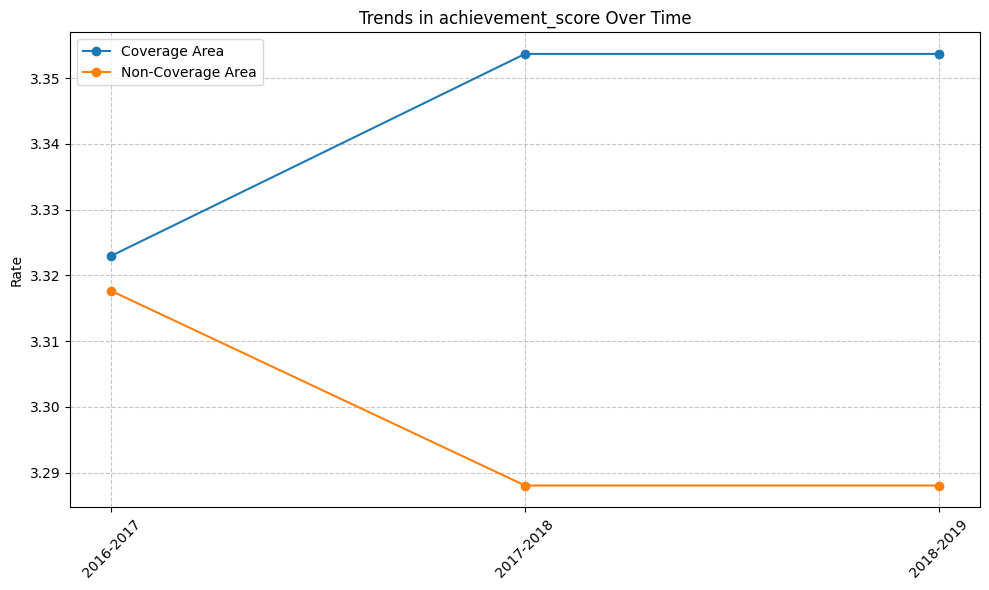


Changes in achievement_score:

Coverage Area:
2016-2017: 3.323
2018-2019: 3.354
Change: 0.031

Non-Coverage Area:
2016-2017: 3.318
2018-2019: 3.288
Change: -0.030



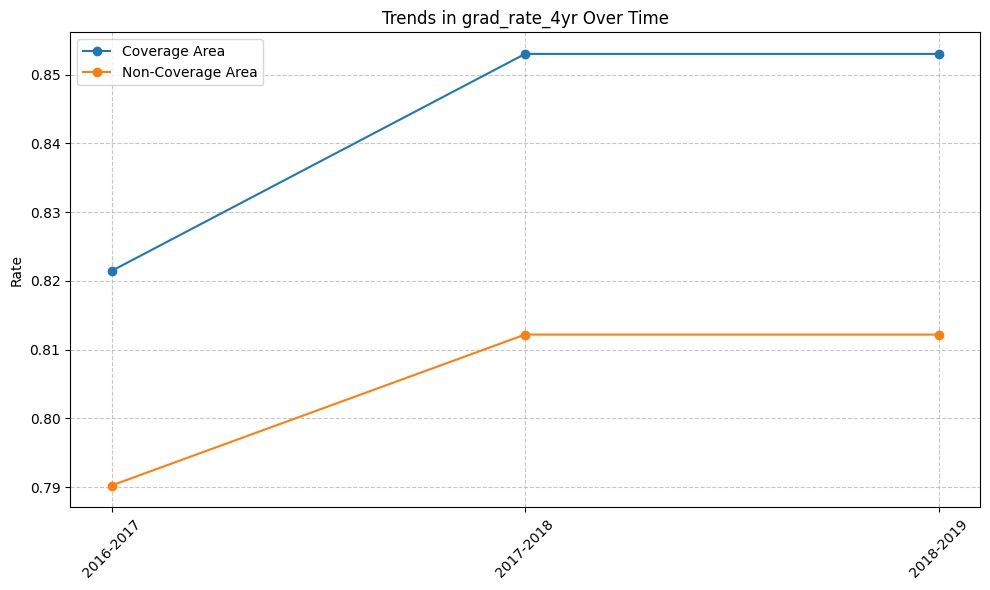


Changes in grad_rate_4yr:

Coverage Area:
2016-2017: 0.821
2018-2019: 0.853
Change: 0.032

Non-Coverage Area:
2016-2017: 0.790
2018-2019: 0.812
Change: 0.022



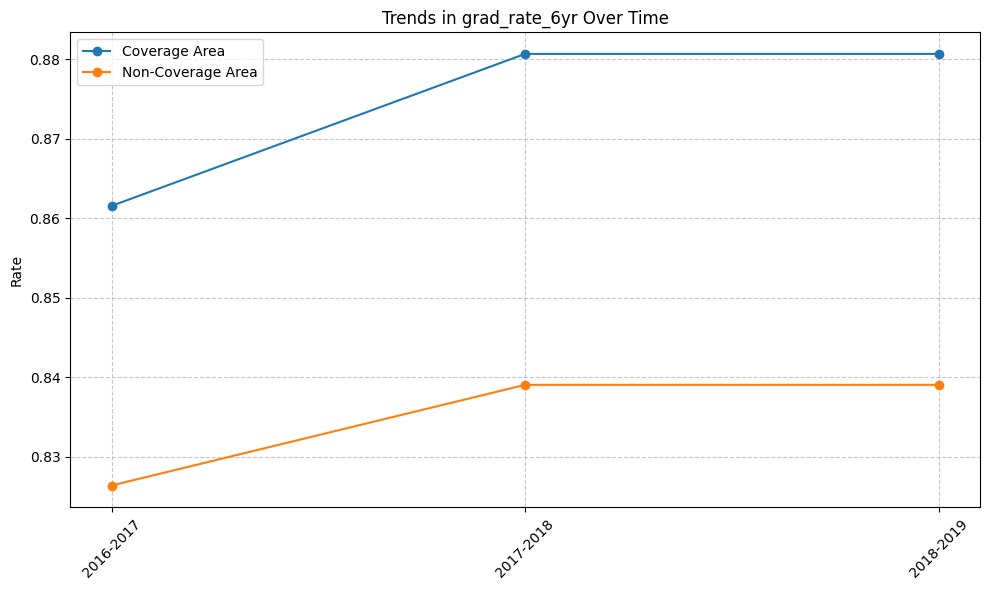


Changes in grad_rate_6yr:

Coverage Area:
2016-2017: 0.862
2018-2019: 0.881
Change: 0.019

Non-Coverage Area:
2016-2017: 0.826
2018-2019: 0.839
Change: 0.013



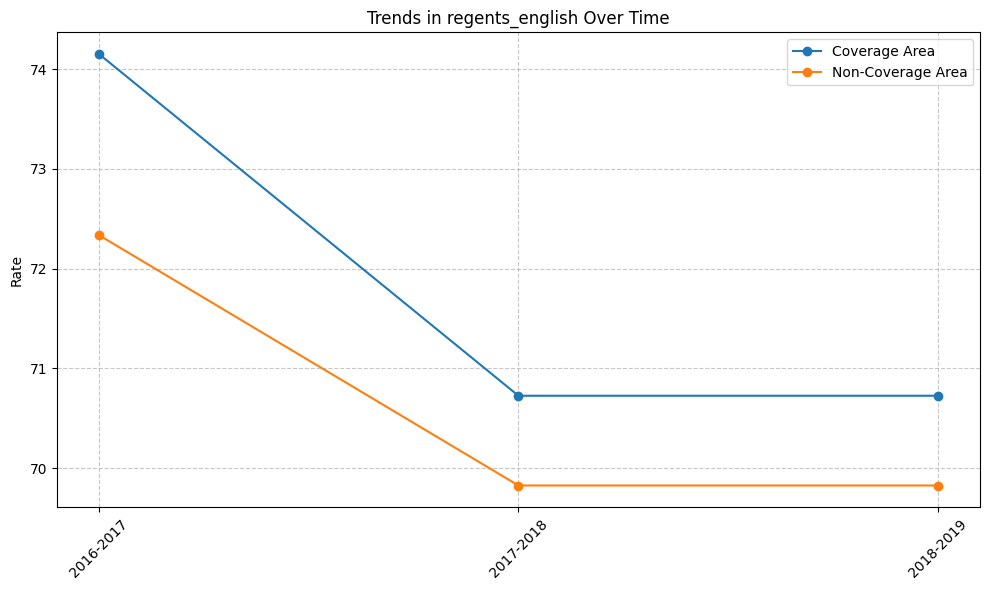


Changes in regents_english:

Coverage Area:
2016-2017: 74.153
2018-2019: 70.727
Change: -3.427

Non-Coverage Area:
2016-2017: 72.337
2018-2019: 69.827
Change: -2.510



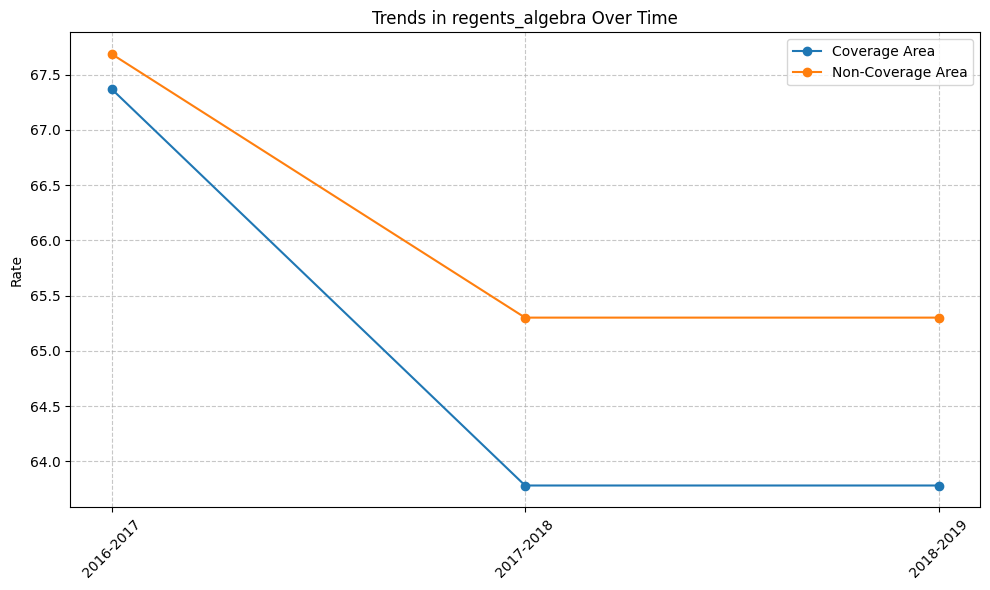


Changes in regents_algebra:

Coverage Area:
2016-2017: 67.372
2018-2019: 63.780
Change: -3.592

Non-Coverage Area:
2016-2017: 67.689
2018-2019: 65.300
Change: -2.388



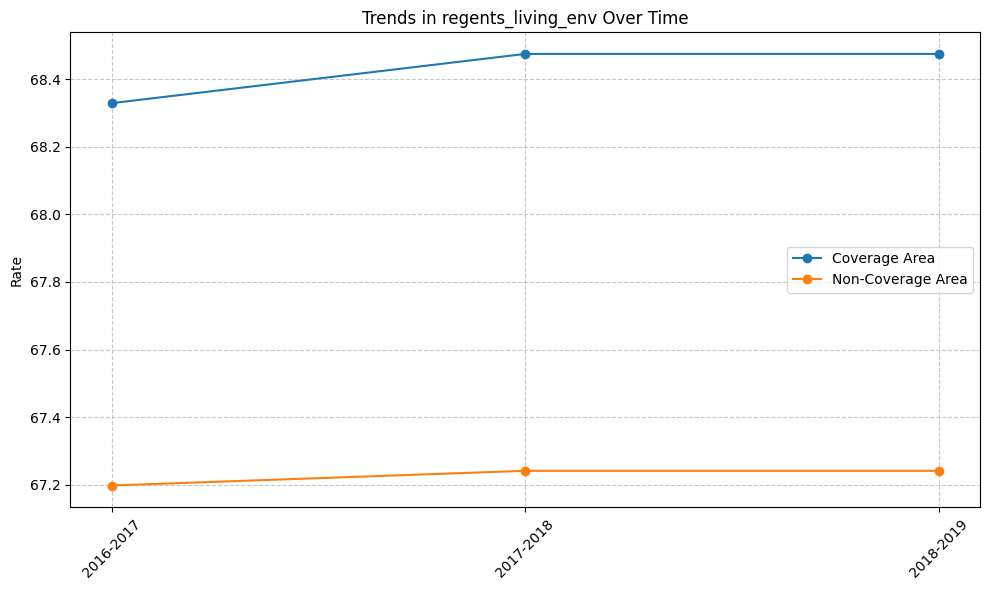


Changes in regents_living_env:

Coverage Area:
2016-2017: 68.329
2018-2019: 68.475
Change: 0.146

Non-Coverage Area:
2016-2017: 67.198
2018-2019: 67.241
Change: 0.043



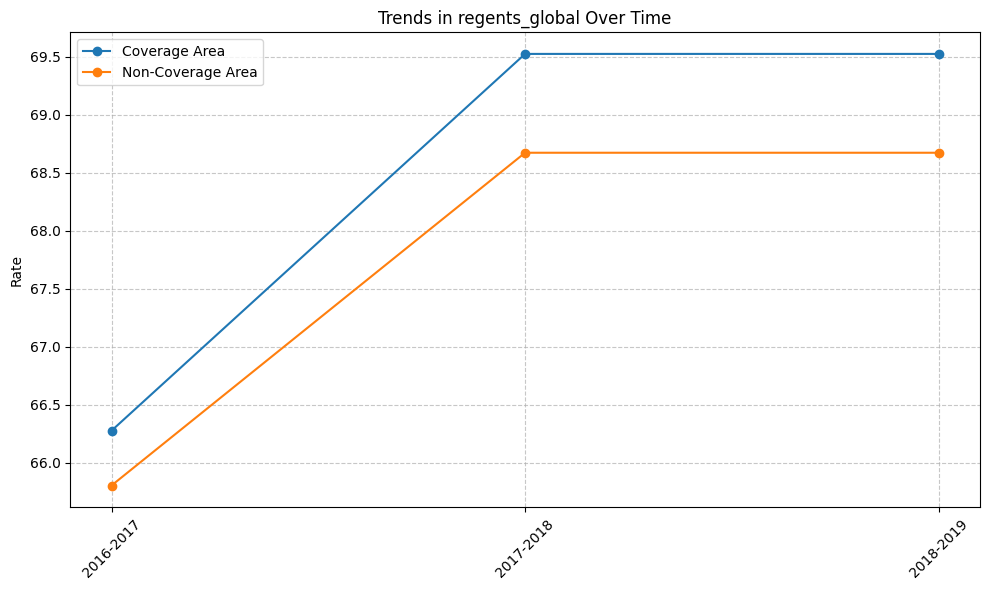


Changes in regents_global:

Coverage Area:
2016-2017: 66.278
2018-2019: 69.526
Change: 3.248

Non-Coverage Area:
2016-2017: 65.806
2018-2019: 68.674
Change: 2.868



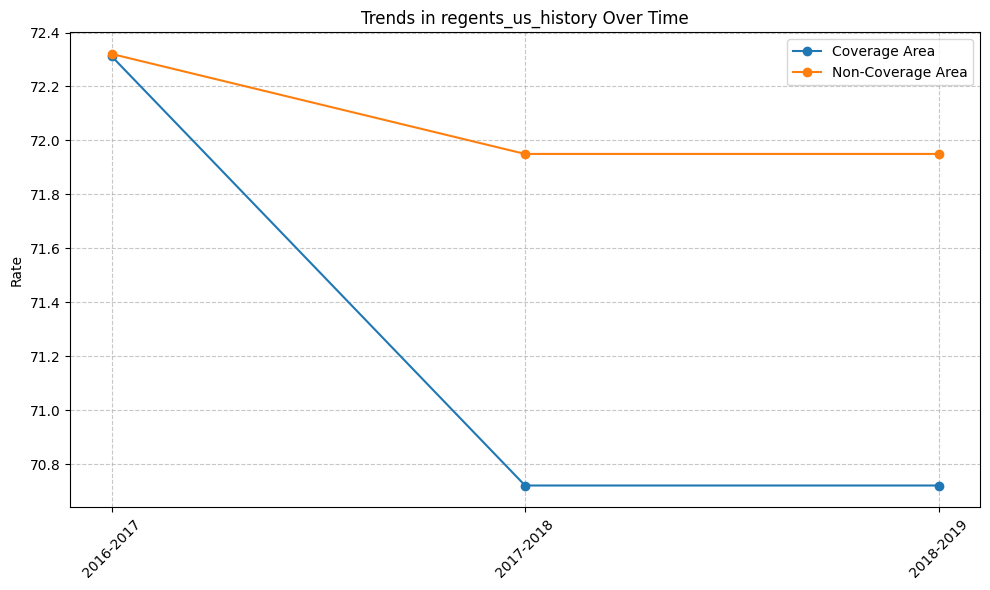


Changes in regents_us_history:

Coverage Area:
2016-2017: 72.313
2018-2019: 70.721
Change: -1.592

Non-Coverage Area:
2016-2017: 72.321
2018-2019: 71.950
Change: -0.371



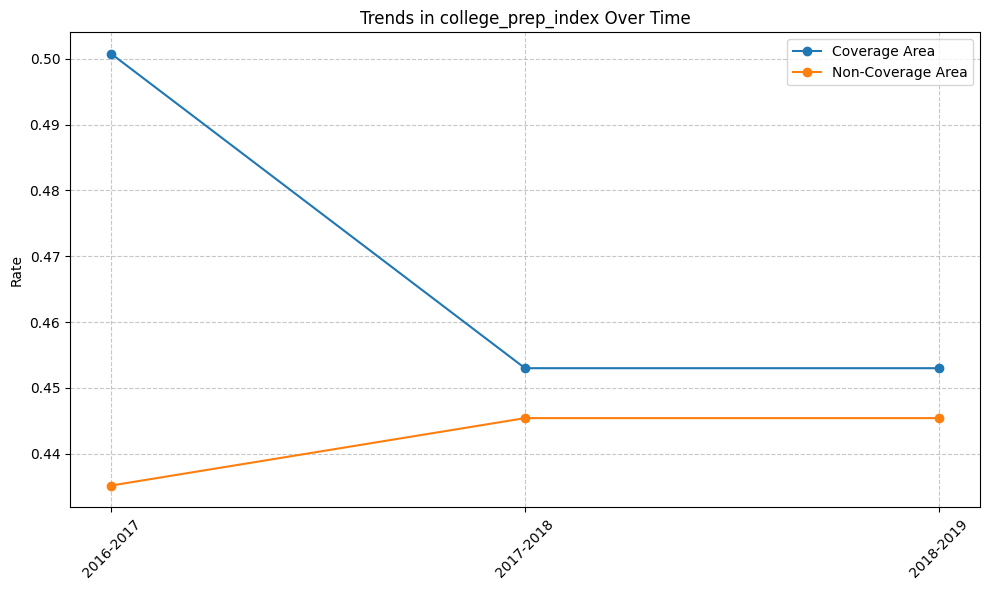


Changes in college_prep_index:

Coverage Area:
2016-2017: 0.501
2018-2019: 0.453
Change: -0.048

Non-Coverage Area:
2016-2017: 0.435
2018-2019: 0.445
Change: 0.010



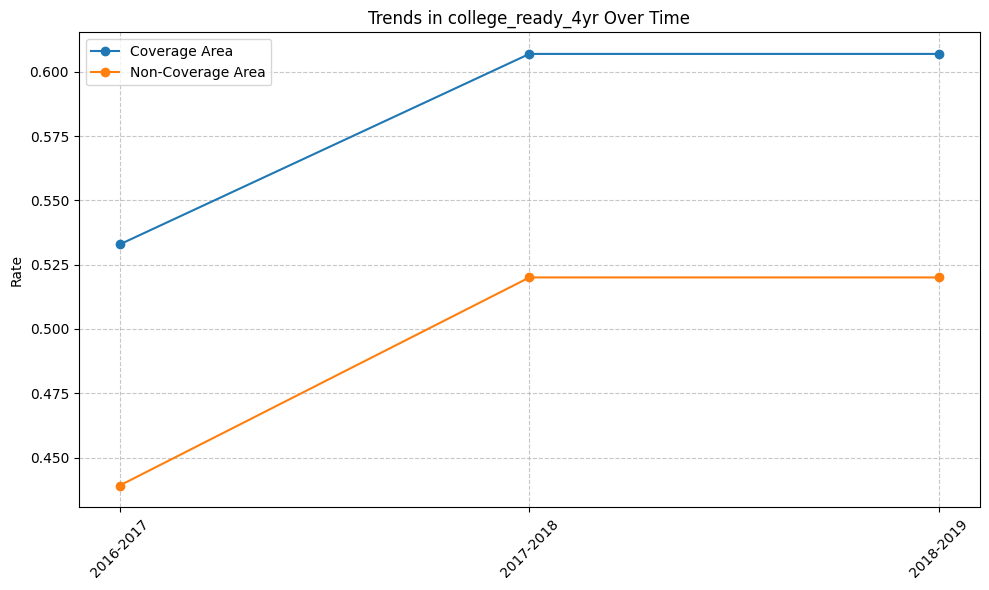


Changes in college_ready_4yr:

Coverage Area:
2016-2017: 0.533
2018-2019: 0.607
Change: 0.074

Non-Coverage Area:
2016-2017: 0.439
2018-2019: 0.520
Change: 0.081



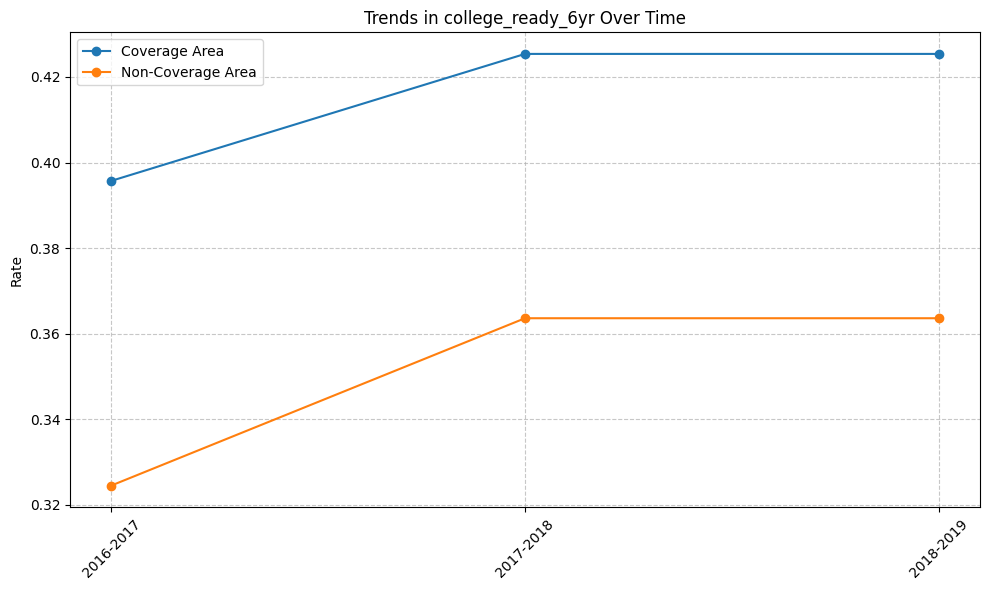


Changes in college_ready_6yr:

Coverage Area:
2016-2017: 0.396
2018-2019: 0.425
Change: 0.030

Non-Coverage Area:
2016-2017: 0.325
2018-2019: 0.364
Change: 0.039



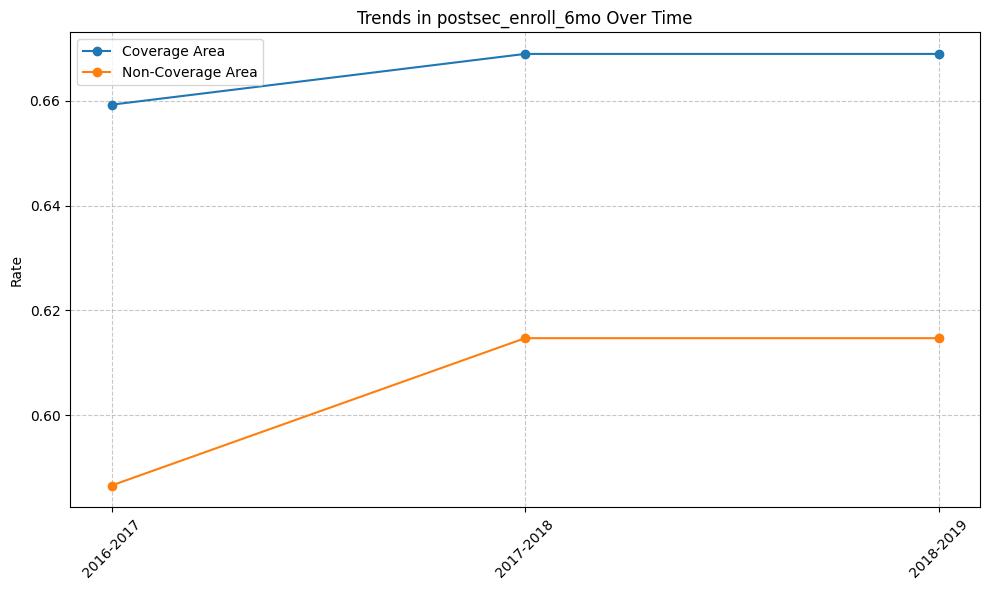


Changes in postsec_enroll_6mo:

Coverage Area:
2016-2017: 0.659
2018-2019: 0.669
Change: 0.010

Non-Coverage Area:
2016-2017: 0.587
2018-2019: 0.615
Change: 0.028



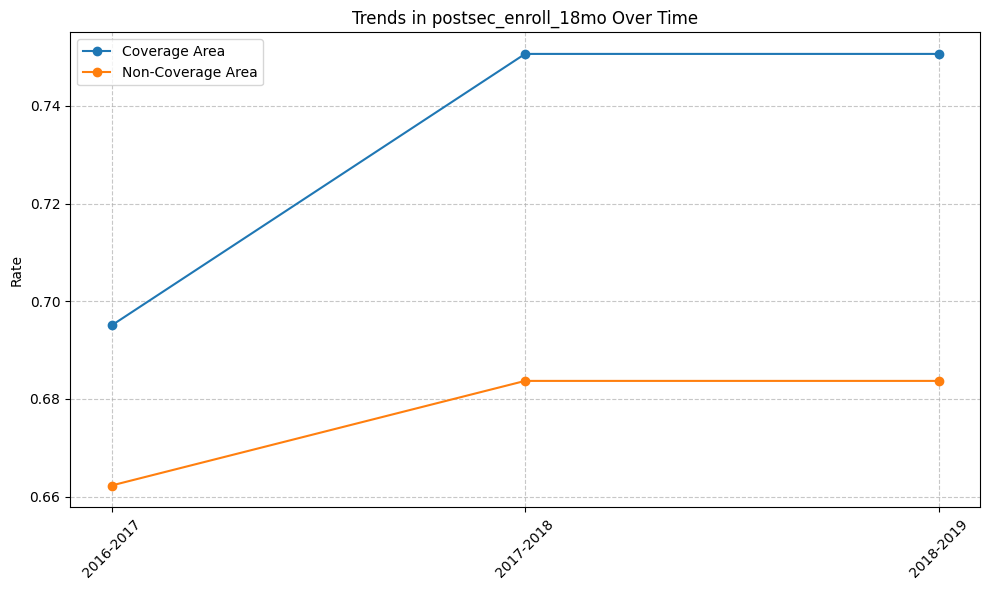


Changes in postsec_enroll_18mo:

Coverage Area:
2016-2017: 0.695
2018-2019: 0.751
Change: 0.056

Non-Coverage Area:
2016-2017: 0.662
2018-2019: 0.684
Change: 0.021



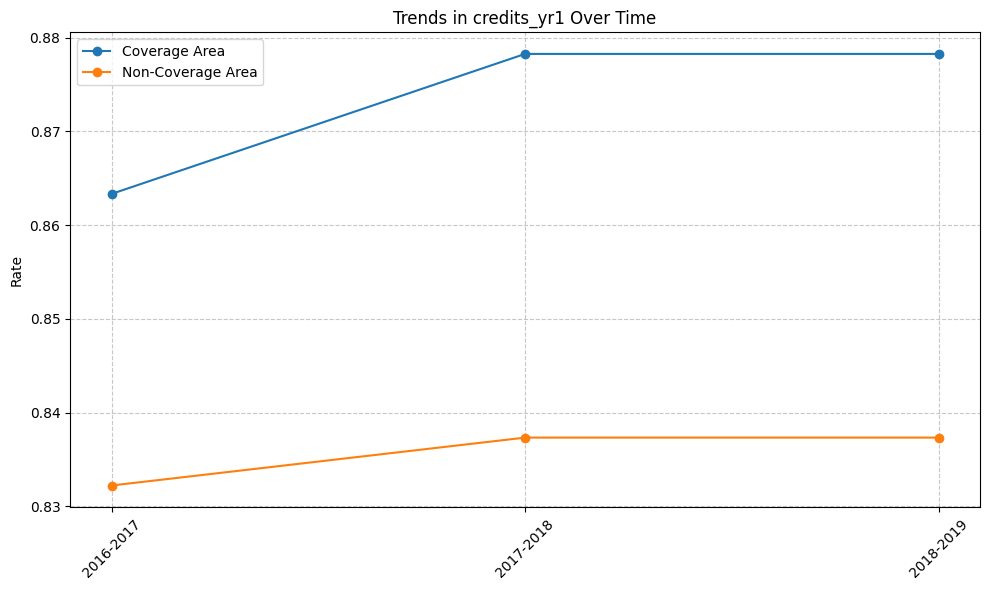


Changes in credits_yr1:

Coverage Area:
2016-2017: 0.863
2018-2019: 0.878
Change: 0.015

Non-Coverage Area:
2016-2017: 0.832
2018-2019: 0.837
Change: 0.005



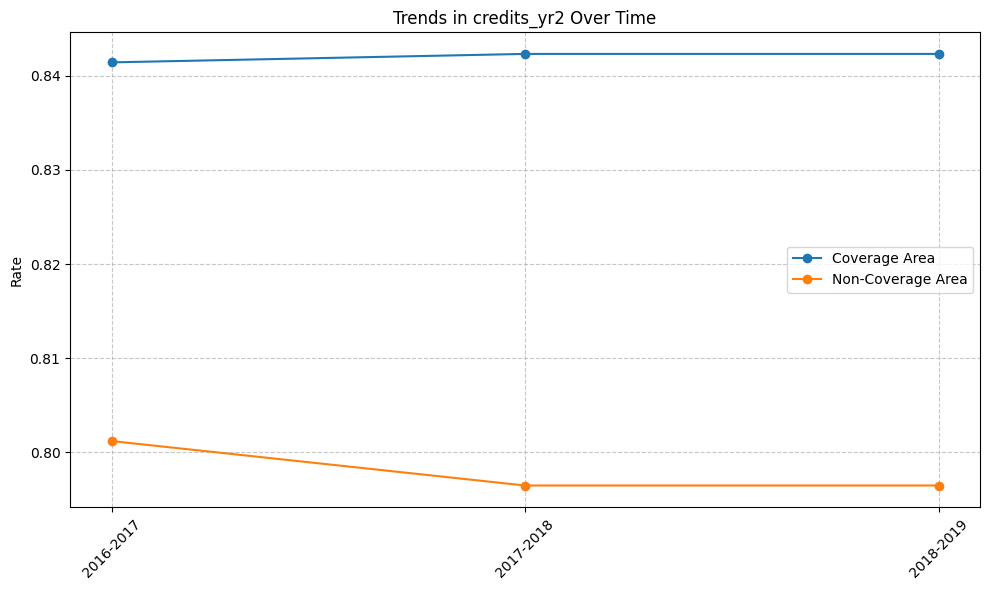


Changes in credits_yr2:

Coverage Area:
2016-2017: 0.841
2018-2019: 0.842
Change: 0.001

Non-Coverage Area:
2016-2017: 0.801
2018-2019: 0.796
Change: -0.005



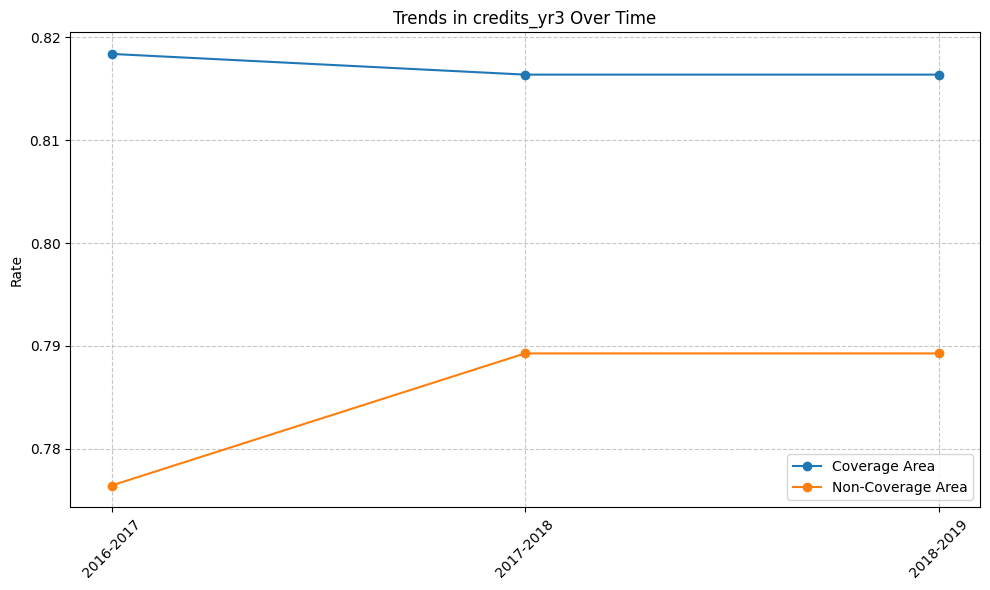


Changes in credits_yr3:

Coverage Area:
2016-2017: 0.818
2018-2019: 0.816
Change: -0.002

Non-Coverage Area:
2016-2017: 0.776
2018-2019: 0.789
Change: 0.013



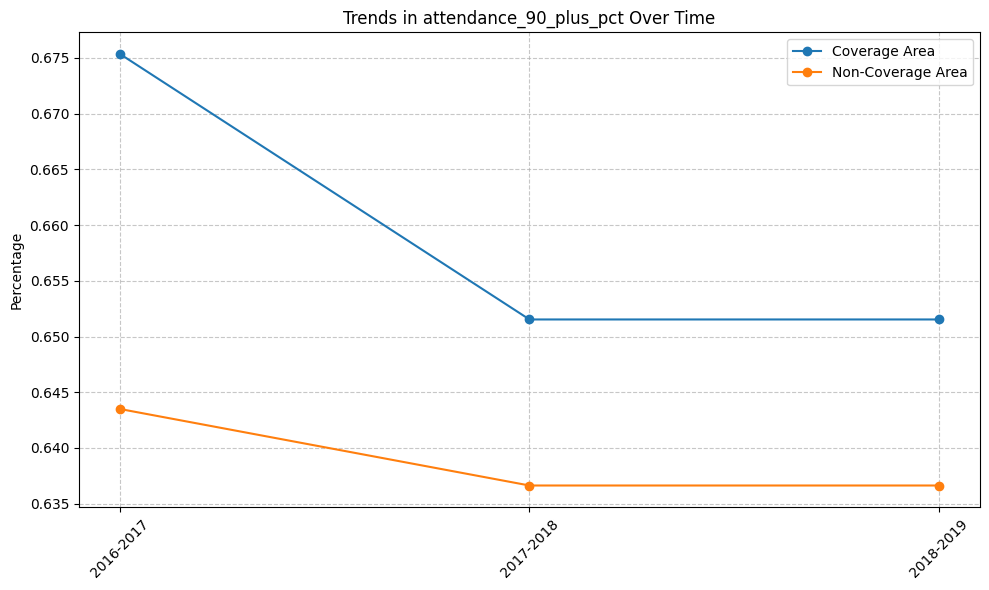


Changes in attendance_90_plus_pct:

Coverage Area:
2016-2017: 0.675
2018-2019: 0.652
Change: -0.024

Non-Coverage Area:
2016-2017: 0.643
2018-2019: 0.637
Change: -0.007



In [29]:
# Calculate means for each year and area
coverage_hs_ach_means = {
    '2016-2017': covered_hs_ach_16_17[hs_ach_features].mean(),
    '2017-2018': covered_hs_ach_17_18[hs_ach_features].mean(),
    '2018-2019': covered_hs_ach_18_19[hs_ach_features].mean()
}

non_coverage_hs_ach_means = {
    '2016-2017': non_covered_hs_ach_16_17[hs_ach_features].mean(),
    '2017-2018': non_covered_hs_ach_17_18[hs_ach_features].mean(),
    '2018-2019': non_covered_hs_ach_18_19[hs_ach_features].mean()
}

# Create DataFrames for easier plotting
coverage_hs_ach_trends = pd.DataFrame(coverage_hs_ach_means)
non_coverage_hs_ach_trends = pd.DataFrame(non_coverage_hs_ach_means)

# Plot trends for each demographic feature
for feature in hs_ach_features:
    plt.figure(figsize=(10, 6))
    
    # Plot both coverage and non-coverage trends
    plt.plot(coverage_hs_ach_trends.columns, coverage_hs_ach_trends.loc[feature], 
             marker='o', label='Coverage Area')
    plt.plot(non_coverage_hs_ach_trends.columns, non_coverage_hs_ach_trends.loc[feature], 
             marker='o', label='Non-Coverage Area')
    
    plt.title(f'Trends in {feature} Over Time')
    plt.ylabel('Percentage' if 'pct' in feature else 'Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print numeric changes
    print(f"\nChanges in {feature}:")
    print("\nCoverage Area:")
    print(f"2016-2017: {coverage_hs_ach_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {coverage_hs_ach_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {coverage_hs_ach_trends.loc[feature, '2018-2019'] - coverage_hs_ach_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\nNon-Coverage Area:")
    print(f"2016-2017: {non_coverage_hs_ach_trends.loc[feature, '2016-2017']:.3f}")
    print(f"2018-2019: {non_coverage_hs_ach_trends.loc[feature, '2018-2019']:.3f}")
    print(f"Change: {non_coverage_hs_ach_trends.loc[feature, '2018-2019'] - non_coverage_hs_ach_trends.loc[feature, '2016-2017']:.3f}")
    
    print("\n" + "="*50)

**Summary of high school achievement metrics:**<br>
With a few exceptions, trends for both coverage and non-coverage schools seem to follow the same pattern. There is a slight gap between coverage and non-coverage schools for all variables.

---

## Noise data <a name="noise-data"></a>

### Hourly recording data

In [30]:
# Create a dictionary for renaming the columns for simpler legend labels
simplified_labels = {
    '1_engine_presence': 'engine',
    '2_machinery-impact_presence': 'machinery',
    '3_non-machinery-impact_presence': 'non-machinery',
    '4_powered-saw_presence': 'powered saw',
    '5_alert-signal_presence': 'alert signal',
    '6_music_presence': 'music',
    '7_human-voice_presence': 'human voice',
    '8_dog_presence': 'dog'
}

# Get list of presence variables only
presence_cols = [col for col in noise_data.columns if col.endswith('_presence')]

# Rename columns for plotting
hourly_means = noise_data.groupby('hour')[presence_cols].mean().rename(columns=simplified_labels)

<Figure size 2500x1000 with 0 Axes>

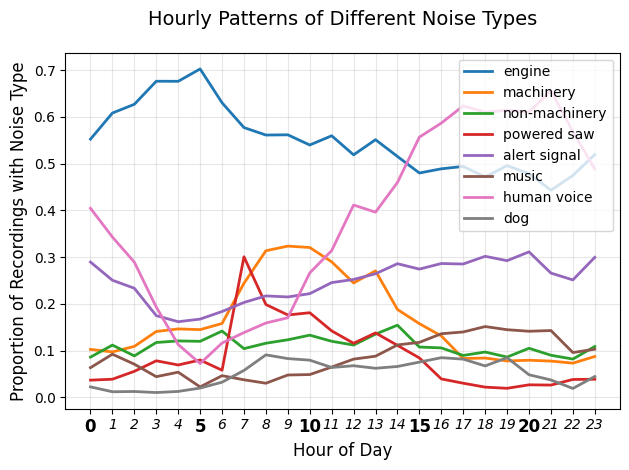

In [31]:
# Plot with adjusted legend
plt.figure(figsize=(25, 10))
hourly_means.plot(linewidth=2)

# Titles and labels
plt.title('Hourly Patterns of Different Noise Types', pad=20, size=14)
plt.xlabel('Hour of Day', size=12)
plt.ylabel('Proportion of Recordings with Noise Type', size=12)

# Grid and legend
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10, framealpha=0.8)

# Customizing x-axis ticks
ticks = range(24)  # Hours from 0 to 23
plt.xticks(ticks=ticks)  # Set ticks

# Modify the appearance of tick labels
ax = plt.gca()
for tick in ax.get_xticklabels():
    hour = int(tick.get_text())
    if hour % 5 == 0:  # Larger for multiples of 5
        tick.set_fontsize(12)
        tick.set_fontweight('bold')
    else:  # Smaller for all other hours
        tick.set_fontsize(10)
        tick.set_fontstyle('italic')

# Layout adjustments and show
plt.tight_layout()
plt.show()

This lineplot reveals interesting noise patterns throughout the day:
- Perhaps unsurprisingly, engines are the most common sound and peak in activity around 5am, near morning rush hour.
- Human voice activity has the widest variation of all sounds. Activity is lowest around 5am and highest around 9pm.
- Powered saws have a shart spike in activity at 7am and gradually decrease throughout the day from there, with the least activity happening around 7pm.
- Machinery sounds are active throughout the school day, peaking in activity around 10am.
- Music is relatively infrequent, but sees a dip in activity during the morning hours, with most music being played between 4pm and 9pm.

### Weekly recording data

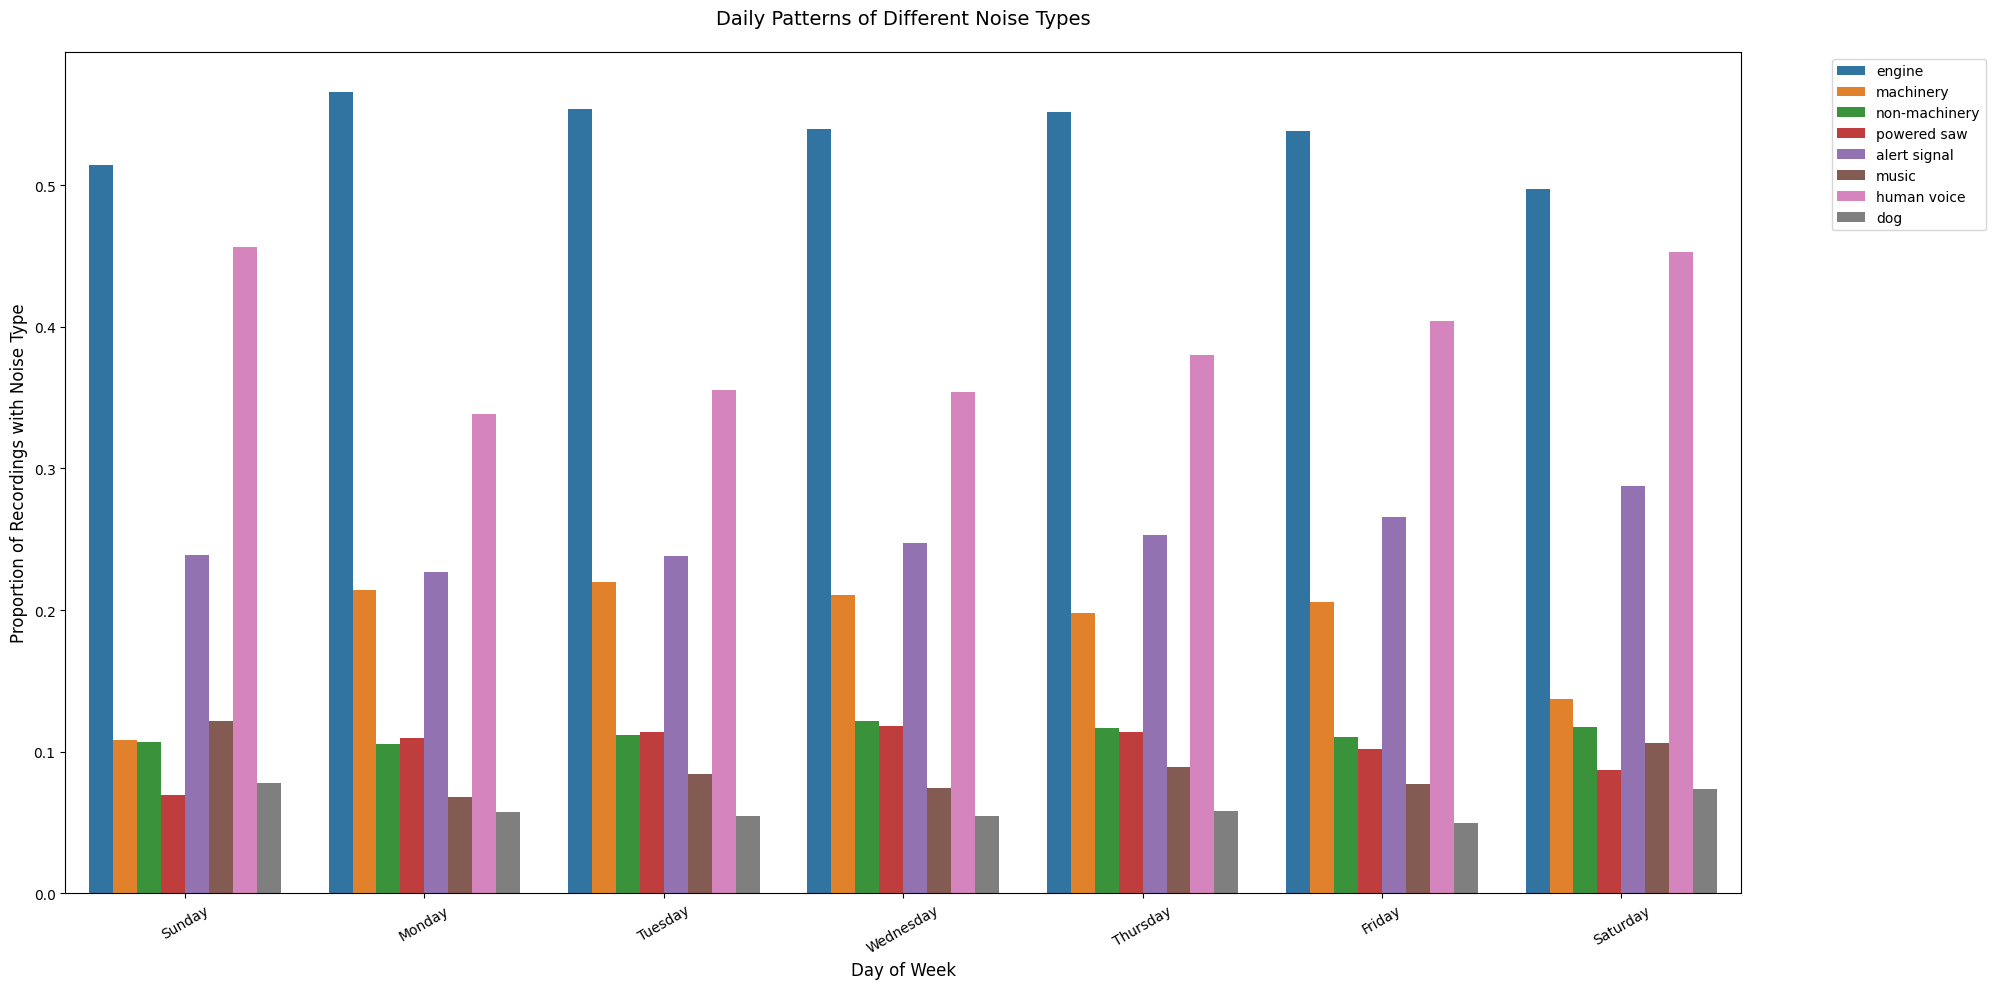

In [32]:
# Create day of week patterns
plt.figure(figsize=(20, 10))
day_map = {6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
           3: 'Thursday', 4: 'Friday', 5: 'Saturday'}
daily_means = noise_data.groupby('day')[presence_cols].mean().rename(columns=simplified_labels)
daily_means = daily_means.reindex([6, 0, 1, 2, 3, 4, 5])
daily_means.index = [day_map[x] for x in daily_means.index]

# Using seaborn's barplot for better spacing and appearance
plot_data = daily_means.reset_index().melt(id_vars='index')
sns.barplot(data=plot_data, x='index', y='value', hue='variable')
plt.title('Daily Patterns of Different Noise Types', pad=20, size=14)
plt.xlabel('Day of Week', size=12)
plt.ylabel('Proportion of Recordings with Noise Type', size=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Some observations on weekly noise activity:
- Engine sounds remain relatively constant throughout the week, but see a slight decline in activity on Saturday and Sunday.
- Human voices are most recorded on Friday, Saturday, and Sunday.
- Music is recorded most on Saturday and Sunday.
- Machinery is highly active from Monday through Friday compared to Saturday and Sunday.
- Likewise, powered saws are heard most often Monday through Friday and see a decline in activity on Saturday and Sunday.

### Monthly recording data

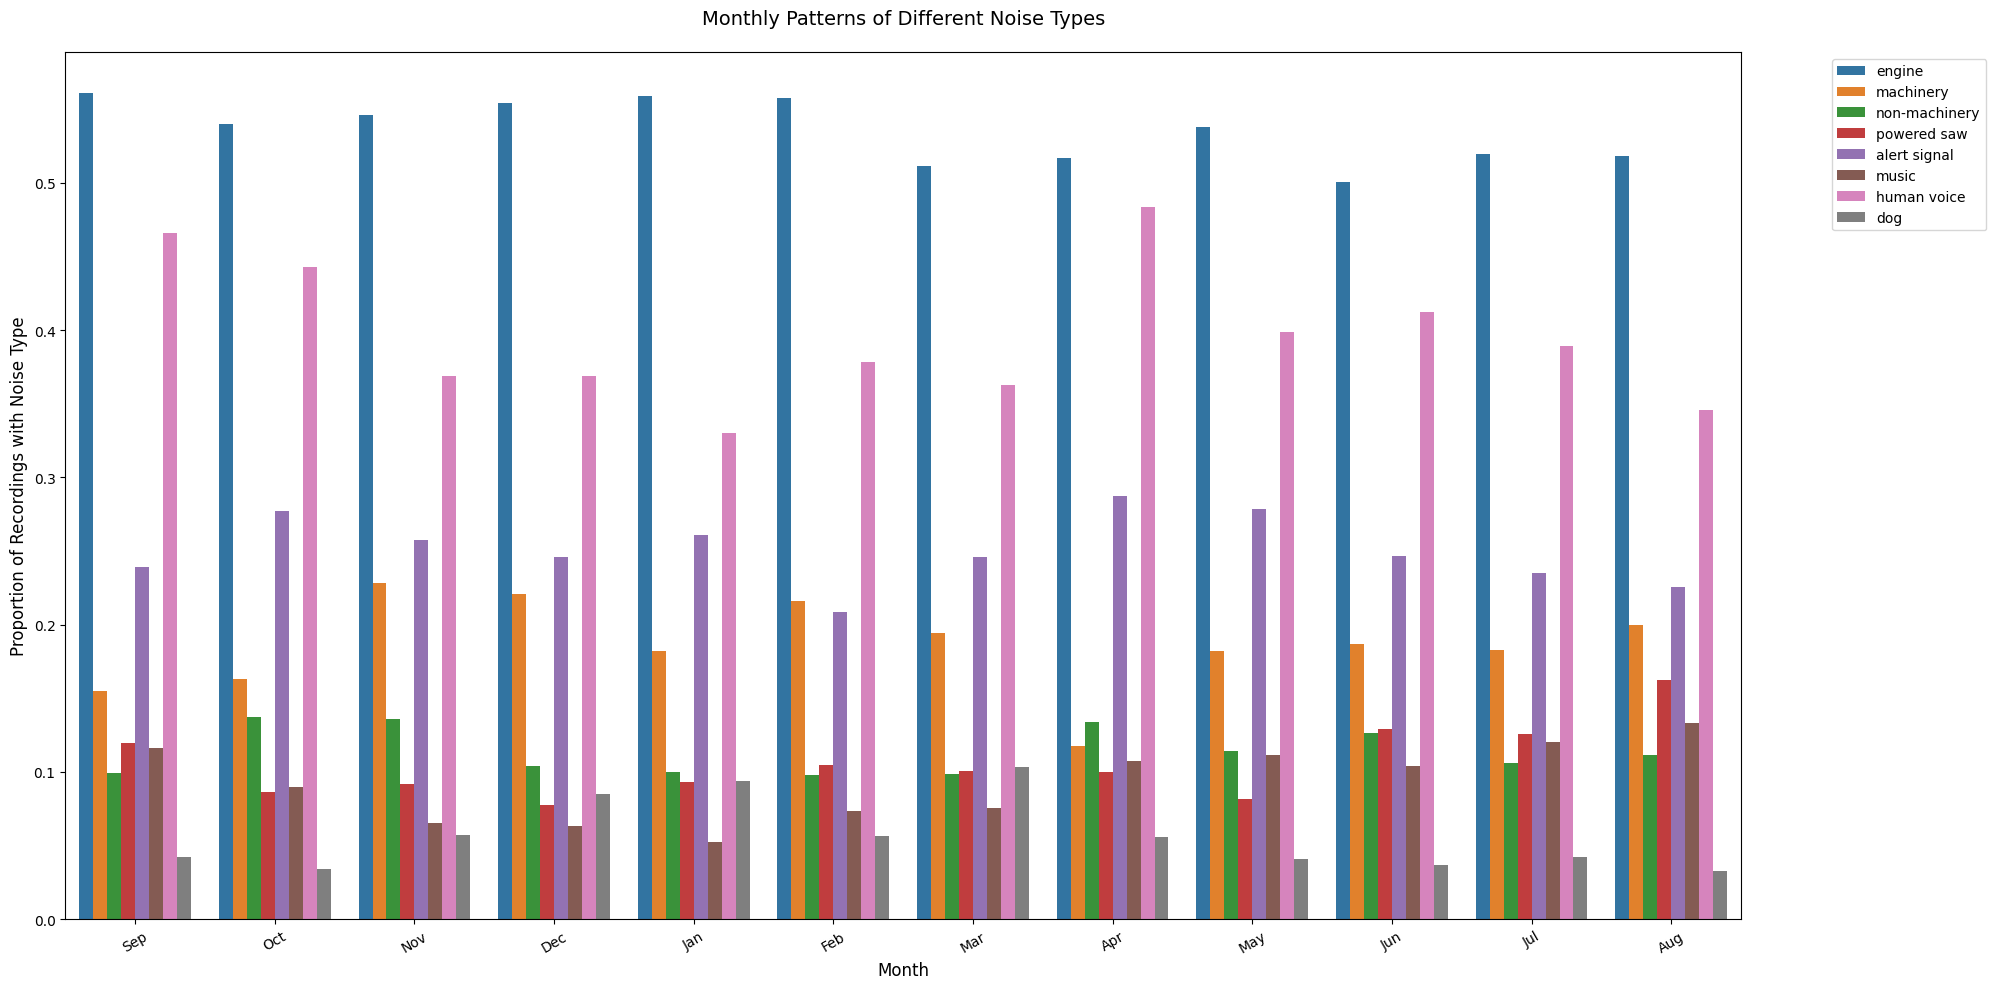

In [33]:
# Create monthly patterns
plt.figure(figsize=(20, 10))
noise_data['month'] = noise_data['date'].dt.month
monthly_means = noise_data.groupby('month')[presence_cols].mean().rename(columns=simplified_labels)
monthly_means = monthly_means.reindex([9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8])
month_map = {9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec',
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
            5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug'}
monthly_means.index = [month_map[x] for x in monthly_means.index]

# Using seaborn's barplot for monthly data as well
plot_data = monthly_means.reset_index().melt(id_vars='index')
sns.barplot(data=plot_data, x='index', y='value', hue='variable')
plt.title('Monthly Patterns of Different Noise Types', pad=20, size=14)
plt.xlabel('Month', size=12)
plt.ylabel('Proportion of Recordings with Noise Type', size=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Monthly noise pattern observations:
- Again, engine sounds are relatively constant throughout the year.
- There is a spike in human voice captures in April. Human voice recordings are also relatively high in September and October.
- Machinery recordings are captured slightly less frequently in April.

### Noise summary statistics

In [34]:
# Summary statistics
print("\nOverall prevalence of each noise type:")
prevalence = noise_data[presence_cols].mean().sort_values(ascending=False)
print(prevalence)

print("\nNumber of annotations per recording:")
print(noise_data['annotation_count'].describe())


Overall prevalence of each noise type:
1_engine_presence                  0.538453
7_human-voice_presence             0.388978
5_alert-signal_presence            0.251237
2_machinery-impact_presence        0.188178
3_non-machinery-impact_presence    0.113107
4_powered-saw_presence             0.103431
6_music_presence                   0.087416
8_dog_presence                     0.060112
dtype: float64

Number of annotations per recording:
count    17983.000000
mean         3.230607
std          1.089700
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         22.000000
Name: annotation_count, dtype: float64


### Calculate and analyze recordings per school

In [35]:
# Let's add a column academic_year to noise_data for easier analysis
# Create academic_year by checking if date is before or after September 1st
noise_data['academic_year'] = noise_data['date'].apply(
    lambda x: f"{x.year}-{x.year + 1}" if x.month >= 9 else f"{x.year - 1}-{x.year}"
)

In [36]:
# First, get our sensor-level recordings by year
sensor_recordings = noise_data.groupby(['sensor_id', 'academic_year']).size().reset_index(name='num_recordings')

# Get list of sensor columns from coverage_matrix 
sensor_cols = [col for col in coverage_matrix.columns if col.startswith('sensor_')]

# Initialize DataFrame to store school recordings
school_recordings = []

# For each school
for idx, row in coverage_matrix.iterrows():
    school_dbn = row['DBN']
    
    # Get the sensors that cover this school
    school_sensors = []
    for col in sensor_cols:
        if row[col] == 1:
            sensor_id = int(col.replace('sensor_', ''))
            school_sensors.append(sensor_id)
    
    # For each academic year, sum the recordings from all sensors covering this school
    for year in sensor_recordings['academic_year'].unique():
        year_recordings = sensor_recordings[
            (sensor_recordings['sensor_id'].isin(school_sensors)) & 
            (sensor_recordings['academic_year'] == year)
        ]['num_recordings'].sum()
        
        school_recordings.append({
            'DBN': school_dbn,
            'academic_year': year,
            'num_recordings': year_recordings
        })

# Convert to DataFrame
school_recordings_df = pd.DataFrame(school_recordings)

#### Boxplot for Distribution of Recordings per School by Academic Year

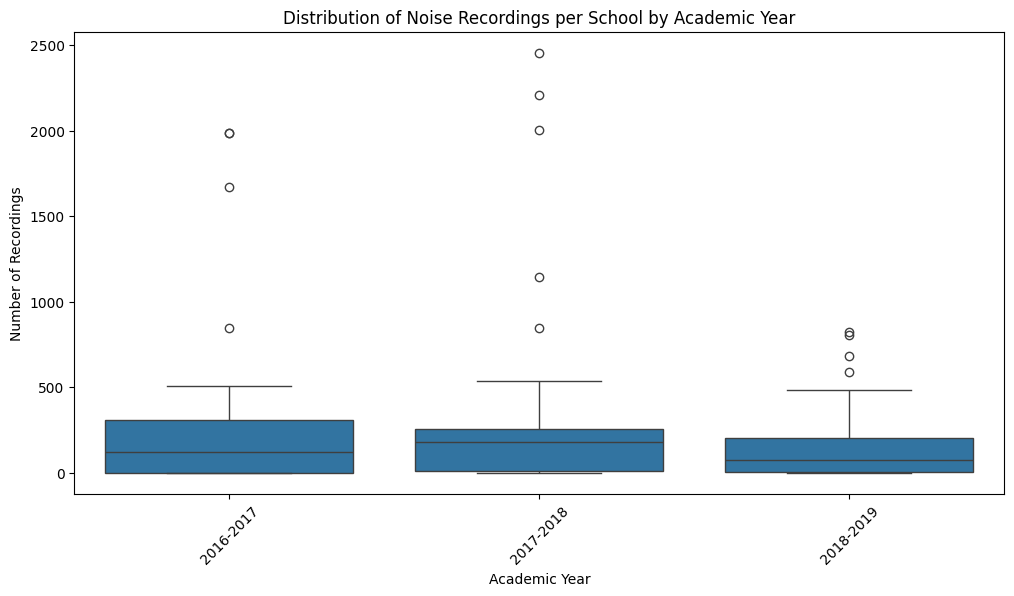


Summary statistics of recordings per school:
               count        mean         std  min    25%    50%    75%     max
academic_year                                                                 
2016-2017       54.0  253.203704  436.946626  0.0   0.00  122.5  304.5  1988.0
2017-2018       54.0  315.203704  524.847125  0.0  11.00  177.0  252.0  2457.0
2018-2019       54.0  167.277778  215.232425  0.0   4.25   75.5  204.0   822.0


In [37]:
# Create boxplot of recordings per school
plt.figure(figsize=(12, 6))
sns.boxplot(data=school_recordings_df, x='academic_year', y='num_recordings')
plt.title('Distribution of Noise Recordings per School by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Number of Recordings')
plt.xticks(rotation=45)
plt.show()

# Print summary statistics
print("\nSummary statistics of recordings per school:")
print(school_recordings_df.groupby('academic_year')['num_recordings'].describe())

In [38]:
# Identify schools with notably high or low recording counts
for year in school_recordings_df['academic_year'].unique():
    year_data = school_recordings_df[school_recordings_df['academic_year'] == year]
    Q1 = year_data['num_recordings'].quantile(0.25)
    Q3 = year_data['num_recordings'].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = year_data[
        (year_data['num_recordings'] < (Q1 - 1.5 * IQR)) |
        (year_data['num_recordings'] > (Q3 + 1.5 * IQR))
    ]
    
    if len(outliers) > 0:
        print(f"\nOutlier schools in {year}:")
        print(f"Expected range: {Q1 - 1.5 * IQR:.0f} to {Q3 + 1.5 * IQR:.0f} recordings")
        print(outliers[['DBN', 'num_recordings']].sort_values('num_recordings'))


Outlier schools in 2016-2017:
Expected range: -457 to 761 recordings
      DBN  num_recordings
9  02M260             848
6  02M534            1668
3  02M041            1984
0  84M202            1988

Outlier schools in 2017-2018:
Expected range: -350 to 614 recordings
       DBN  num_recordings
64  02M442             847
10  02M260            1144
7   02M534            2006
4   02M041            2206
1   84M202            2457

Outlier schools in 2018-2019:
Expected range: -295 to 504 recordings
       DBN  num_recordings
11  02M260             589
5   02M041             679
8   02M534             807
2   84M202             822


#### Boxplot for Distribution of Recordings per School by Academic Year, Outliers Removed

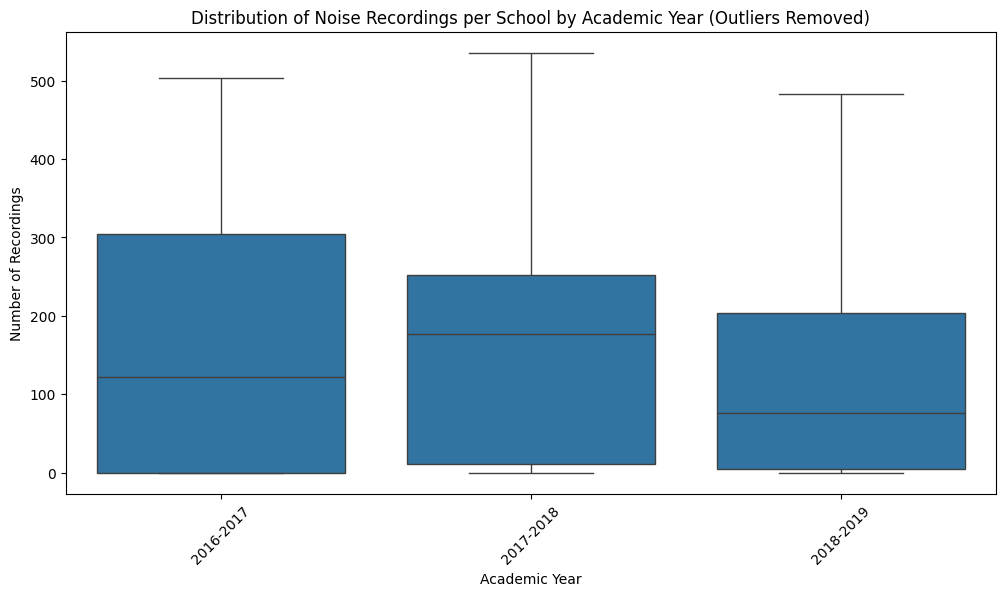

In [39]:
# Create boxplot of recordings per school
plt.figure(figsize=(12, 6))
sns.boxplot(data=school_recordings_df, x='academic_year', y='num_recordings', showfliers=False)
plt.title('Distribution of Noise Recordings per School by Academic Year (Outliers Removed)')
plt.xlabel('Academic Year')
plt.ylabel('Number of Recordings')
plt.xticks(rotation=45)
plt.show()

## Recording frequency patterns for each school
We will create a `for` loop that loops through every school in our `coverage_matrix` dataframe and creates a recording frequency matrix for it. This coverage matrix will give an overview of how frequently sensors took recordings for each school.

This frequency matrix will have school years 2016-17 through 2018-19 on the x-axis with each year delineated by a dashed red vertical line in the matrix itself.

Also, the time of day will be on the y-axis. Times are in 24-hour format with 0 at the bottom and 23 at the top.

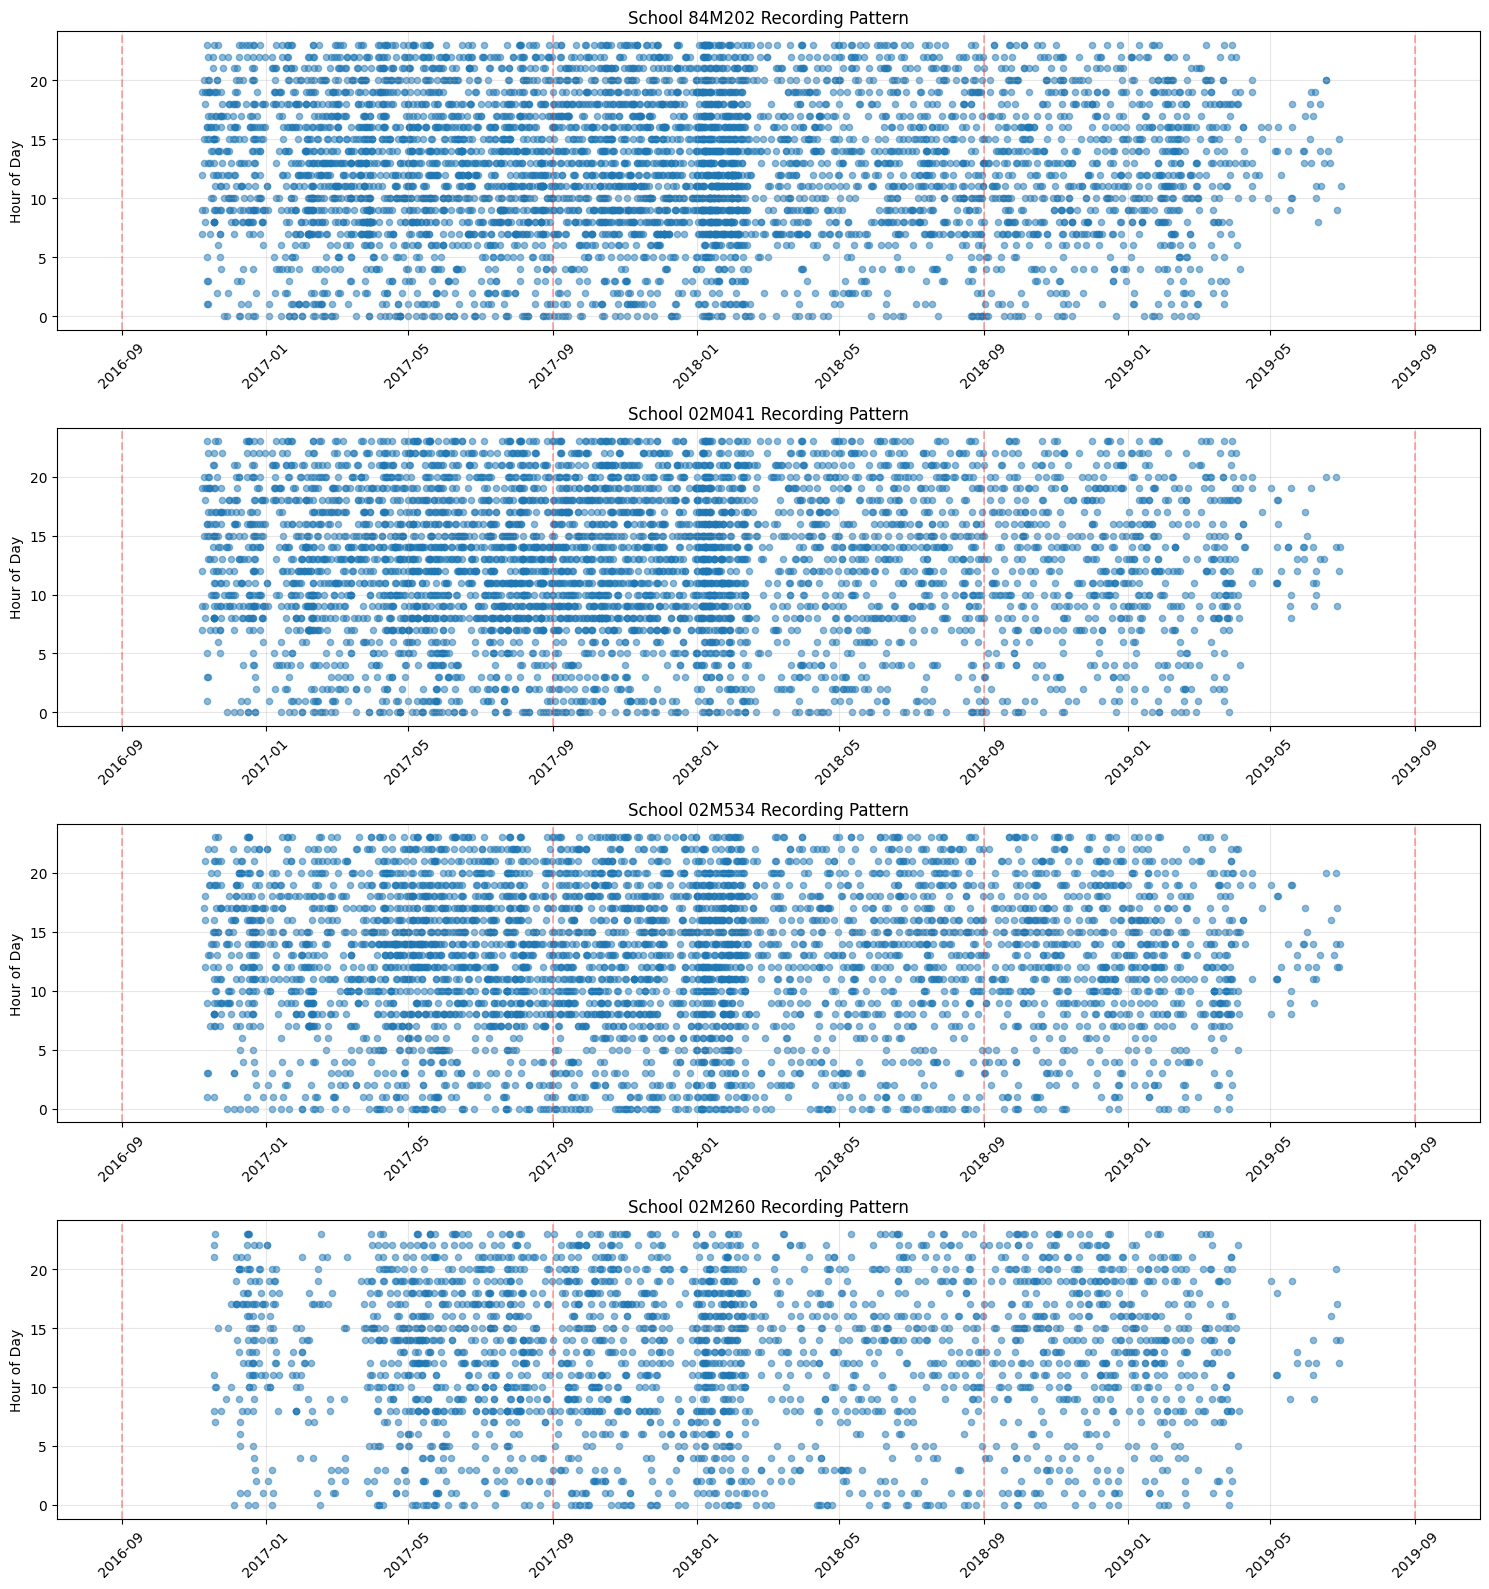


School 84M202 Summary:
Total recordings: 5267

Recordings by academic year:
academic_year
2016-2017    1988
2017-2018    2457
2018-2019     822
dtype: int64

Recordings by month (averaged across years):
date
1     199.75
2     136.25
3     120.75
4      87.00
5      93.00
6      87.25
7      89.50
8      93.00
9      81.75
10     91.25
11    118.75
12    118.50
dtype: float64

School 02M041 Summary:
Total recordings: 4869

Recordings by academic year:
academic_year
2016-2017    1984
2017-2018    2206
2018-2019     679
dtype: int64

Recordings by month (averaged across years):
date
1     163.00
2      96.25
3      92.50
4      89.75
5     110.50
6      81.75
7      94.75
8      95.50
9      90.00
10     90.25
11    101.50
12    111.50
dtype: float64

School 02M534 Summary:
Total recordings: 4481

Recordings by academic year:
academic_year
2016-2017    1668
2017-2018    2006
2018-2019     807
dtype: int64

Recordings by month (averaged across years):
date
1     158.00
2      88.00
3    

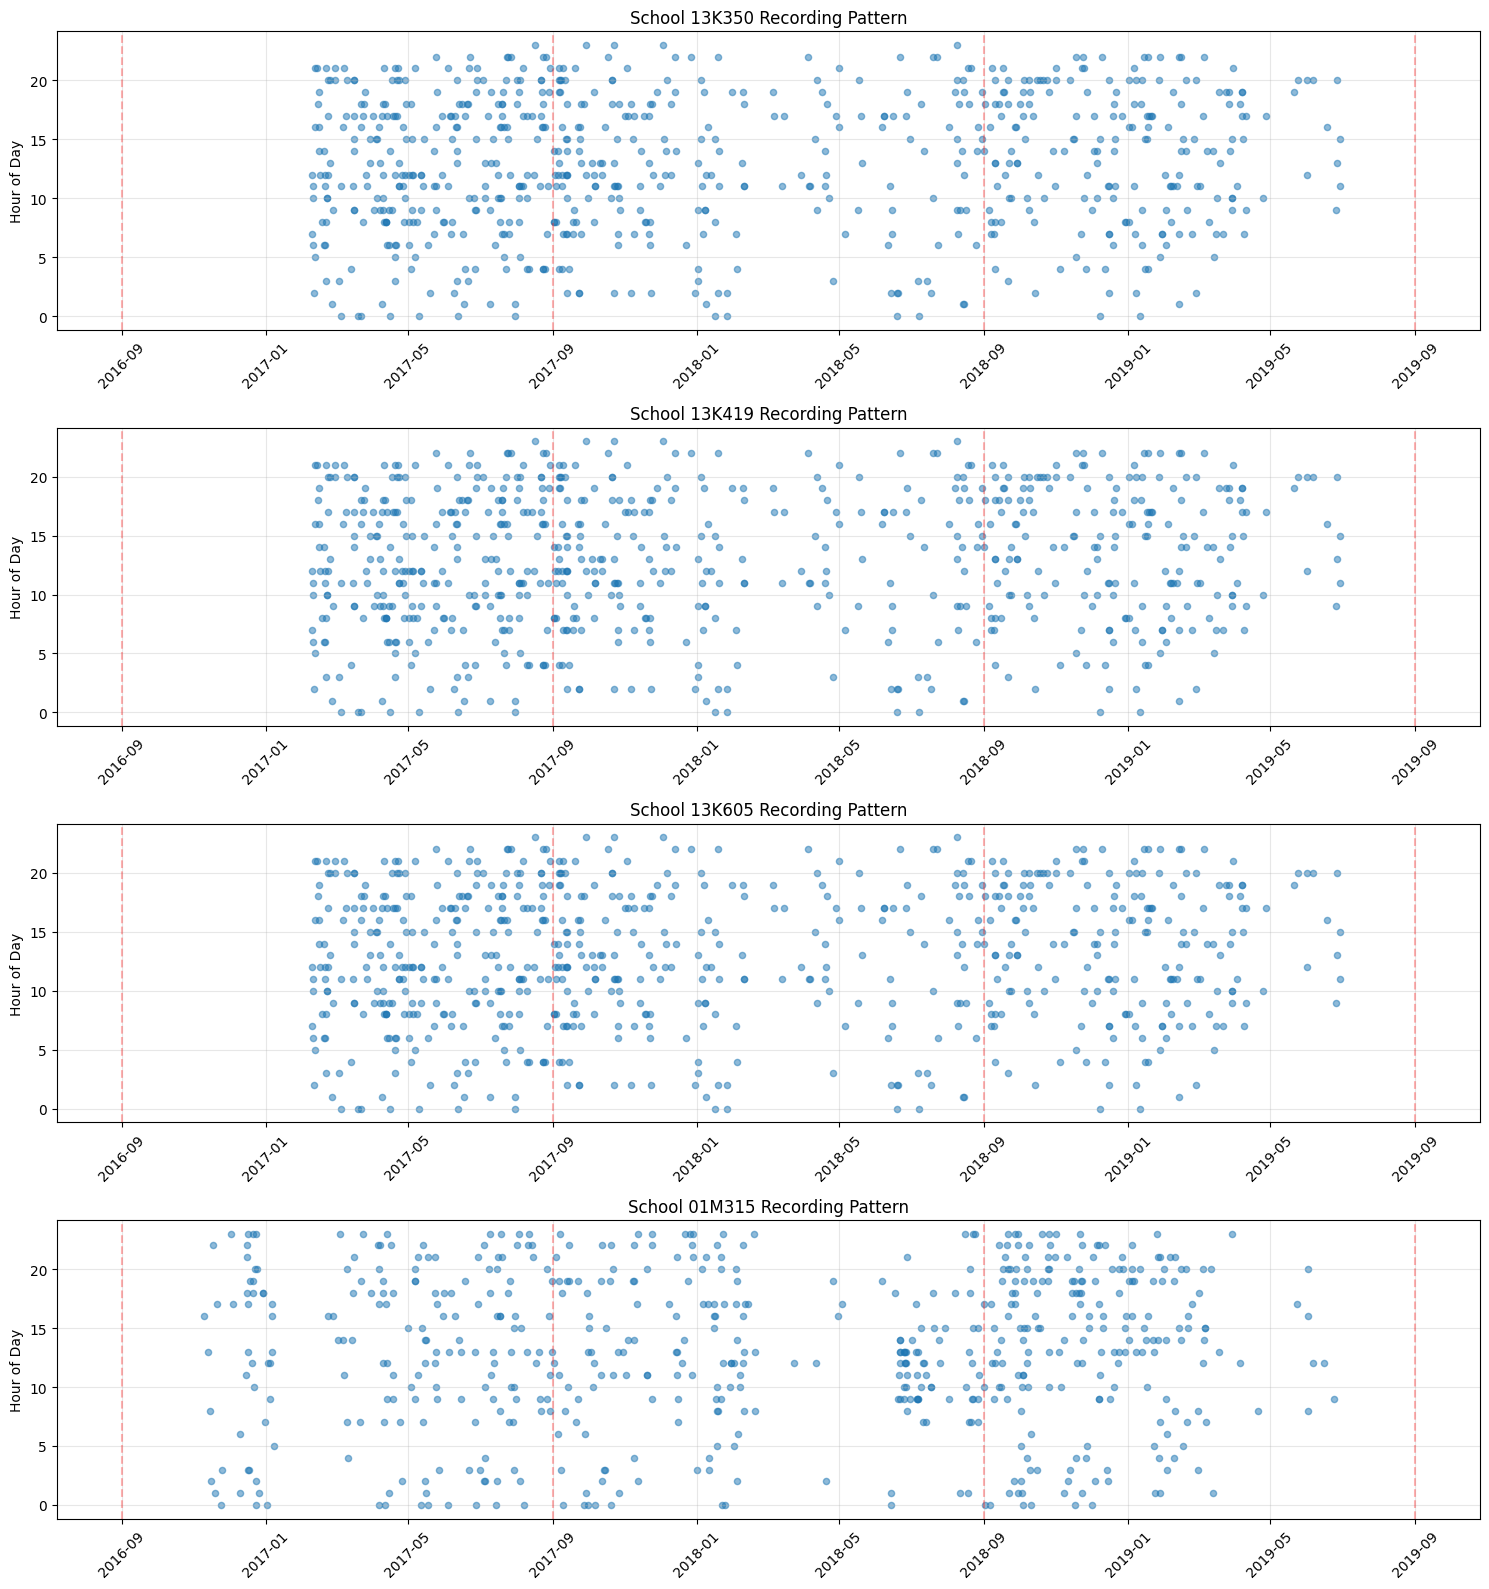


School 13K350 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     20.67
7     16.67
8     21.67
9     28.33
10    17.00
11    14.00
12    13.67
dtype: float64

School 13K419 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     20.67
7     16.67
8     21.67
9     28.33
10    17.00
11    14.00
12    13.67
dtype: float64

School 13K605 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     2

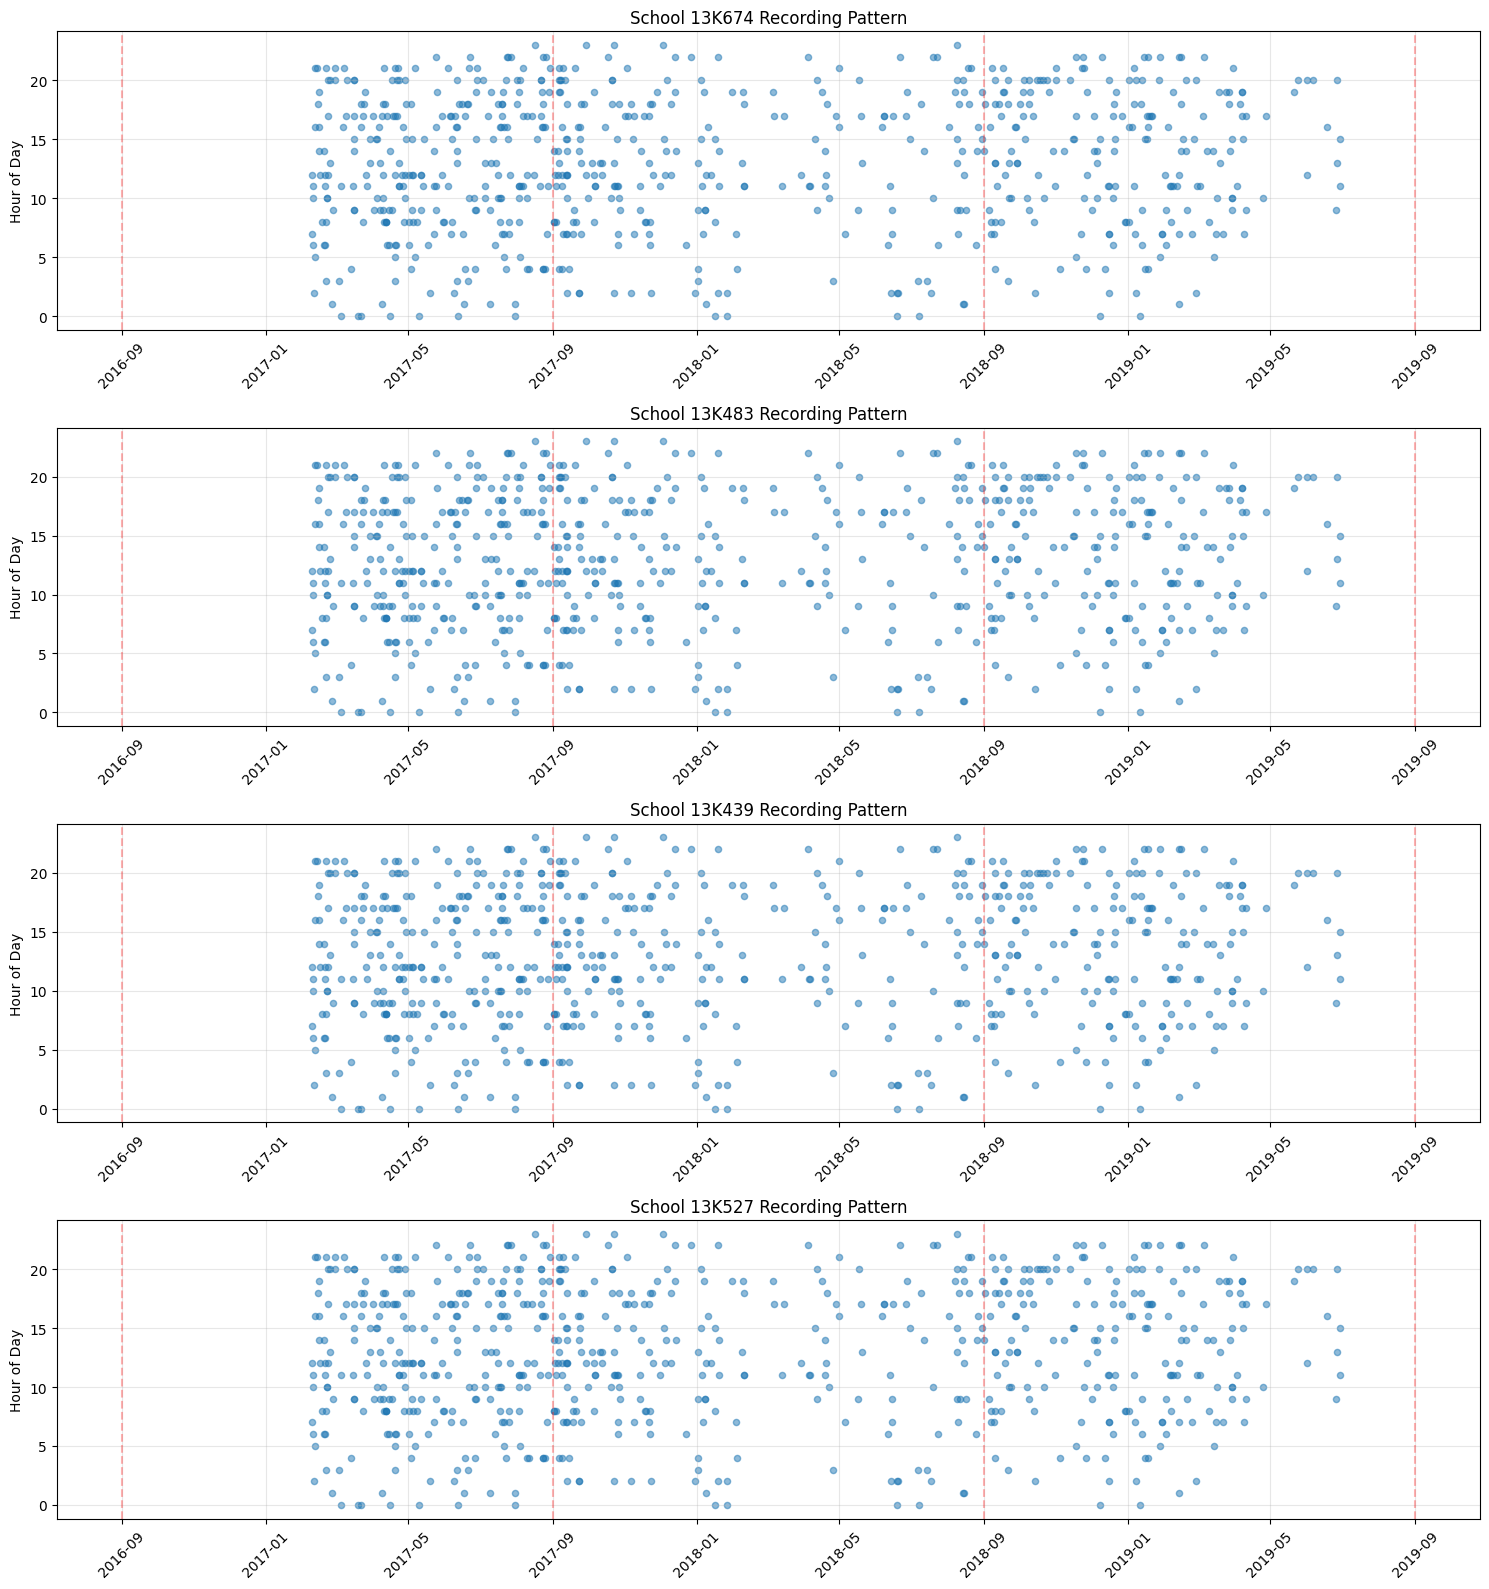


School 13K674 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     20.67
7     16.67
8     21.67
9     28.33
10    17.00
11    14.00
12    13.67
dtype: float64

School 13K483 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     20.67
7     16.67
8     21.67
9     28.33
10    17.00
11    14.00
12    13.67
dtype: float64

School 13K439 Summary:
Total recordings: 692

Recordings by academic year:
academic_year
2016-2017    264
2017-2018    228
2018-2019    200
dtype: int64

Recordings by month (averaged across years):
date
1     18.67
2     22.00
3     18.67
4     25.67
5     13.67
6     2

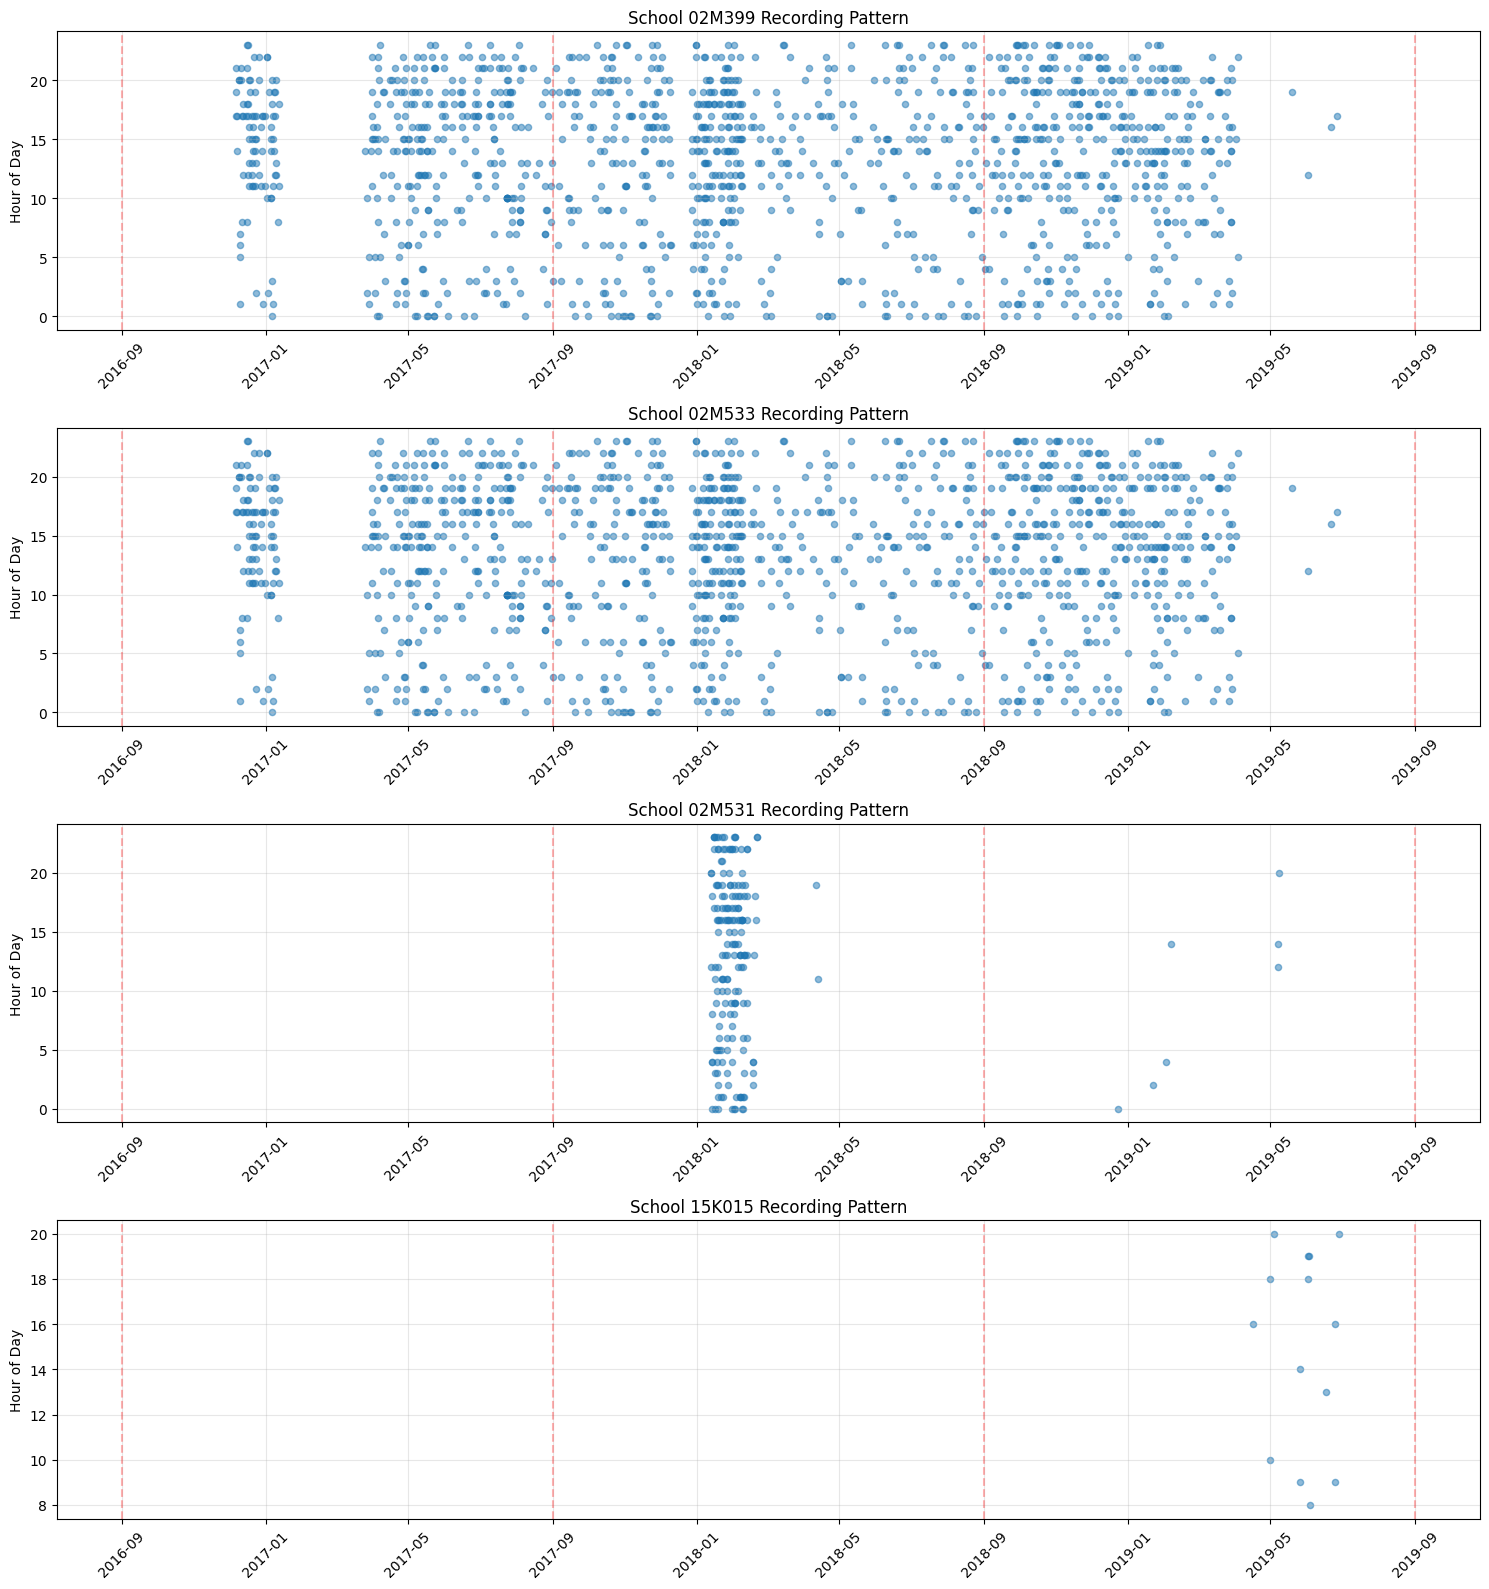


School 02M399 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6     22.25
7     24.25
8     19.00
9     20.75
10    31.50
11    31.00
12    40.50
dtype: float64

School 02M533 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6     22.25
7     24.25
8     19.00
9     20.75
10    31.50
11    31.00
12    40.50
dtype: float64

School 02M531 Summary:
Total recordings: 184

Recordings by academic year:
academic_year
2017-2018    177
2018-2019      7
dtype: int64

Recordings by month (averaged across years):
date
1     50.5
2     38.5
4      1.0
5      1.5
12     0.5
dtype: float64

School 15K0

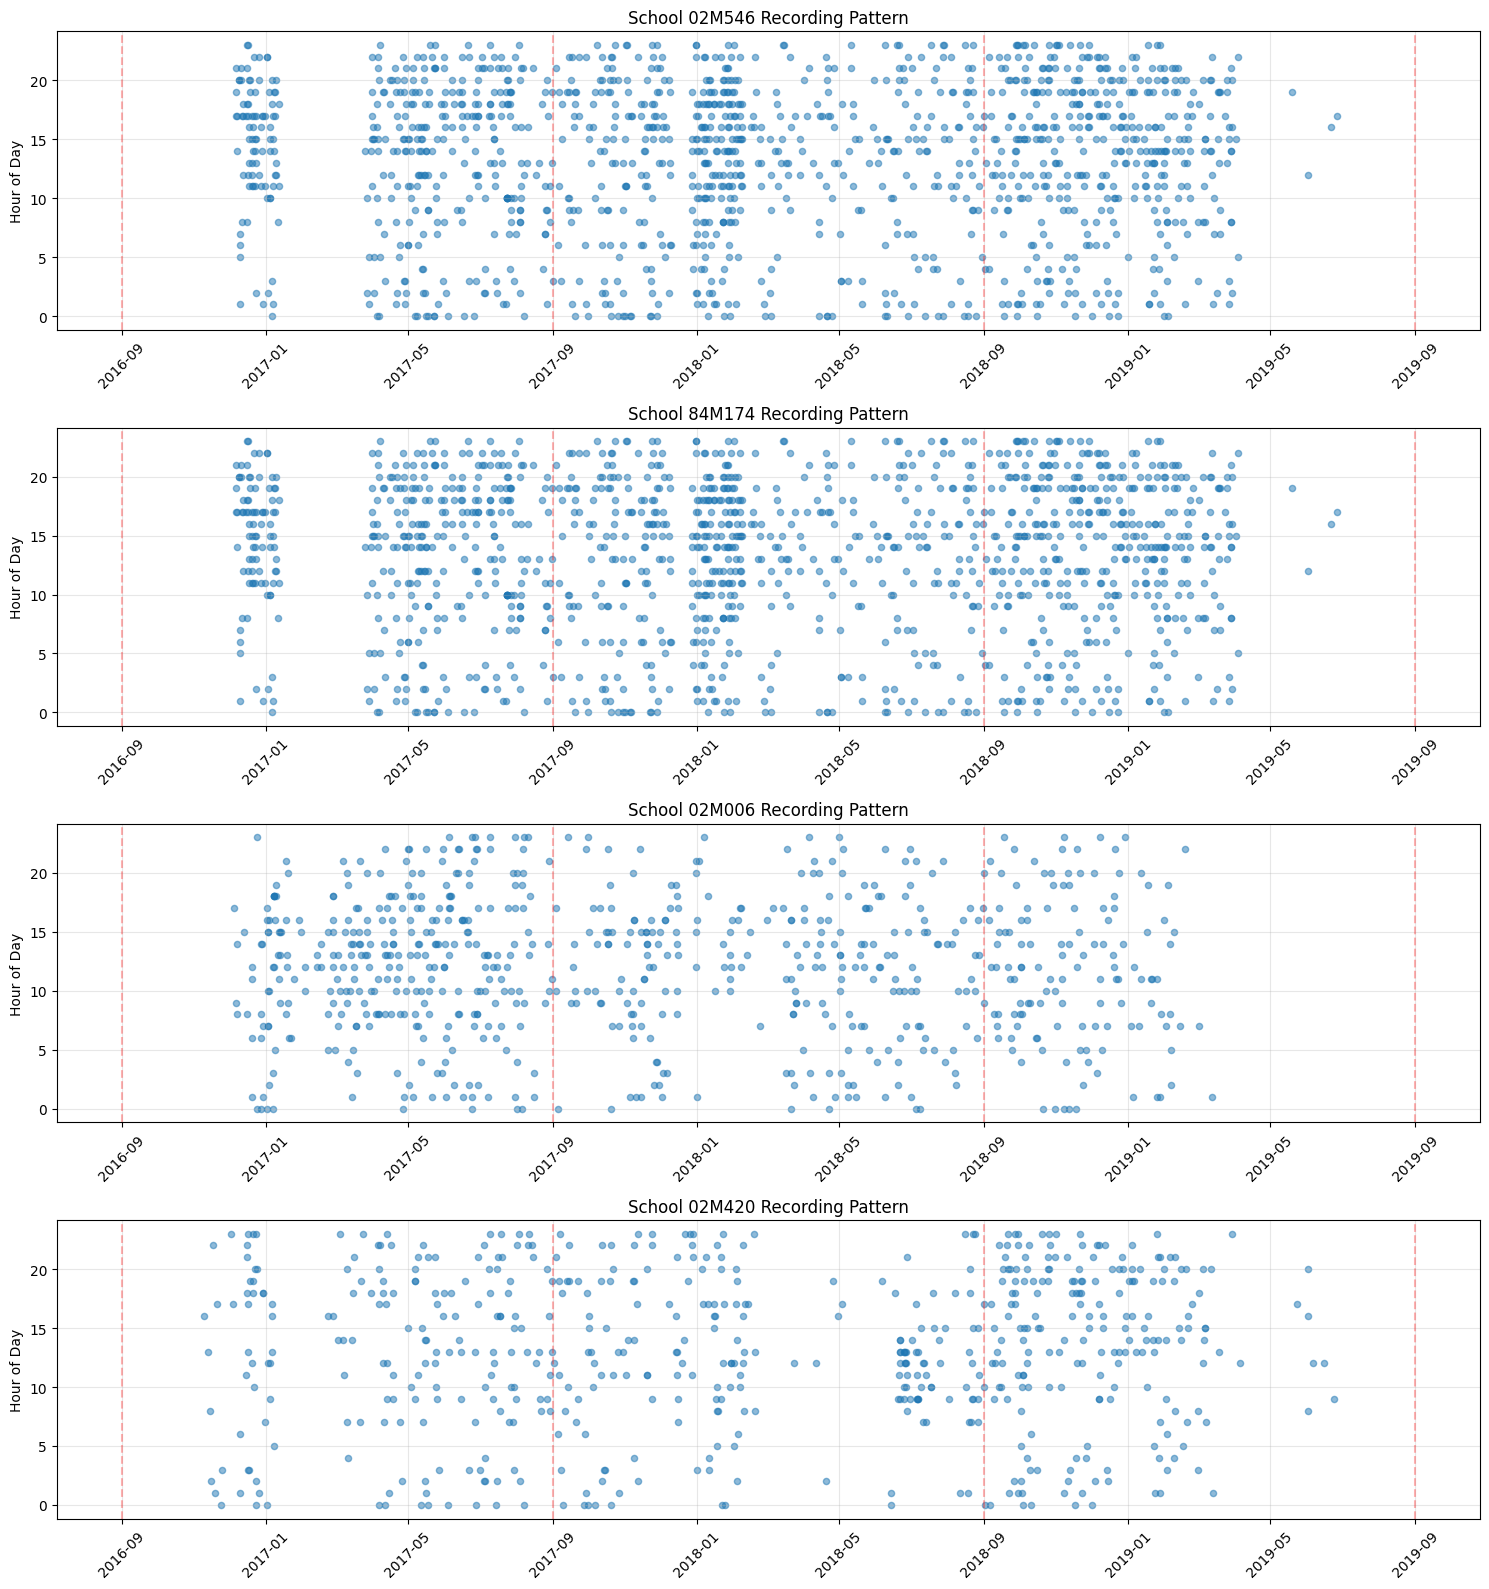


School 02M546 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6     22.25
7     24.25
8     19.00
9     20.75
10    31.50
11    31.00
12    40.50
dtype: float64

School 84M174 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6     22.25
7     24.25
8     19.00
9     20.75
10    31.50
11    31.00
12    40.50
dtype: float64

School 02M006 Summary:
Total recordings: 704

Recordings by academic year:
academic_year
2016-2017    318
2017-2018    256
2018-2019    130
dtype: int64

Recordings by month (averaged across years):
date
1     18.00
2      8.25
3     17.25
4     16.00
5     20.25
6    

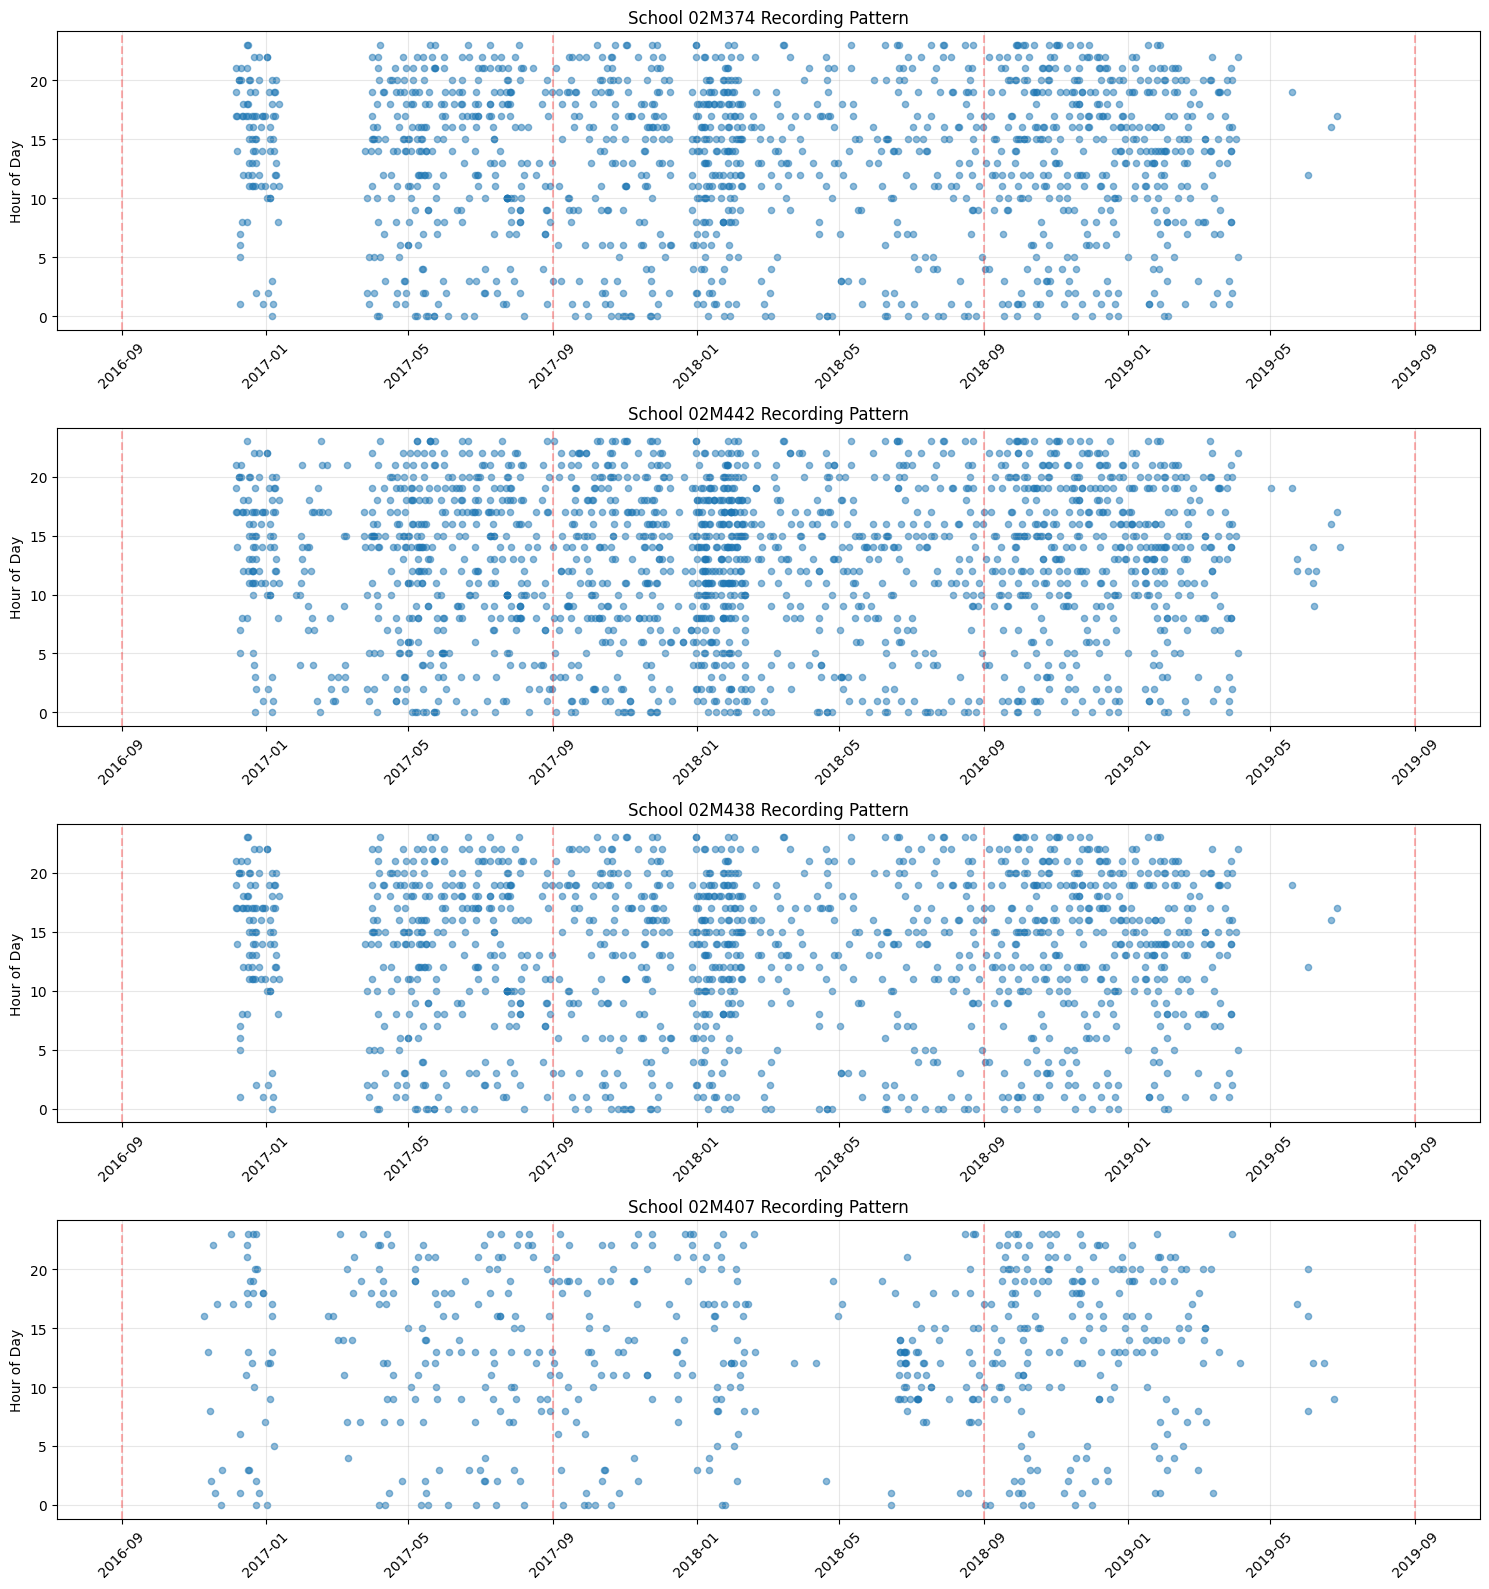


School 02M374 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6     22.25
7     24.25
8     19.00
9     20.75
10    31.50
11    31.00
12    40.50
dtype: float64

School 02M442 Summary:
Total recordings: 1834

Recordings by academic year:
academic_year
2016-2017    504
2017-2018    847
2018-2019    483
dtype: int64

Recordings by month (averaged across years):
date
1     80.50
2     39.75
3     27.50
4     28.50
5     39.75
6     30.50
7     27.75
8     24.75
9     31.25
10    41.50
11    40.00
12    46.75
dtype: float64

School 02M438 Summary:
Total recordings: 1333

Recordings by academic year:
academic_year
2016-2017    382
2017-2018    536
2018-2019    415
dtype: int64

Recordings by month (averaged across years):
date
1     55.75
2     21.75
3     19.50
4     22.75
5     24.25
6   

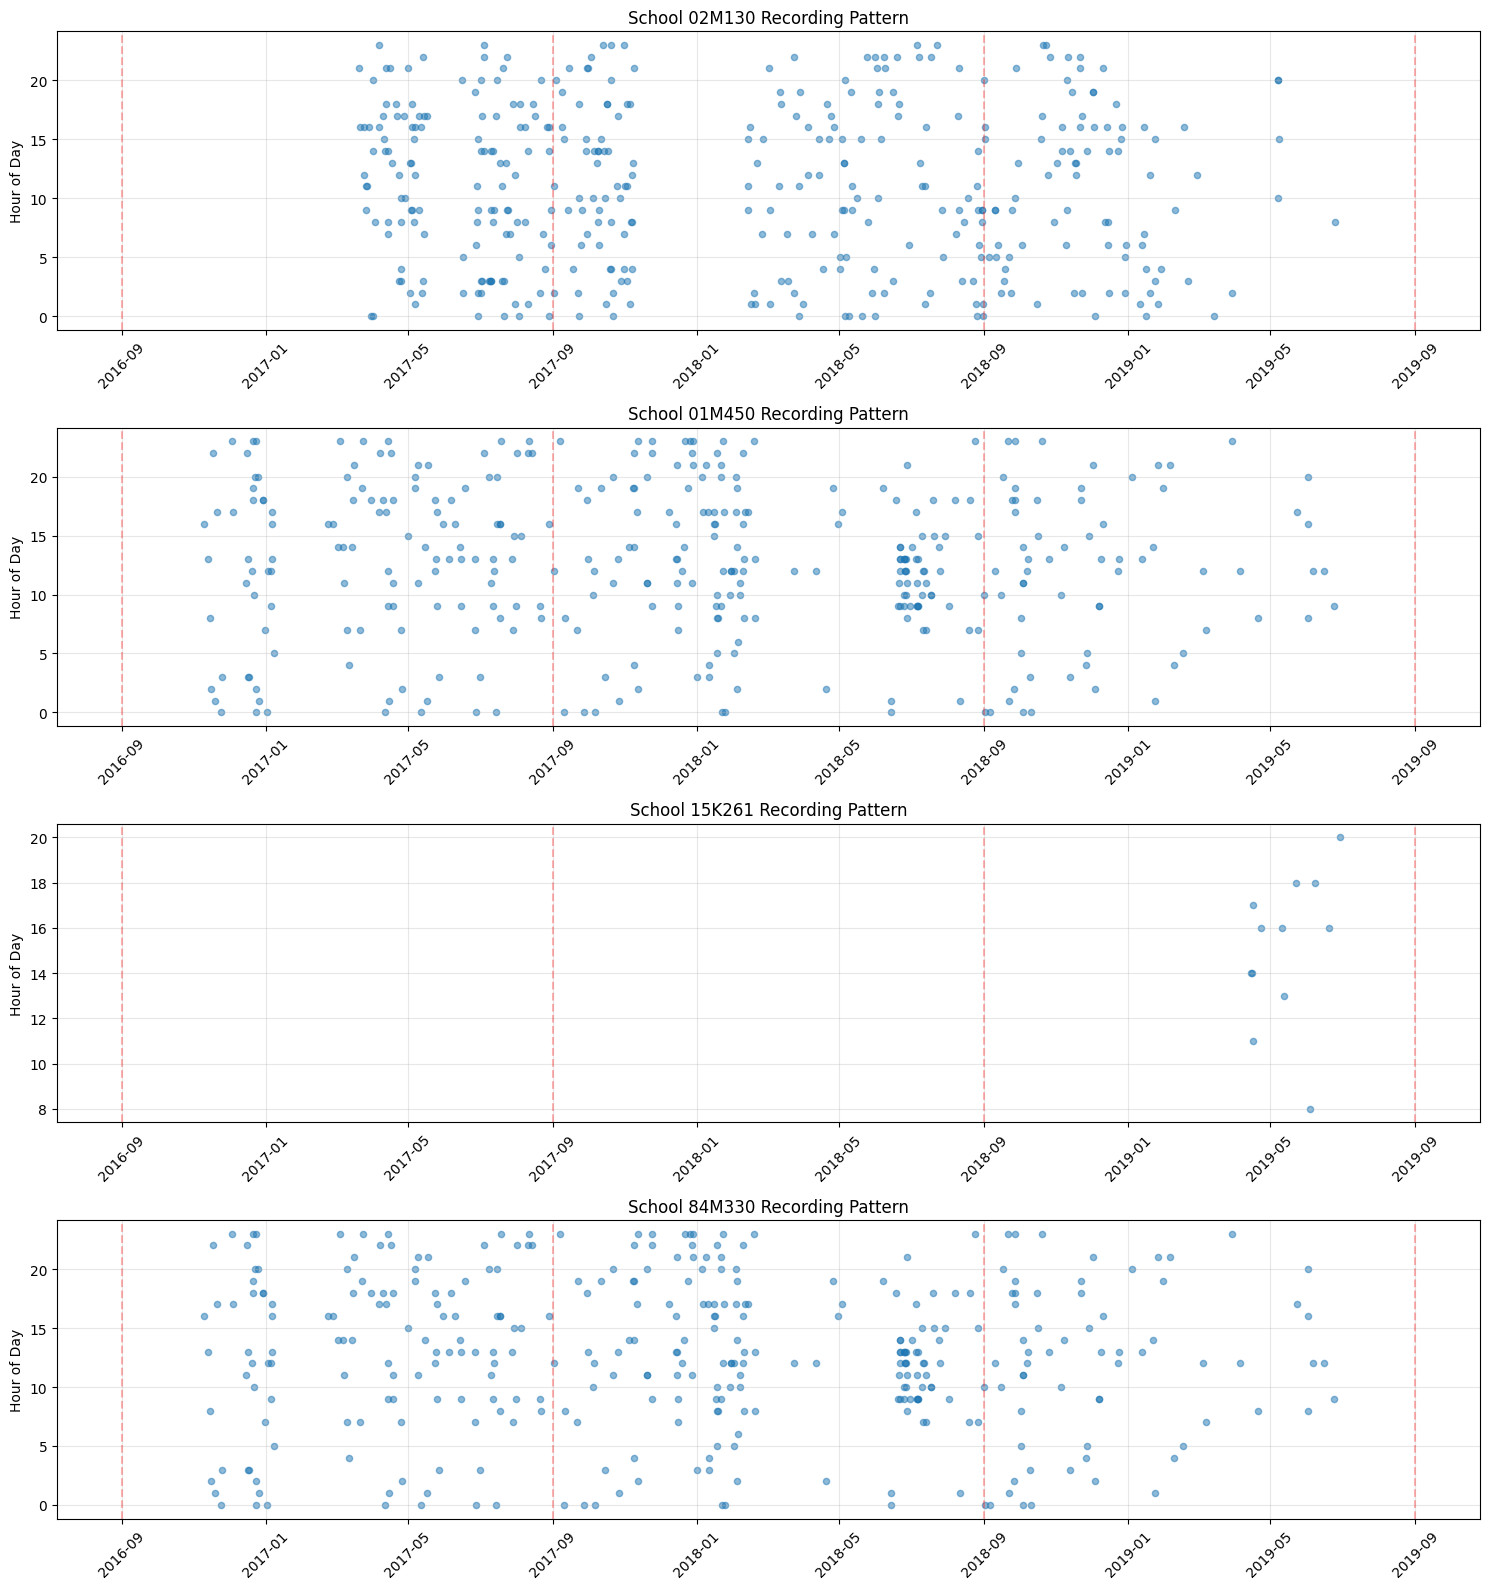


School 02M130 Summary:
Total recordings: 379

Recordings by academic year:
academic_year
2016-2017    124
2017-2018    169
2018-2019     86
dtype: int64

Recordings by month (averaged across years):
date
1      4.00
2      4.67
3      8.67
4     12.67
5     15.67
6      9.33
7     15.67
8     13.67
9     12.00
10    13.67
11    10.33
12     6.00
dtype: float64

School 01M450 Summary:
Total recordings: 347

Recordings by academic year:
academic_year
2016-2017    121
2017-2018    161
2018-2019     65
dtype: int64

Recordings by month (averaged across years):
date
1     10.50
2      6.25
3      4.50
4      5.25
5      4.50
6     10.50
7     10.00
8      4.25
9      5.50
10     6.00
11     8.00
12    11.50
dtype: float64

School 15K261 Summary:
Total recordings: 12

Recordings by academic year:
academic_year
2018-2019    12
dtype: int64

Recordings by month (averaged across years):
date
4    5.0
5    3.0
6    4.0
dtype: float64

School 84M330 Summary:
Total recordings: 347

Recordings by 

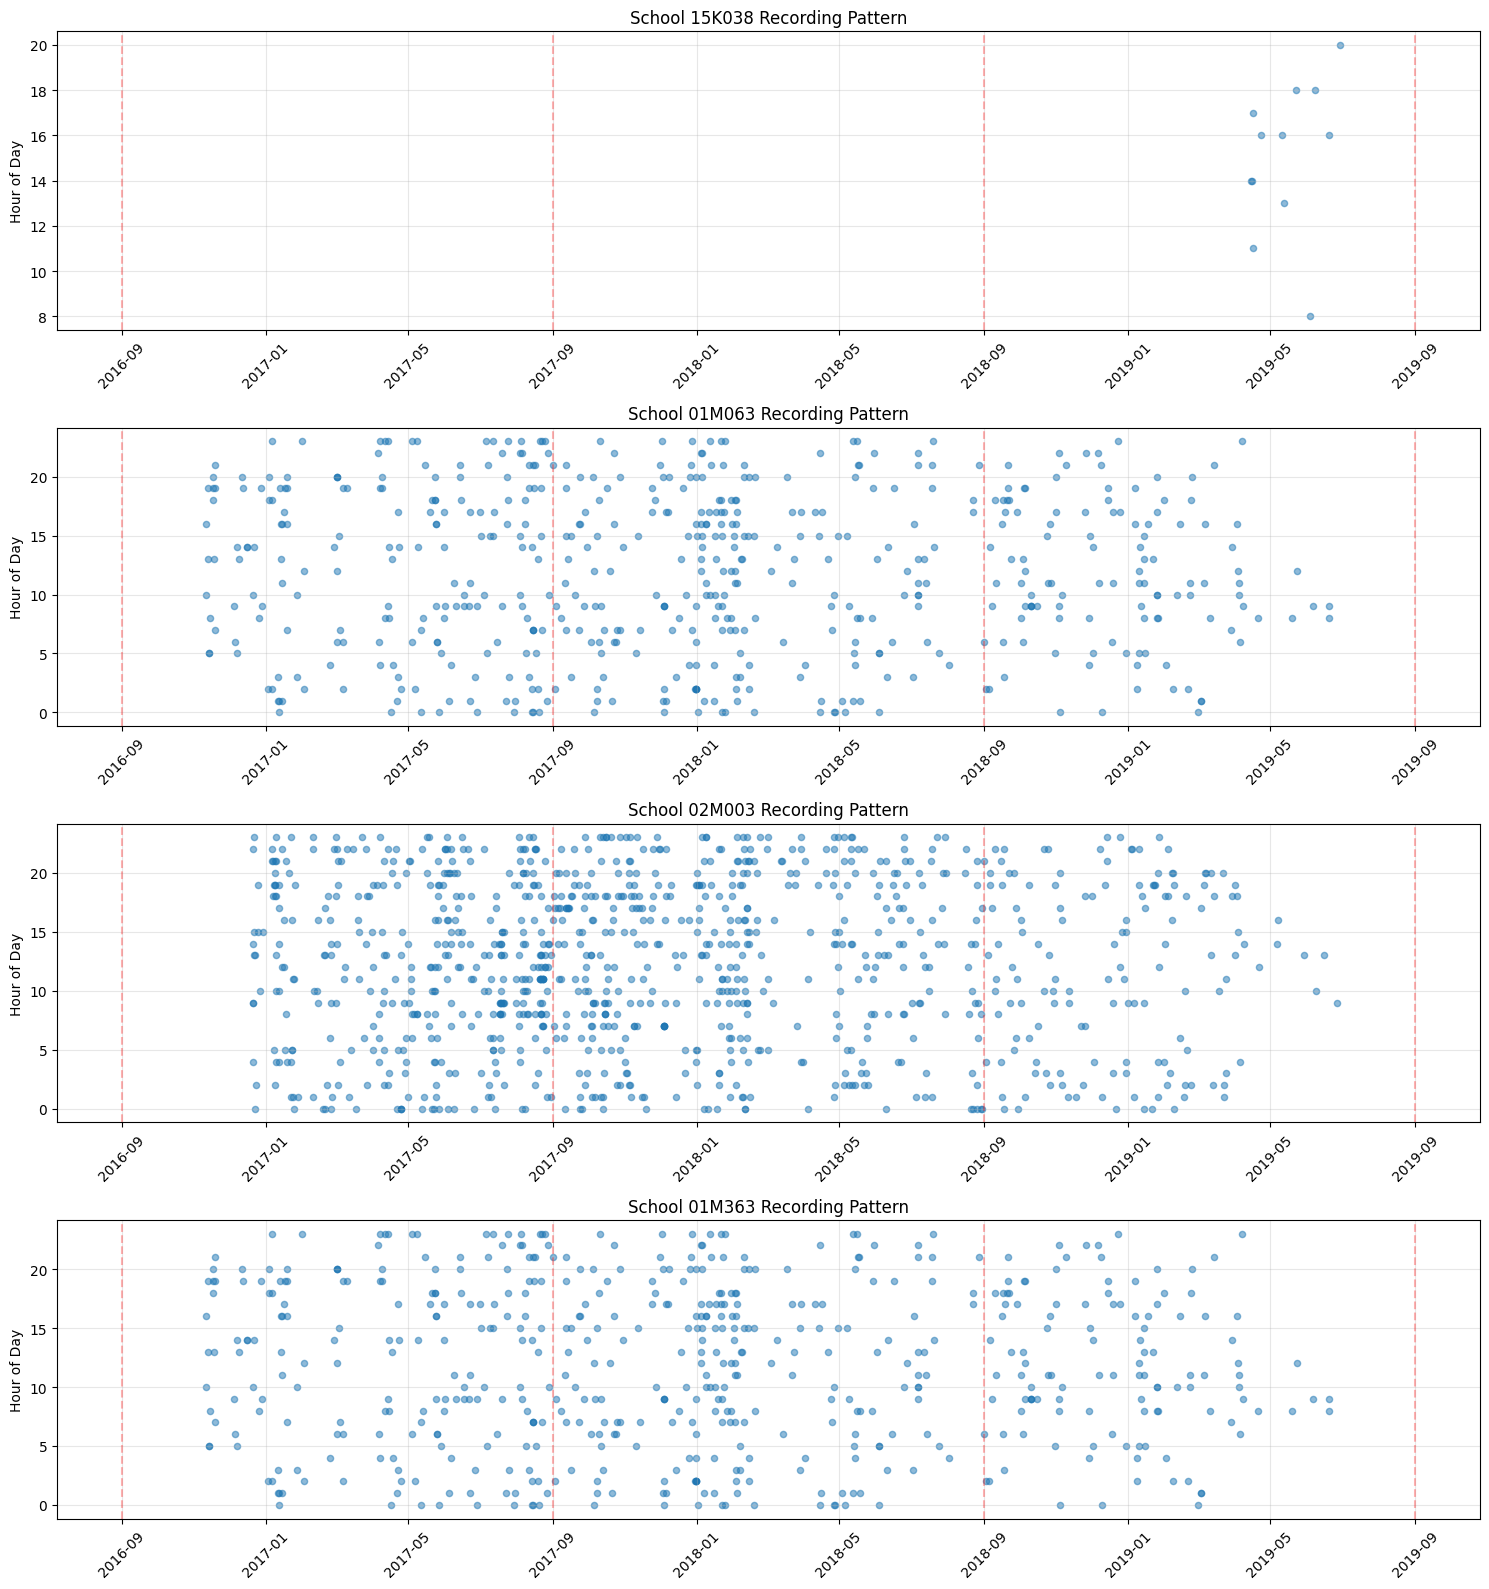


School 15K038 Summary:
Total recordings: 12

Recordings by academic year:
academic_year
2018-2019    12
dtype: int64

Recordings by month (averaged across years):
date
4    5.0
5    3.0
6    4.0
dtype: float64

School 01M063 Summary:
Total recordings: 545

Recordings by academic year:
academic_year
2016-2017    188
2017-2018    240
2018-2019    117
dtype: int64

Recordings by month (averaged across years):
date
1     24.00
2     10.75
3      7.50
4     10.75
5     10.50
6      8.25
7      9.50
8     10.25
9      9.50
10    11.00
11     8.50
12    15.75
dtype: float64

School 02M003 Summary:
Total recordings: 994

Recordings by academic year:
academic_year
2016-2017    386
2017-2018    462
2018-2019    146
dtype: int64

Recordings by month (averaged across years):
date
1     31.25
2     23.50
3     15.25
4     17.25
5     22.75
6     20.75
7     18.75
8     27.75
9     19.75
10    20.75
11    16.00
12    14.75
dtype: float64

School 01M363 Summary:
Total recordings: 545

Recordings by 

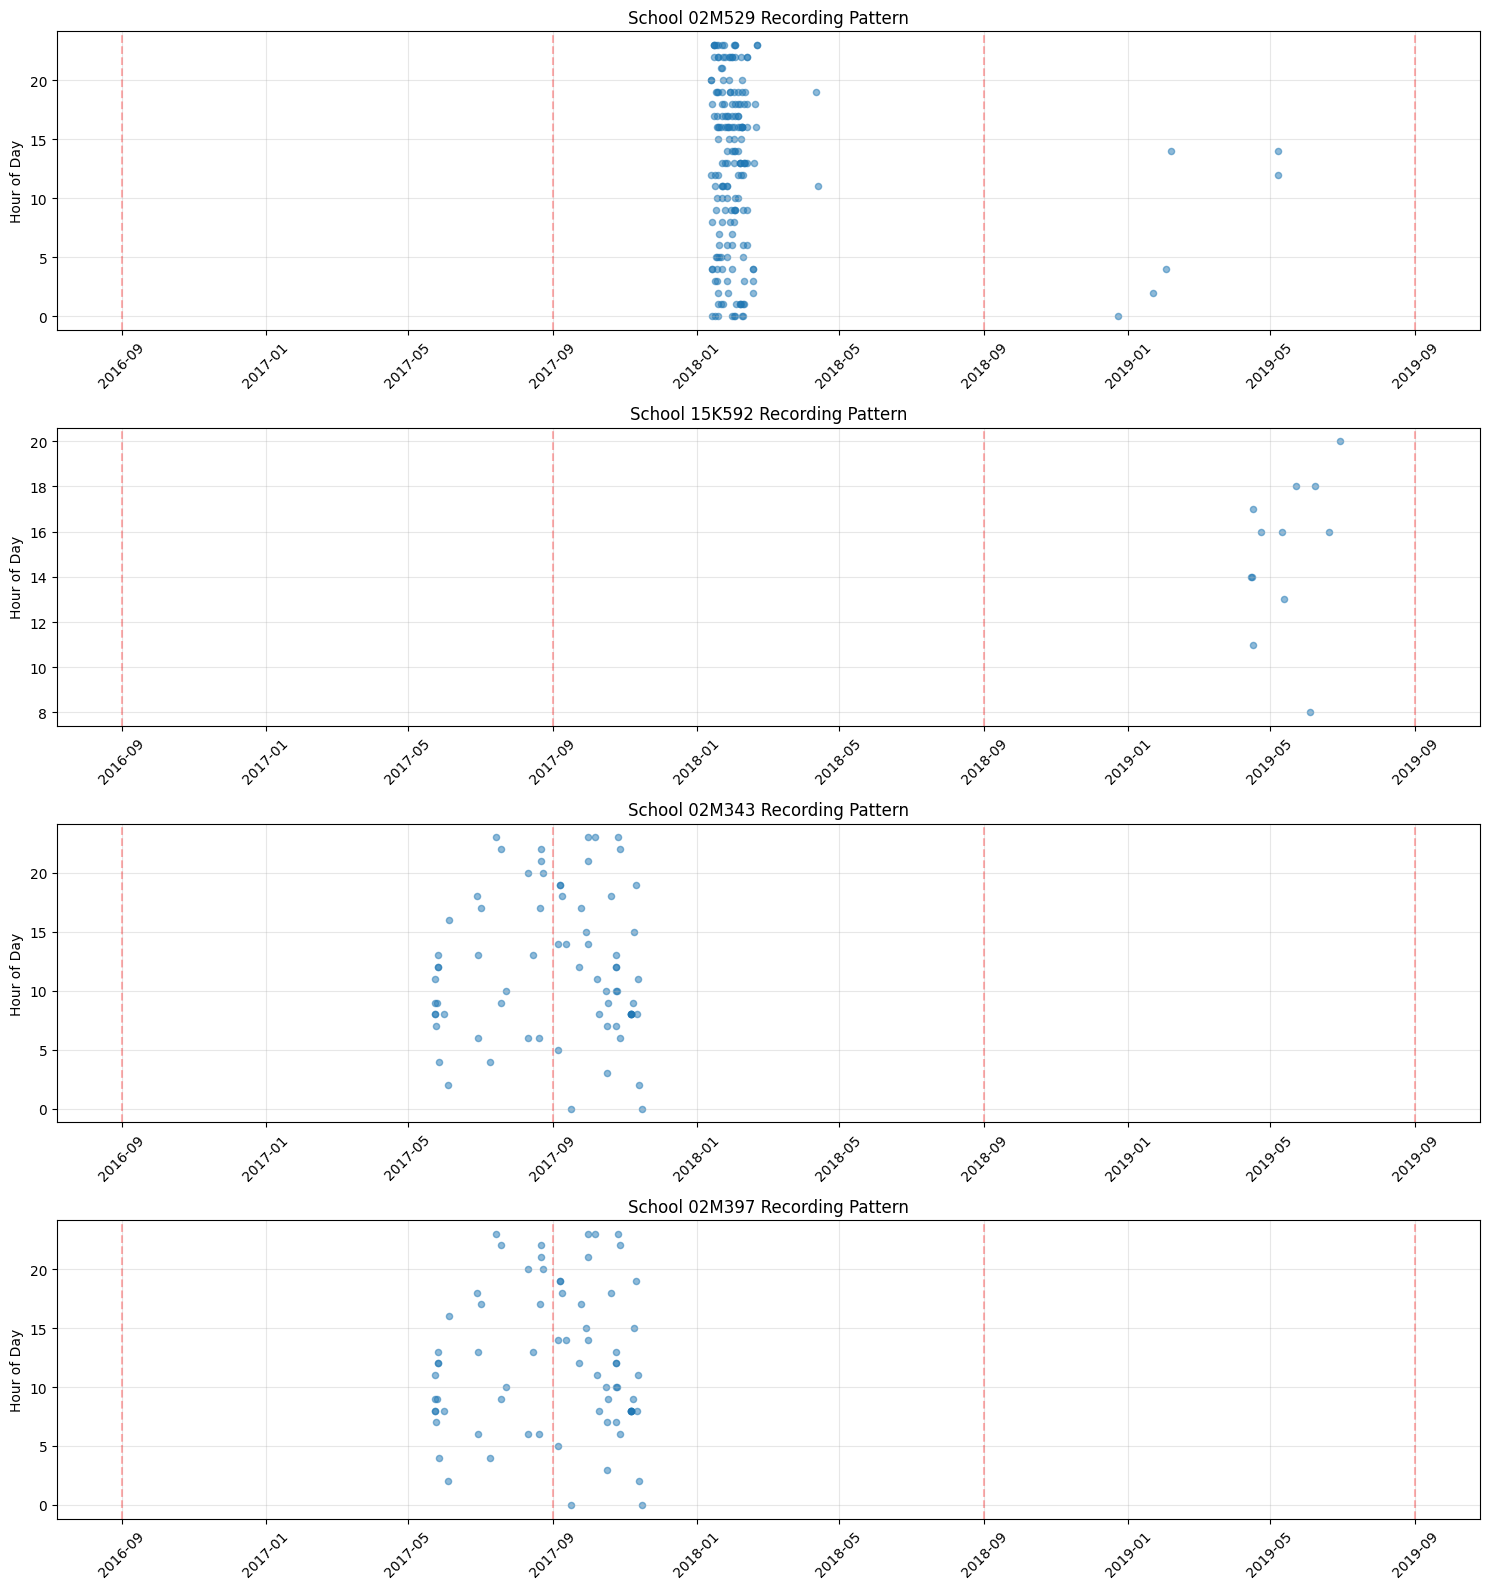


School 02M529 Summary:
Total recordings: 183

Recordings by academic year:
academic_year
2017-2018    177
2018-2019      6
dtype: int64

Recordings by month (averaged across years):
date
1     50.5
2     38.5
4      1.0
5      1.0
12     0.5
dtype: float64

School 15K592 Summary:
Total recordings: 12

Recordings by academic year:
academic_year
2018-2019    12
dtype: int64

Recordings by month (averaged across years):
date
4    5.0
5    3.0
6    4.0
dtype: float64

School 02M343 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64

School 02M397 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11 

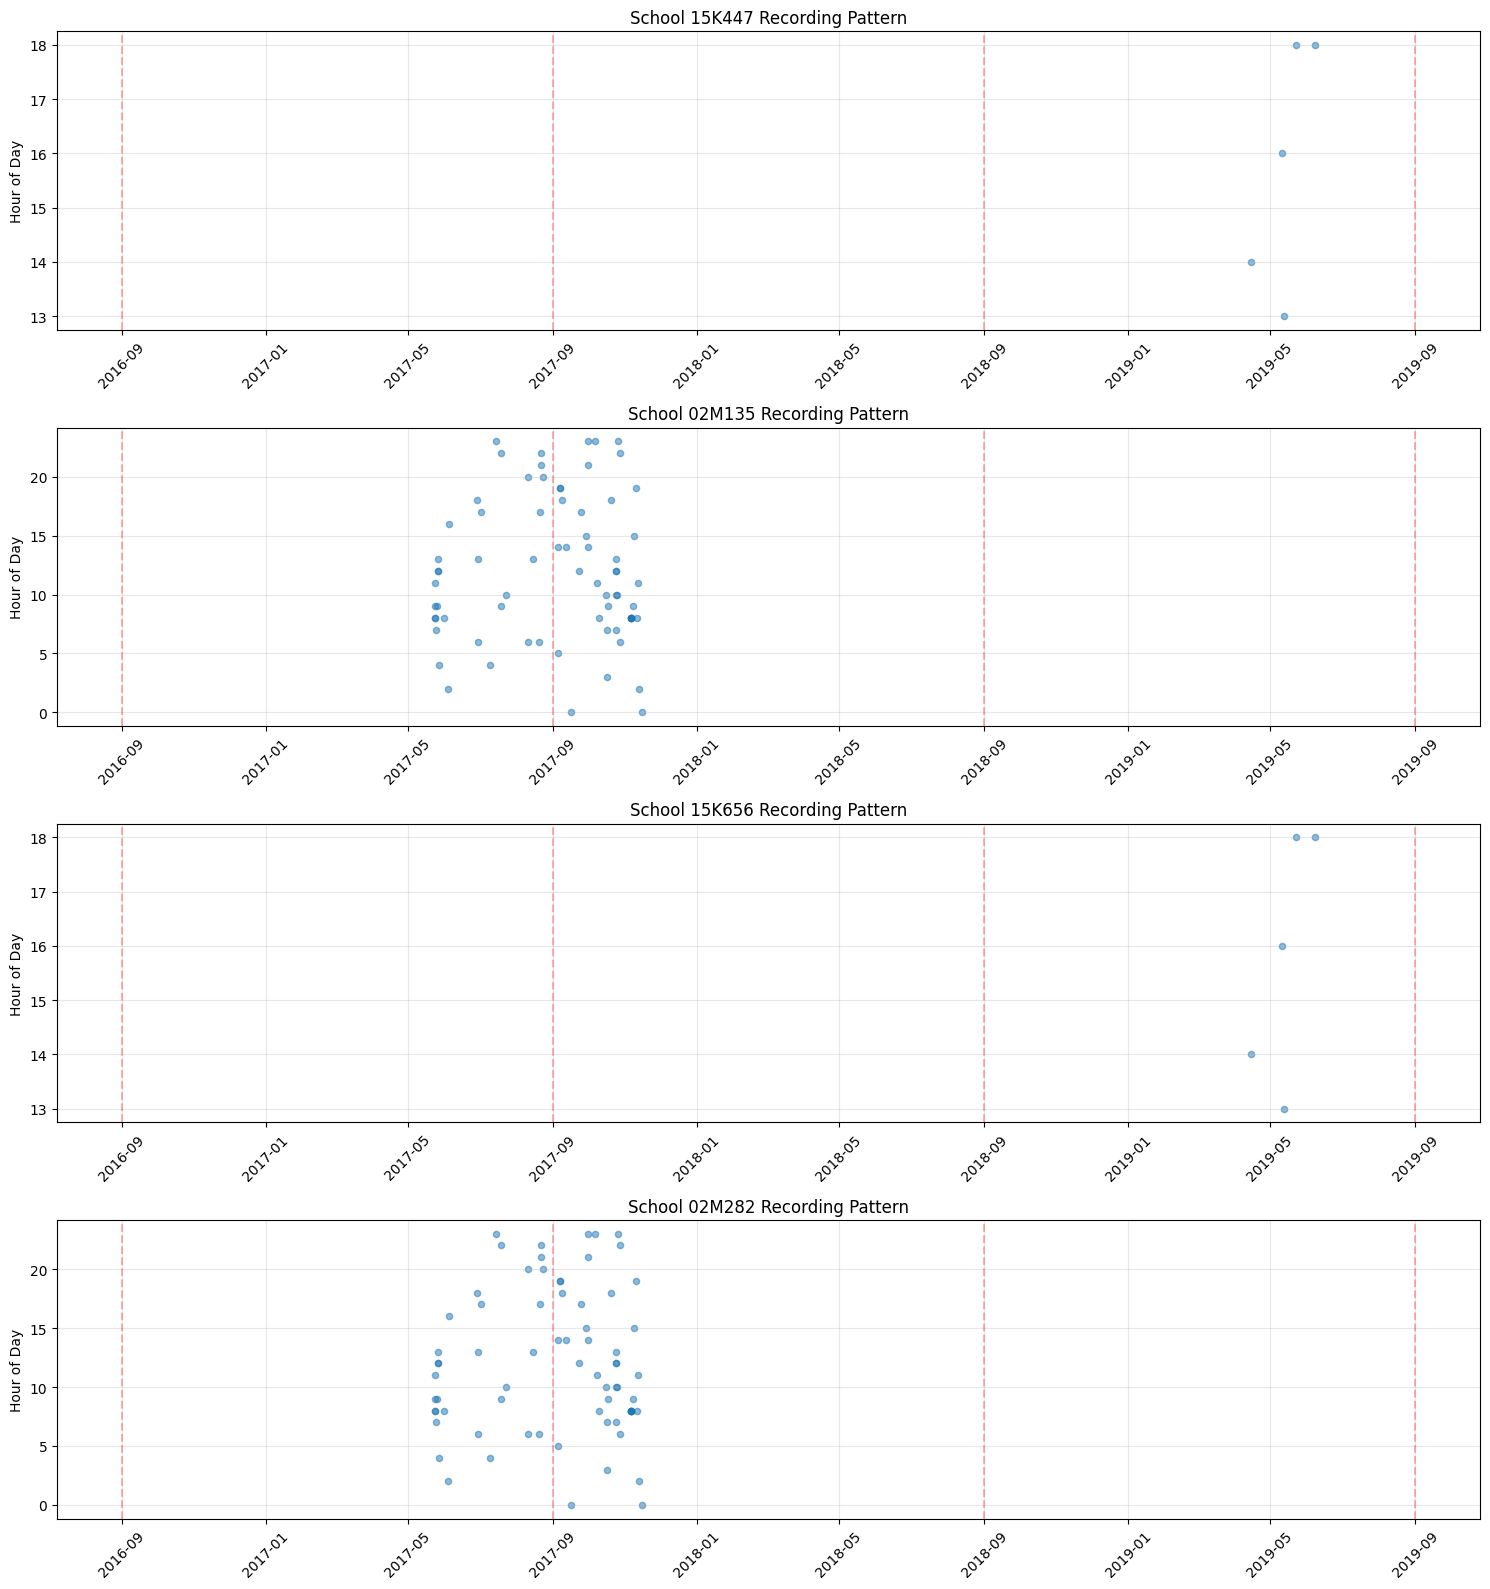


School 15K447 Summary:
Total recordings: 5

Recordings by academic year:
academic_year
2018-2019    5
dtype: int64

Recordings by month (averaged across years):
date
4    1.0
5    3.0
6    1.0
dtype: float64

School 02M135 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64

School 15K656 Summary:
Total recordings: 5

Recordings by academic year:
academic_year
2018-2019    5
dtype: int64

Recordings by month (averaged across years):
date
4    1.0
5    3.0
6    1.0
dtype: float64

School 02M282 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64


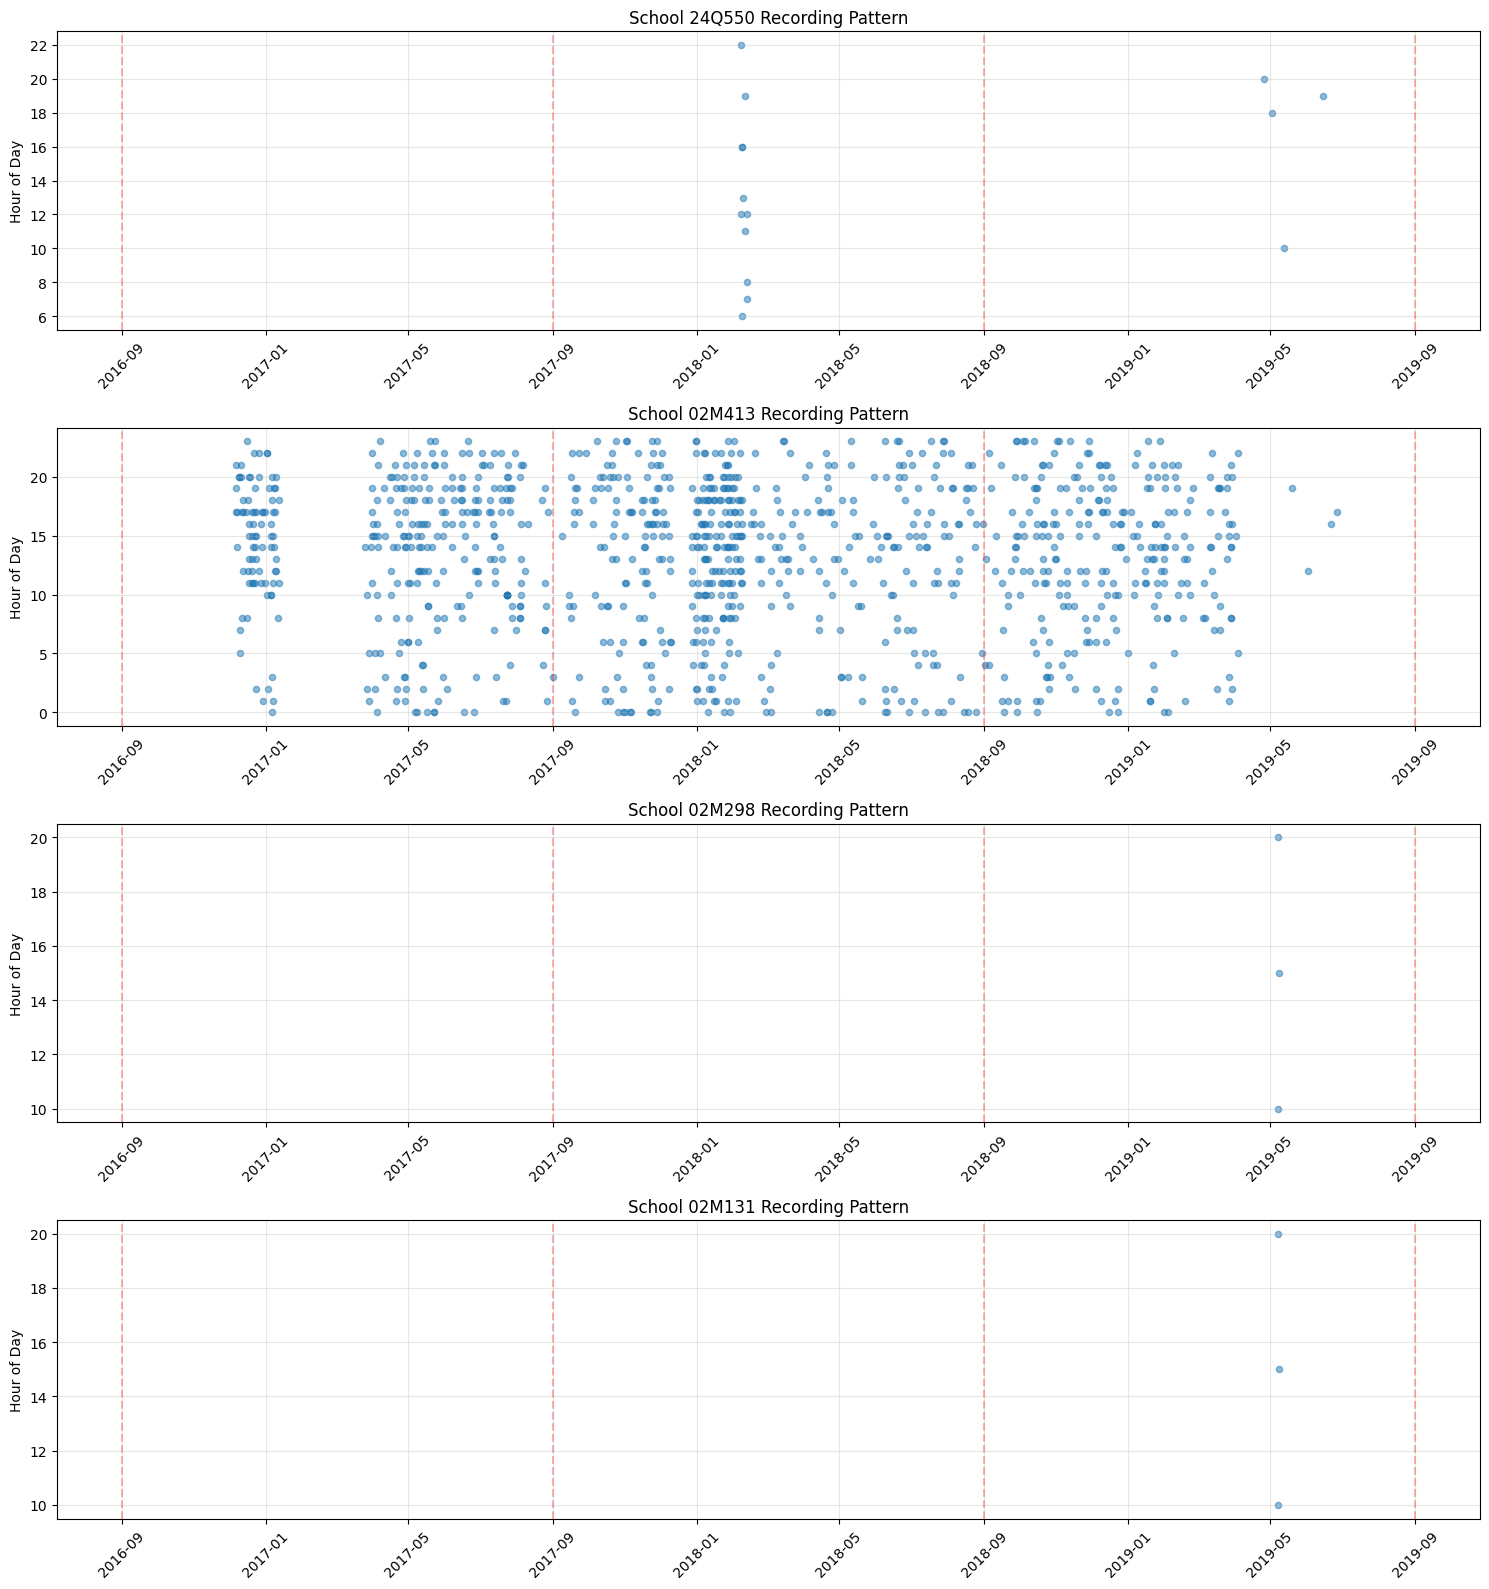


School 24Q550 Summary:
Total recordings: 15

Recordings by academic year:
academic_year
2017-2018    11
2018-2019     4
dtype: int64

Recordings by month (averaged across years):
date
2    5.5
4    0.5
5    1.0
6    0.5
dtype: float64

School 02M413 Summary:
Total recordings: 1094

Recordings by academic year:
academic_year
2016-2017    323
2017-2018    496
2018-2019    275
dtype: int64

Recordings by month (averaged across years):
date
1     50.25
2     18.00
3     17.00
4     21.25
5     21.25
6     21.00
7     20.25
8     12.50
9     11.75
10    21.75
11    25.00
12    33.50
dtype: float64

School 02M298 Summary:
Total recordings: 3

Recordings by academic year:
academic_year
2018-2019    3
dtype: int64

Recordings by month (averaged across years):
date
5    3.0
dtype: float64

School 02M131 Summary:
Total recordings: 3

Recordings by academic year:
academic_year
2018-2019    3
dtype: int64

Recordings by month (averaged across years):
date
5    3.0
dtype: float64


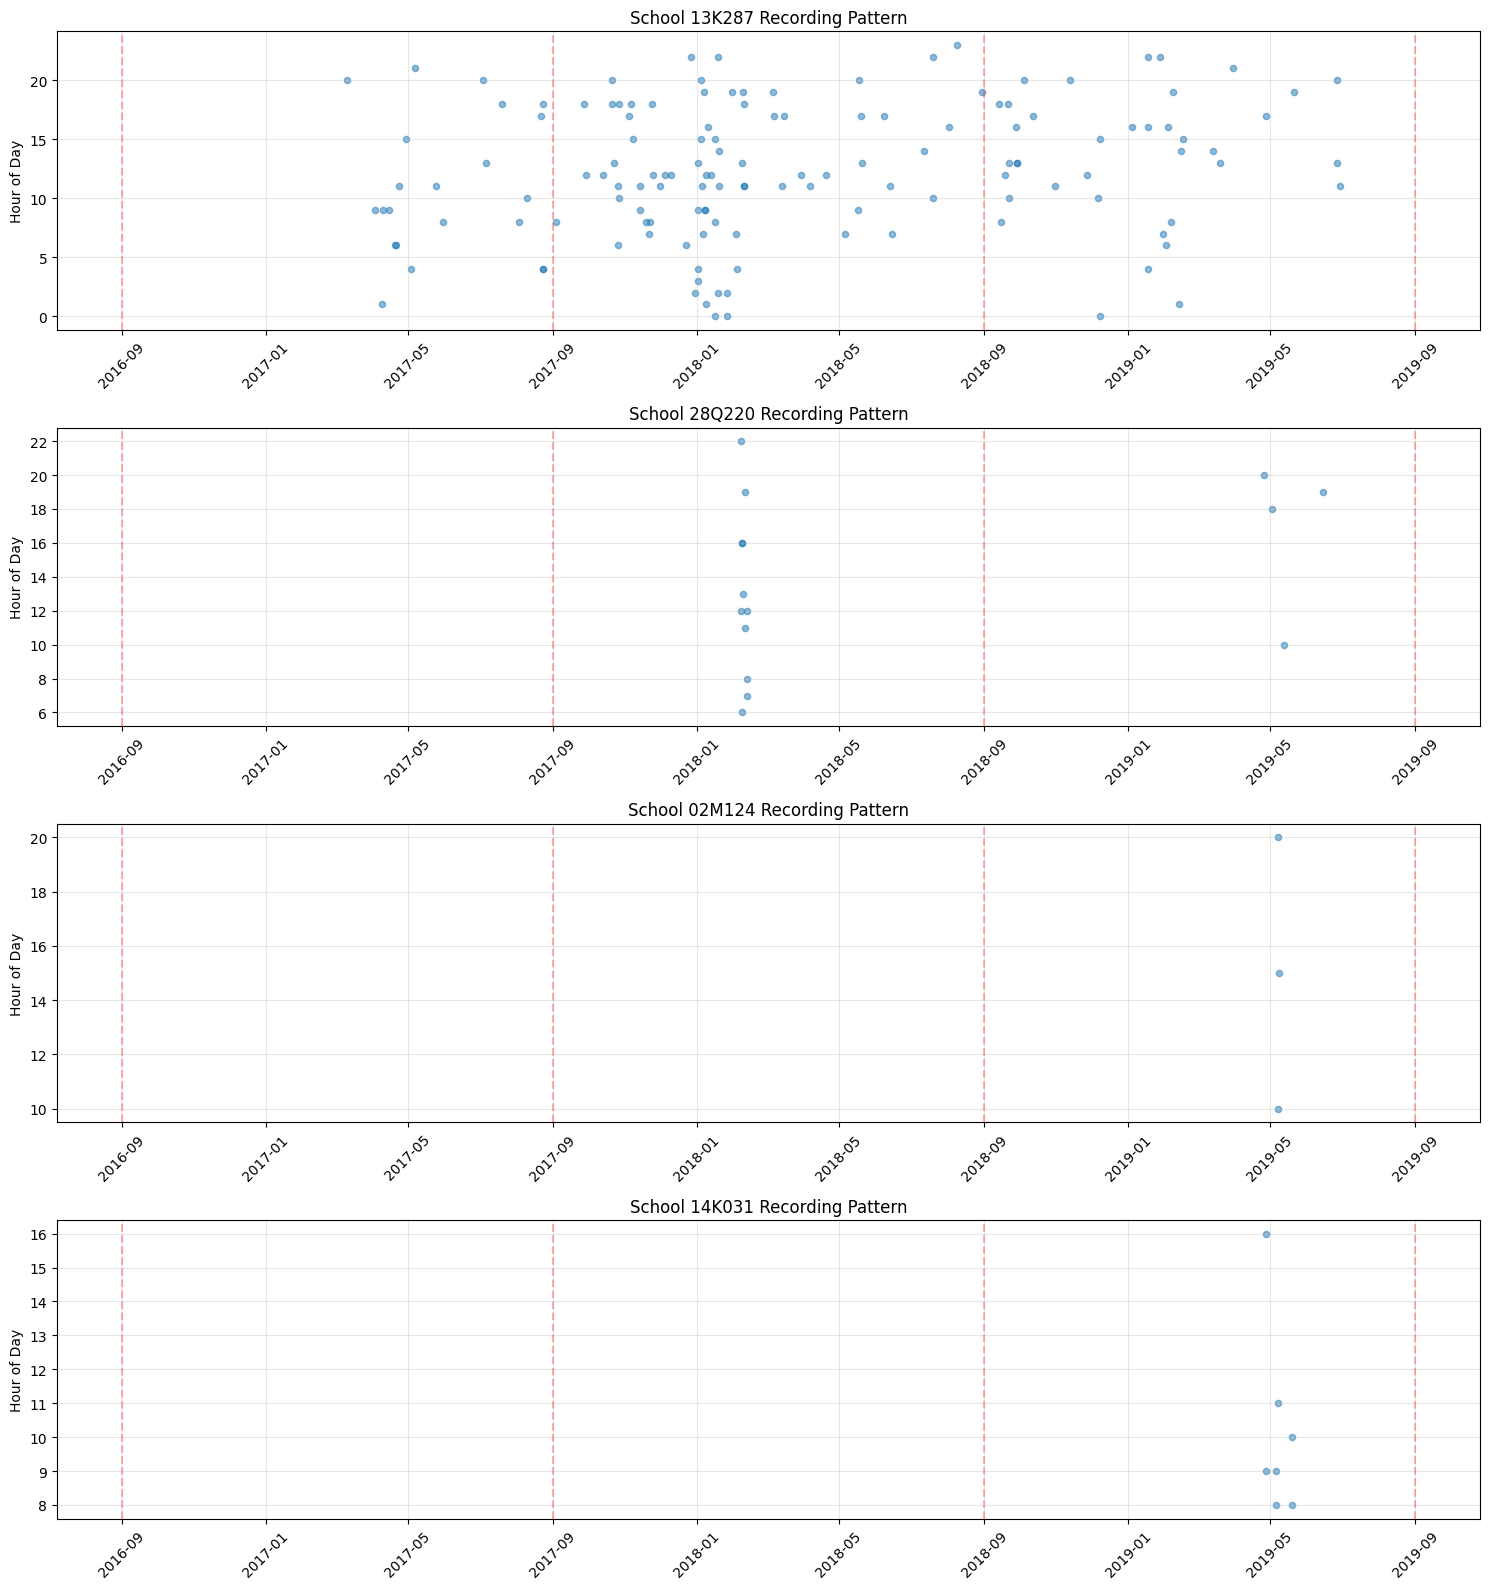


School 13K287 Summary:
Total recordings: 140

Recordings by academic year:
academic_year
2016-2017    22
2017-2018    80
2018-2019    38
dtype: int64

Recordings by month (averaged across years):
date
1     10.33
2      4.67
3      3.00
4      3.67
5      3.33
6      2.00
7      2.00
8      3.00
9      4.00
10     3.67
11     4.00
12     3.00
dtype: float64

School 28Q220 Summary:
Total recordings: 15

Recordings by academic year:
academic_year
2017-2018    11
2018-2019     4
dtype: int64

Recordings by month (averaged across years):
date
2    5.5
4    0.5
5    1.0
6    0.5
dtype: float64

School 02M124 Summary:
Total recordings: 3

Recordings by academic year:
academic_year
2018-2019    3
dtype: int64

Recordings by month (averaged across years):
date
5    3.0
dtype: float64

School 14K031 Summary:
Total recordings: 7

Recordings by academic year:
academic_year
2018-2019    7
dtype: int64

Recordings by month (averaged across years):
date
4    2.0
5    5.0
dtype: float64


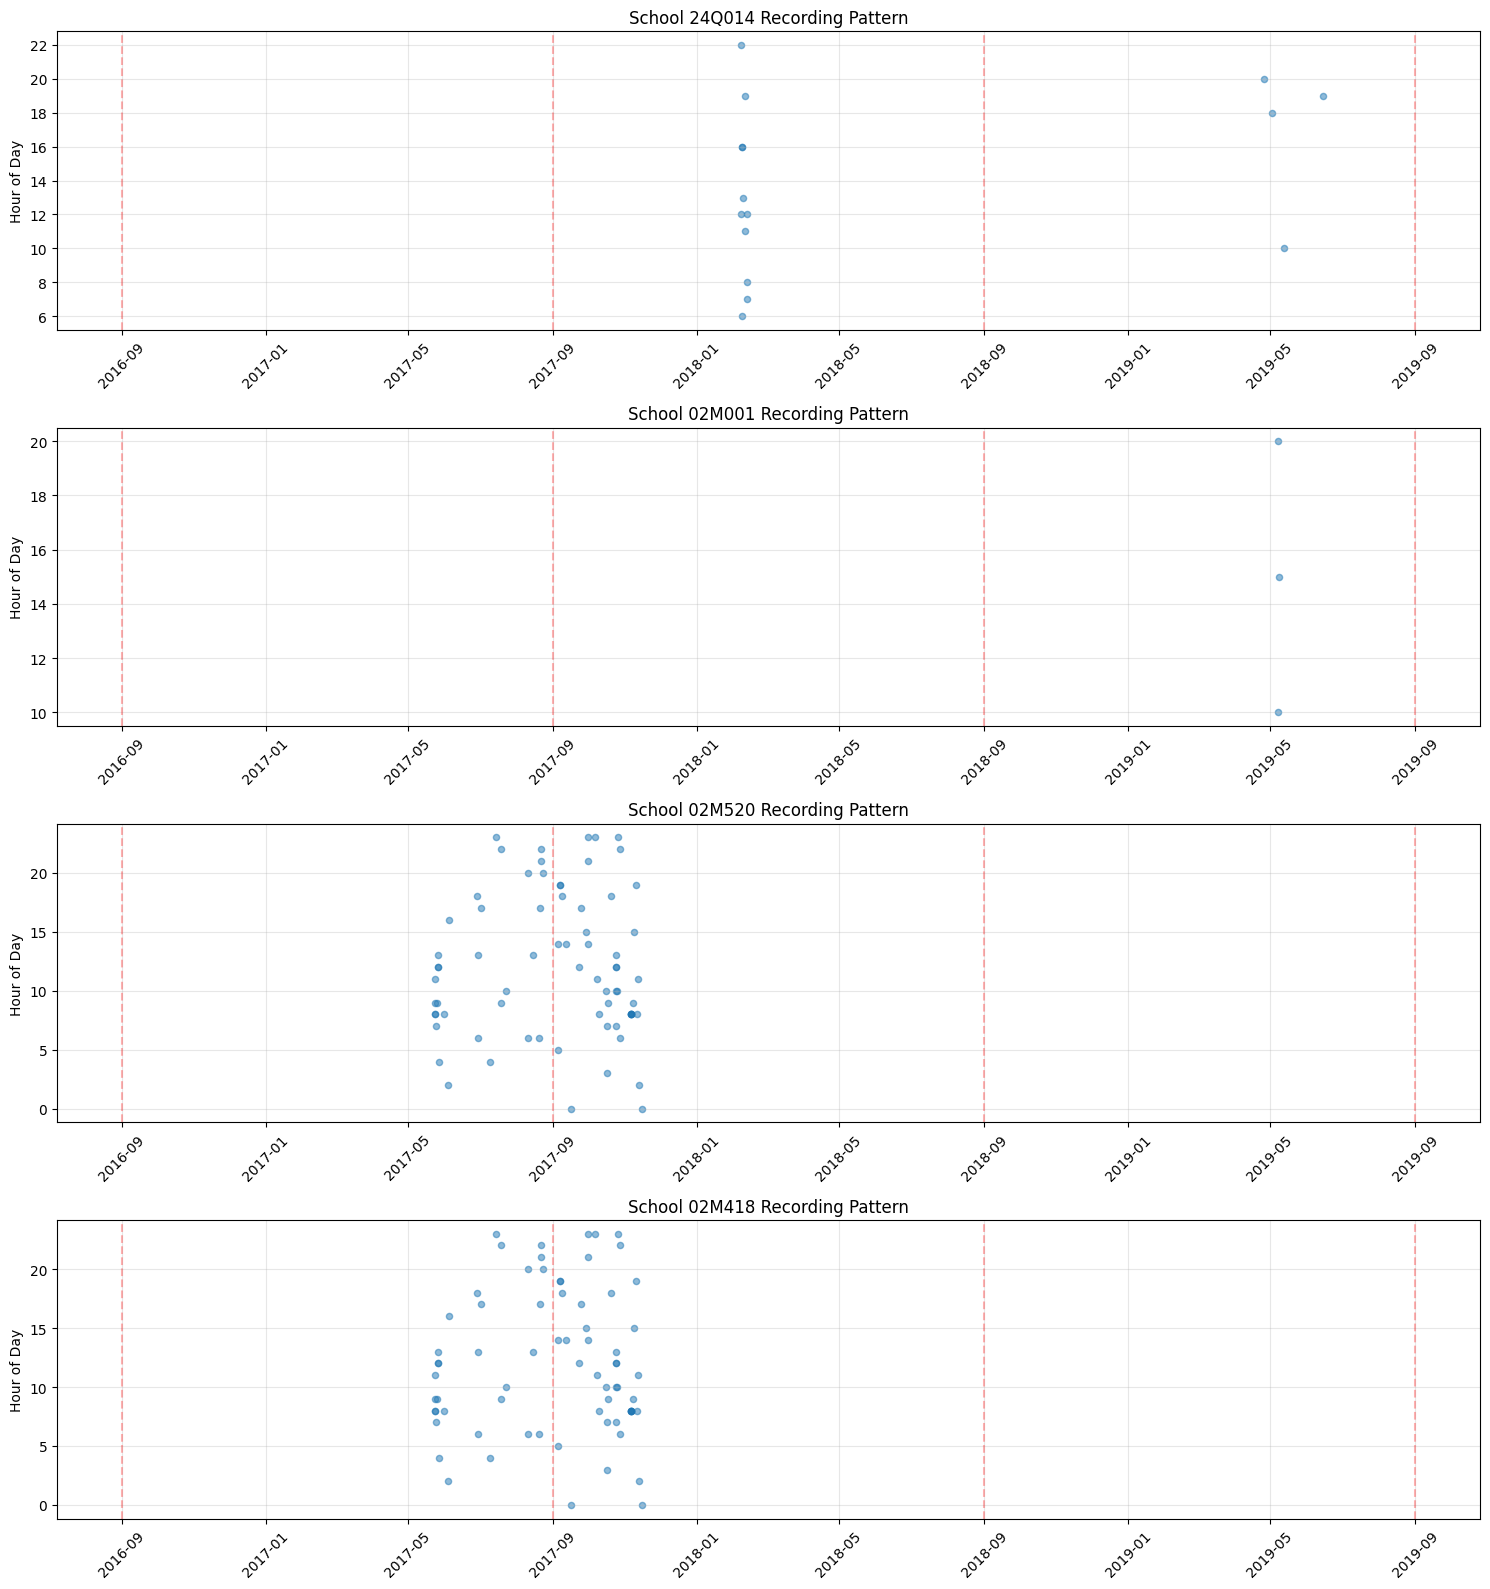


School 24Q014 Summary:
Total recordings: 15

Recordings by academic year:
academic_year
2017-2018    11
2018-2019     4
dtype: int64

Recordings by month (averaged across years):
date
2    5.5
4    0.5
5    1.0
6    0.5
dtype: float64

School 02M001 Summary:
Total recordings: 3

Recordings by academic year:
academic_year
2018-2019    3
dtype: int64

Recordings by month (averaged across years):
date
5    3.0
dtype: float64

School 02M520 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64

School 02M418 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64


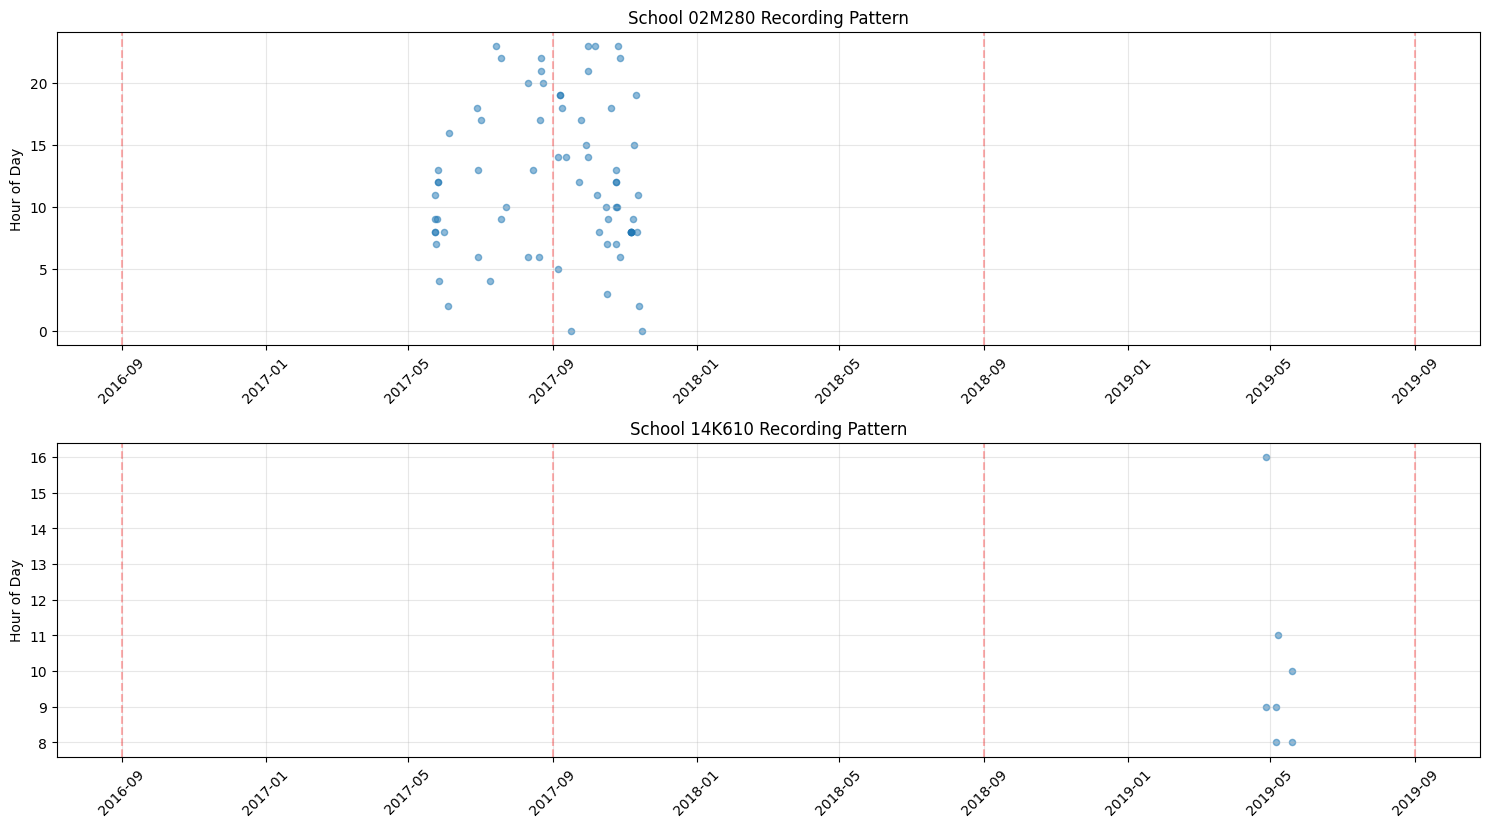


School 02M280 Summary:
Total recordings: 72

Recordings by academic year:
academic_year
2016-2017    30
2017-2018    42
dtype: int64

Recordings by month (averaged across years):
date
5     10.0
6      6.0
7      6.0
8      8.0
9     10.0
10    20.0
11    12.0
dtype: float64

School 14K610 Summary:
Total recordings: 7

Recordings by academic year:
academic_year
2018-2019    7
dtype: int64

Recordings by month (averaged across years):
date
4    2.0
5    5.0
dtype: float64


In [40]:
# Get list of all schools
schools = coverage_matrix['DBN'].unique()

# Create a more detailed recording pattern dataframe for each school
school_patterns = []

# For each school, get recording patterns across time
for dbn in schools:
    # Get sensors that cover this school
    school_sensors = []
    for col in sensor_cols:
        if coverage_matrix.loc[coverage_matrix['DBN'] == dbn, col].iloc[0] == 1:
            sensor_id = int(col.replace('sensor_', ''))
            school_sensors.append(sensor_id)
    
    # Get all recordings from these sensors
    school_data = noise_data[noise_data['sensor_id'].isin(school_sensors)].copy()
    school_data['DBN'] = dbn
    school_patterns.append(school_data)

# Combine all school patterns
school_patterns_df = pd.concat(school_patterns)

# Create subplots for each school
# Let's do 4 schools per figure to keep it manageable
schools_per_figure = 4
num_figures = (len(schools) + schools_per_figure - 1) // schools_per_figure

for fig_num in range(num_figures):
    fig, axes = plt.subplots(schools_per_figure, 1, figsize=(15, 4*schools_per_figure))
    if schools_per_figure == 1:
        axes = [axes]
    
    # Get the schools for this figure
    figure_schools = schools[fig_num*schools_per_figure:(fig_num+1)*schools_per_figure]
    
    for idx, school in enumerate(figure_schools):
        school_data = school_patterns_df[school_patterns_df['DBN'] == school]
        
        # Create scatter plot
        axes[idx].scatter(school_data['date'], 
                         school_data['hour'],
                         alpha=0.5,
                         s=20)
        
        # Add school info to title
        axes[idx].set_title(f'School {school} Recording Pattern')
        axes[idx].set_ylabel('Hour of Day')
        axes[idx].grid(True, alpha=0.3)
        
        # Add academic year divisions
        for year in range(2016, 2020):
            axes[idx].axvline(pd.Timestamp(f"{year}-09-01"), 
                            color='r', 
                            linestyle='--', 
                            alpha=0.3)
        
        # Rotate x-axis labels
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if any
    for idx in range(len(figure_schools), schools_per_figure):
        if idx < len(axes):
            axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for each school in this figure
    for school in figure_schools:
        school_data = school_patterns_df[school_patterns_df['DBN'] == school]
        print(f"\nSchool {school} Summary:")
        print(f"Total recordings: {len(school_data)}")
        print("\nRecordings by academic year:")
        print(school_data.groupby('academic_year').size())
        print("\nRecordings by month (averaged across years):")
        monthly_avg = school_data.groupby(school_data['date'].dt.month).size() / \
                     school_data['date'].dt.year.nunique()
        print(monthly_avg.round(2))

### Removing schools with few recordings

Notably, there are a few schools in our coverage are that have very few recordings. Let's remove schools with fewer than 15 recordings from our analysis.

In [41]:
# Copy school_recordings_df
school_recordings_df_copy = school_recordings_df.copy()

# Filter based on threshold
threshold = 15
school_recordings_df = school_recordings_df[school_recordings_df['num_recordings'] >= threshold]

In [42]:
# Get DBNs from filtered school_recordings_df
filtered_schools = school_recordings_df['DBN']

In [43]:
# Copy coverage_matrix
coverage_matrix_copy = coverage_matrix

In [44]:
# Filter coverage_matrix based on filtered_schools
coverage_matrix = coverage_matrix[coverage_matrix['DBN'].isin(filtered_schools)]